In [1]:
# Importing the necessary packages

import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import seaborn                         as      sns
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Read the data.

In [2]:
dfr = pd.read_csv('Rose.csv',parse_dates=True,index_col='YearMonth')
dfr.head().to_csv('rose_head.csv')
dfr.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [3]:
dfs = pd.read_csv('Sparkling.csv',parse_dates=True,index_col='YearMonth')
dfs.head().to_csv('spark_head.csv')
dfs.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [4]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [5]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


## Check for Missing Values

In [6]:
dfs.isna().sum()

Sparkling    0
dtype: int64

In [7]:
dfr.isna().sum()

Rose    2
dtype: int64

## Fill Missing Values by Interpolation

In [8]:
dfr = dfr.interpolate()

In [9]:
dfr.isna().sum()

Rose    0
dtype: int64

## Plot the Time Series

In [10]:
rcParams['figure.figsize'] = 16,9

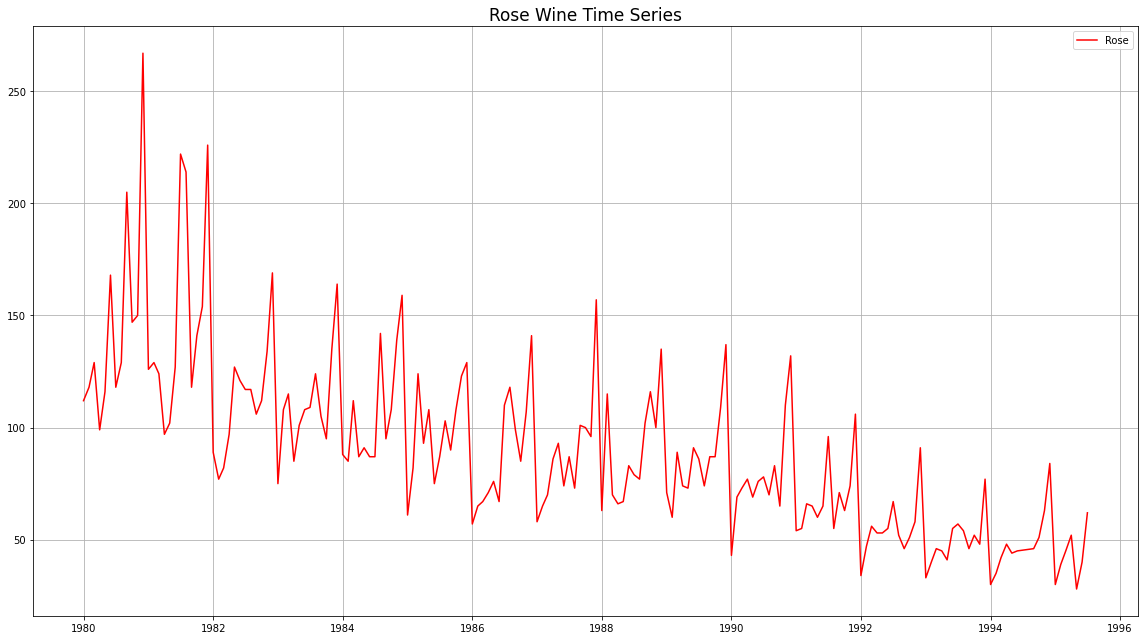

In [11]:
# ROSE TIME SERIES

plt.plot(dfr, color='red');
plt.title('Rose Wine Time Series', fontsize=17);
plt.grid();
plt.legend(['Rose'], loc='best');
plt.tight_layout()
plt.savefig('rose_ts.jpg', bbox_inches='tight');


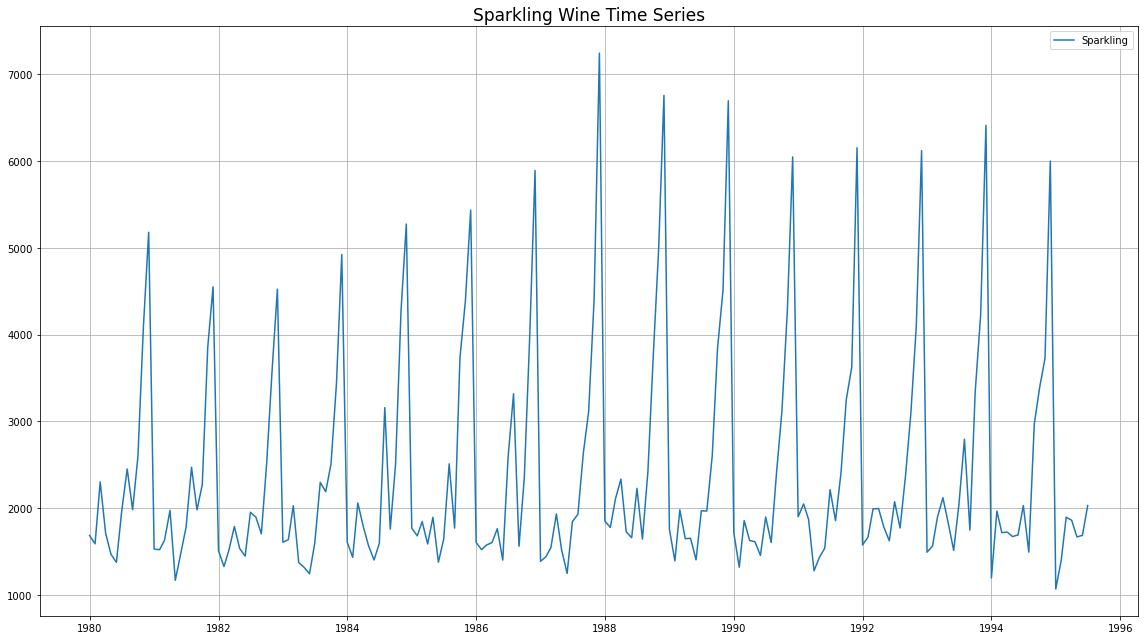

In [12]:
# SPARKLING TIME SERIES

plt.plot(dfs);
plt.title('Sparkling Wine Time Series', fontsize=17);
plt.grid();
plt.legend(['Sparkling']);
plt.tight_layout()
plt.savefig('spark_ts.jpg', bbox_inches='tight');



## Check the basic measures of descriptive statistics of the Time Series

In [13]:

round(dfr.describe().T,3).to_csv('rose_describe.csv')
round(dfr.describe().T,3)

count    mean     std   min   25%   50%    75%    max
Rose  187.0  89.914  39.238  28.0  62.5  85.0  111.0  267.0

In [14]:

round(dfs.describe().T,3).to_csv('spark_describe.csv')
round(dfs.describe().T,3)

count      mean       std     min     25%     50%     75%     max
Sparkling  187.0  2402.417  1295.112  1070.0  1605.0  1874.0  2549.0  7242.0

## Plot Box-plot Monthwise

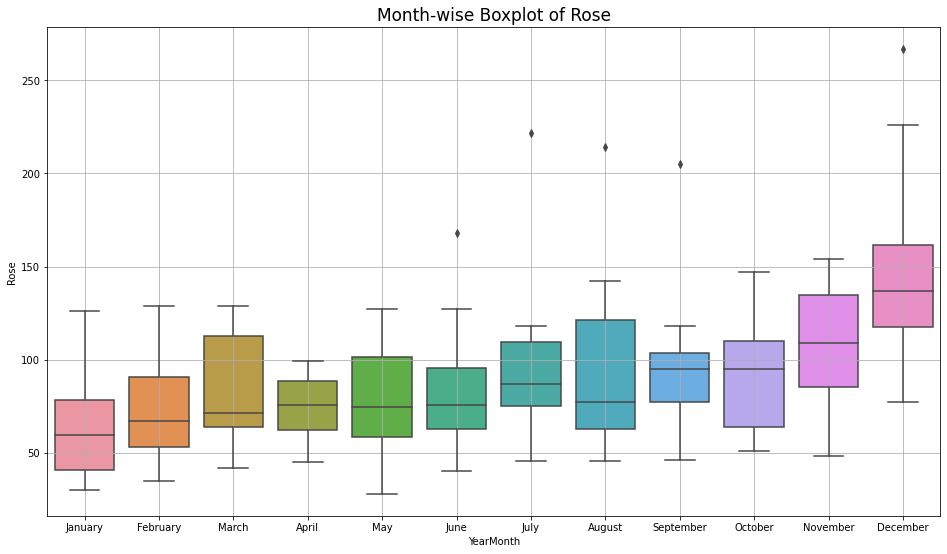

In [15]:
sns.boxplot(x = dfr.index.month_name(), y = dfr['Rose']);
plt.grid();
plt.title('Month-wise Boxplot of Rose', fontsize=17);
plt.savefig('rose_monthwise_box.jpg', bbox_inches='tight');

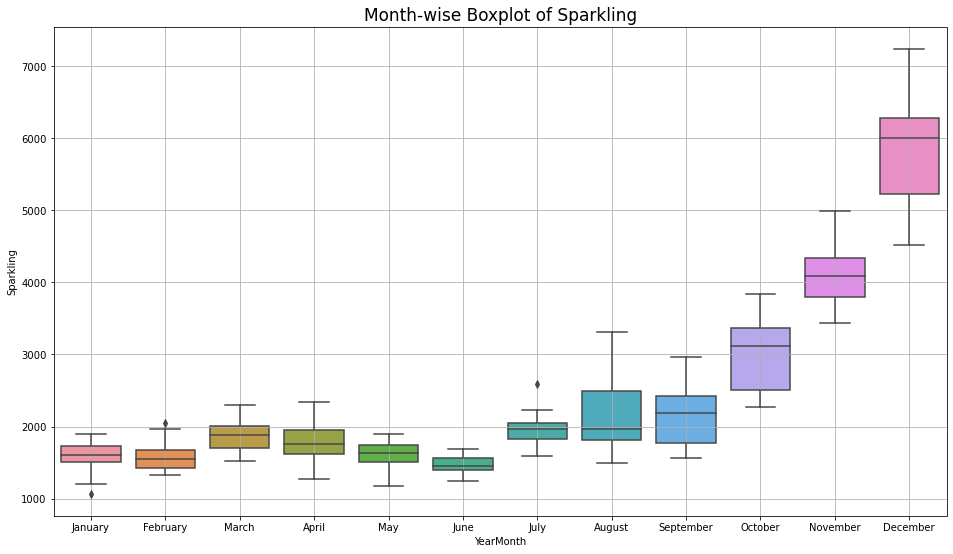

In [16]:
sns.boxplot(x = dfs.index.month_name(), y = dfs['Sparkling']);
plt.grid();
plt.title('Month-wise Boxplot of Sparkling', fontsize=17);
plt.savefig('spark_monthwise_box.jpg', bbox_inches='tight');

## Decompose the Time Series and plot the different components.

In [17]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

### Additive Decomposition of Rose

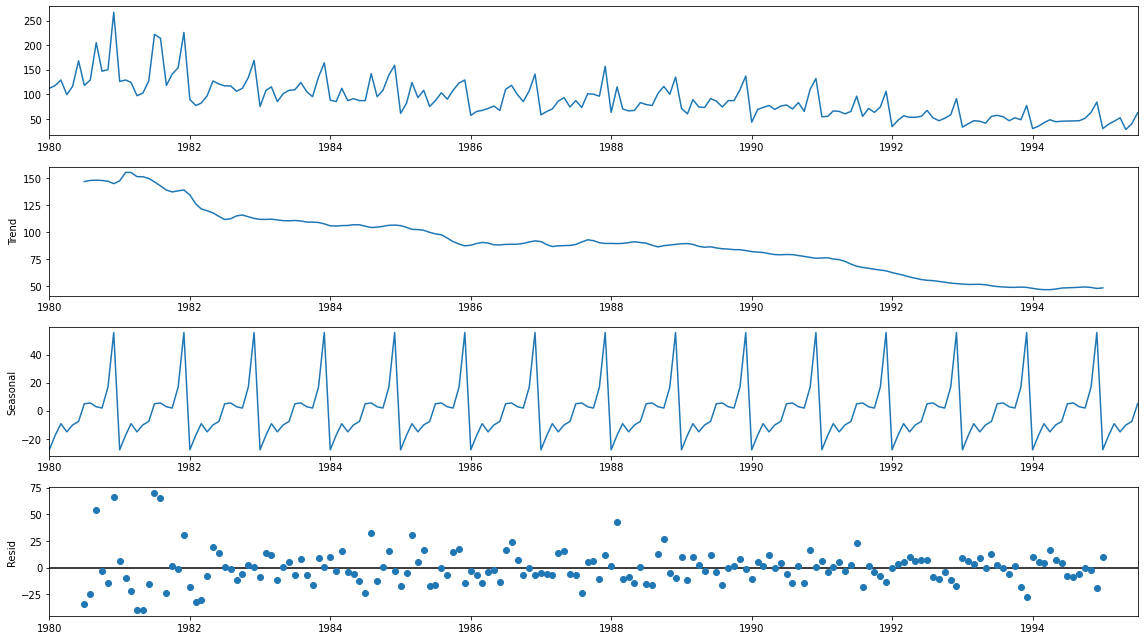

In [18]:
decompositionr = seasonal_decompose(dfr,model='additive')

decompositionr.plot()
plt.savefig('decomposer.jpg', bbox_inches='tight');


In [19]:
trend = decompositionr.trend
seasonality = decompositionr.seasonal
residual = decompositionr.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

trend.head(12).to_csv('rose_trend.csv')
seasonality.head(12).to_csv('rose_season.csv')
residual.head(12).to_csv('rose_resid.csv')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -27.908647
1980-02-01   -17.435632
1980-03-01    -9.285830
1980-04-01   -15.098330
1980-05-01   -10.196544
1980-06-01    -7.678687
1980-07-01     4.896908
1980-08-01     5.499686
1980-09-01     2.774686
1980-10-01     1.871908
1980-11-01    16.846908
1980-12-01    55.713575
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -33.980241
1980-08-01   -24.624686
1980-09-01    53.850314
1980-10-01    -2.955241
1980-11-01   -14.263575
1980-12-01    66.16142

<AxesSubplot:xlabel='YearMonth'>

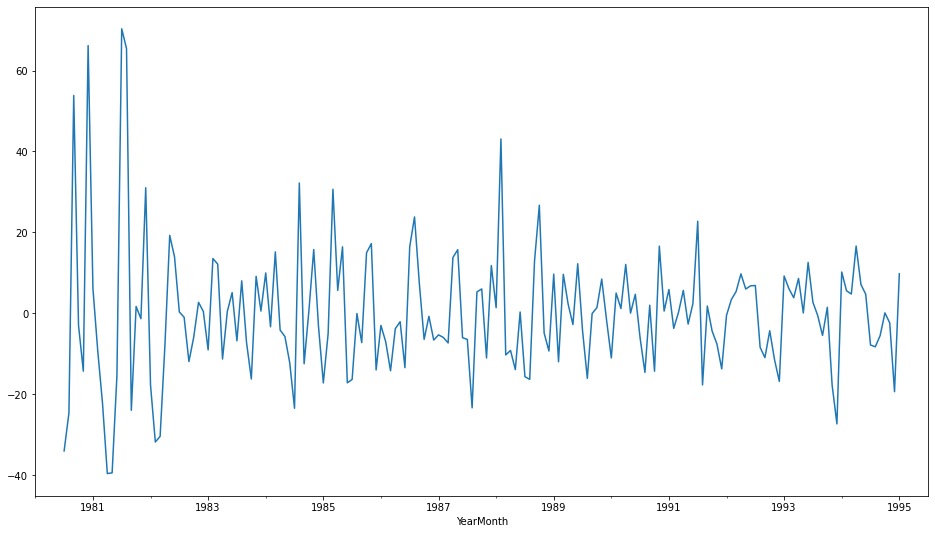

In [20]:
residual.plot()

### Additive Decomposition of Sparkling

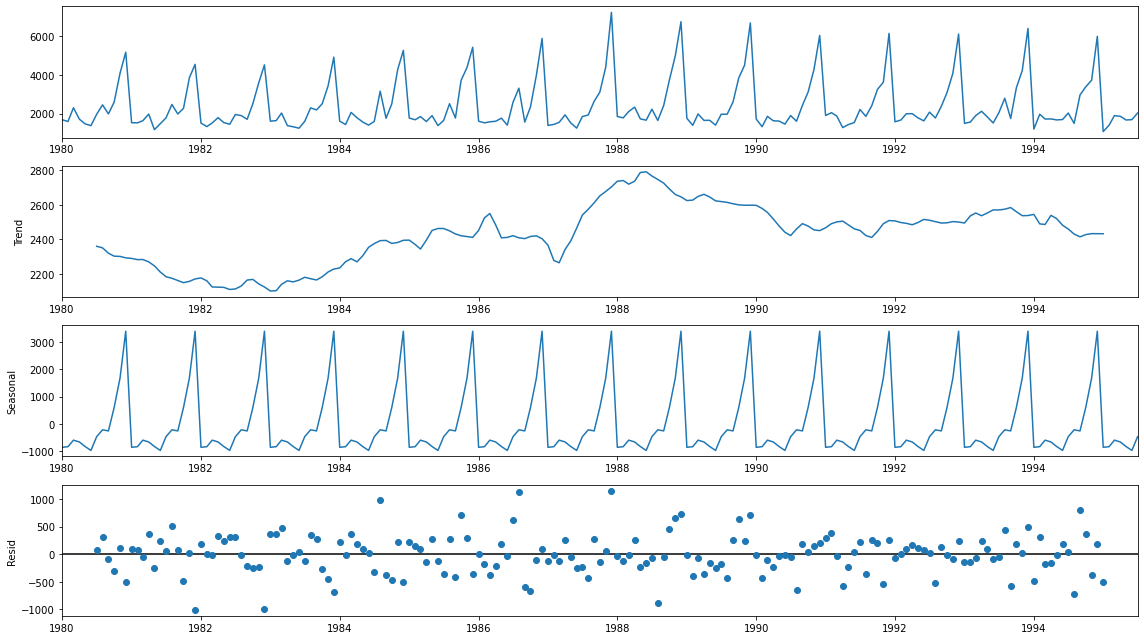

In [21]:
decompositions = seasonal_decompose(dfs,model='additive')
decompositions.plot();
plt.savefig('decomposes.jpg', bbox_inches='tight');



In [22]:
trend = decompositions.trend
seasonality = decompositions.seasonal
residual = decompositions.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

trend.head(12).to_csv('spark_trend.csv')
seasonality.head(12).to_csv('spark_season.csv')
residual.head(12).to_csv('spark_resid.csv')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


In [23]:
cvsa = residual.std()/residual.mean()
cvsa

-296.08335294142995

### Multiplicative Decomposition of Rose

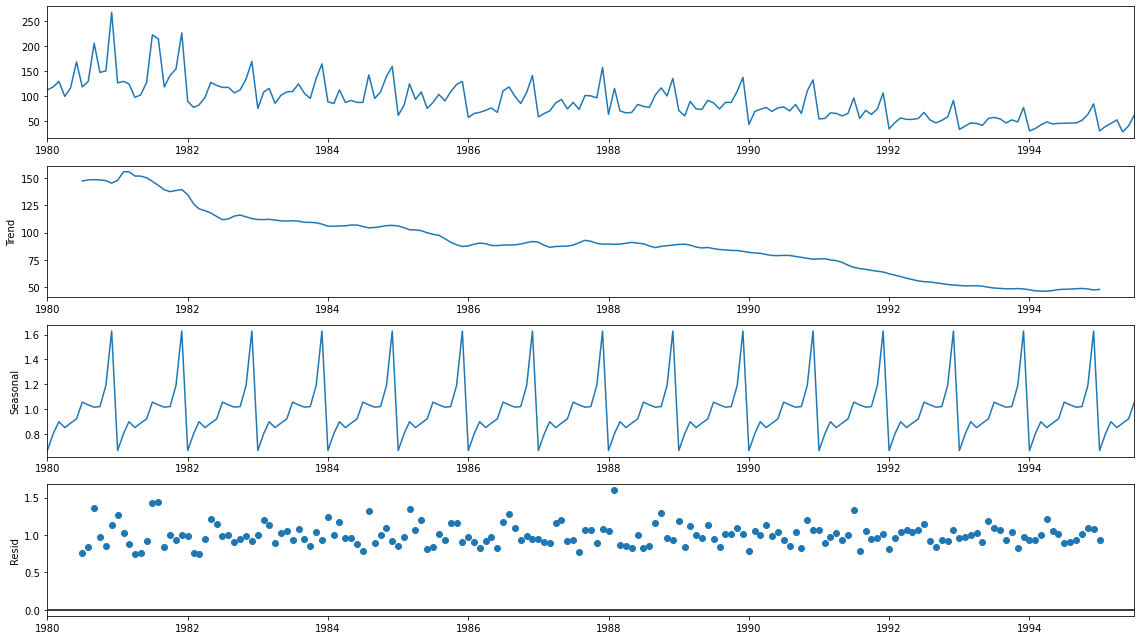

In [24]:
decompositionmr = seasonal_decompose(dfr,model='multiplicative')
decompositionmr.plot();
plt.savefig('decomposemr.jpg', bbox_inches='tight');

In [25]:
trend = decompositionmr.trend
seasonality = decompositionmr.seasonal
residual = decompositionmr.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

trend.head(12).to_csv('rose_trend_m.csv')
seasonality.head(12).to_csv('rose_season_m.csv')
residual.head(12).to_csv('rose_resid_m.csv')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.670111
1980-02-01    0.806163
1980-03-01    0.901164
1980-04-01    0.854024
1980-05-01    0.889415
1980-06-01    0.923985
1980-07-01    1.058038
1980-08-01    1.035881
1980-09-01    1.017648
1980-10-01    1.022573
1980-11-01    1.192349
1980-12-01    1.628646
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.758258
1980-08-01    0.840720
1980-09-01    1.357674
1980-10-01    0.970771
1980-11-01    0.853378
1980-12-01    1.129646
Name: resid, dtype: fl

<AxesSubplot:xlabel='YearMonth'>

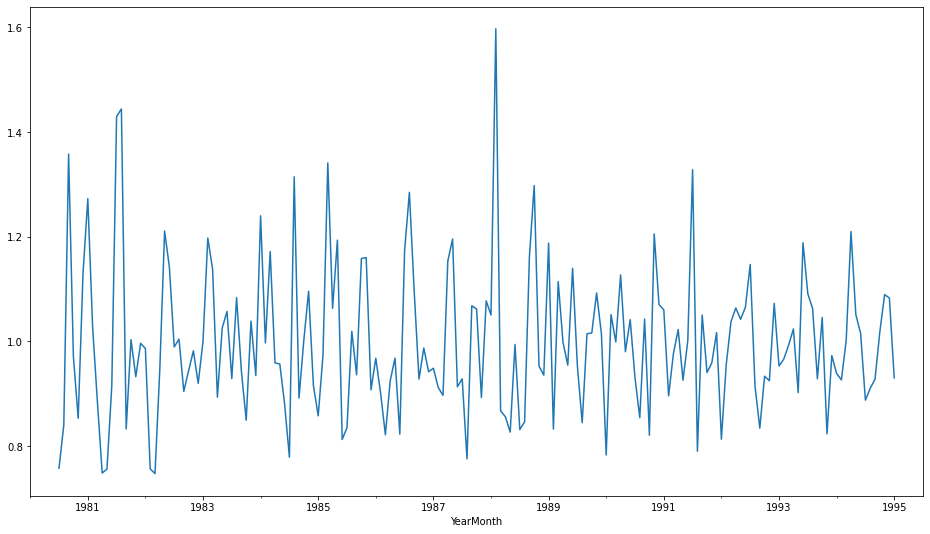

In [26]:
residual.plot()

For the multiplicative series, we see that a lot of residuals are located around 1.

### Multiplicative Decomposition of Sparkling

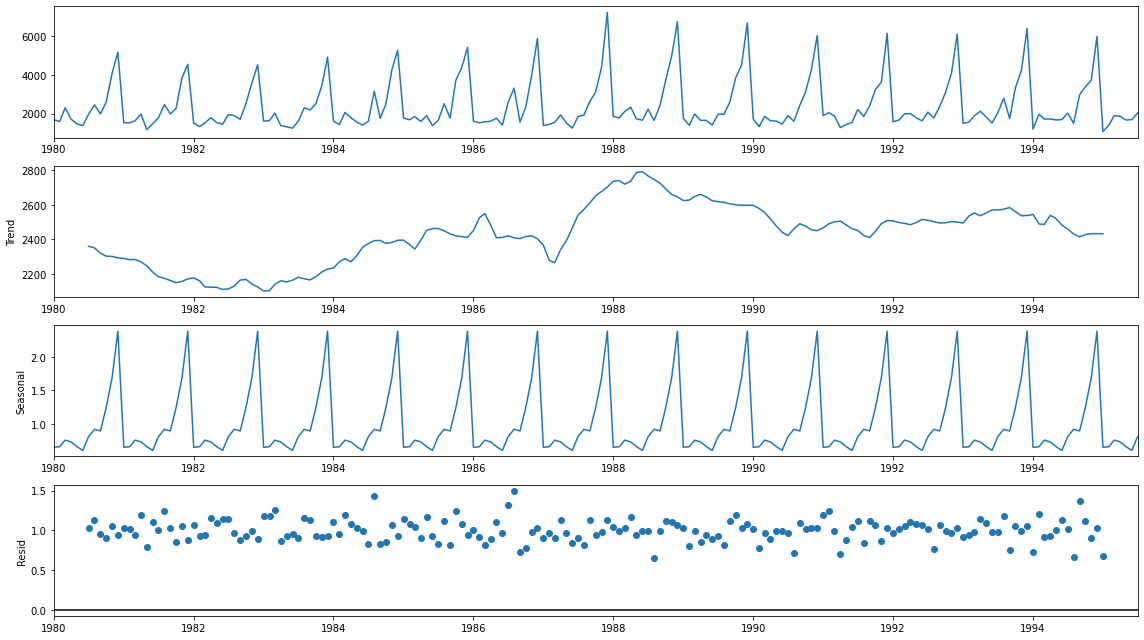

In [27]:
decompositionms = seasonal_decompose(dfs,model='multiplicative')
decompositionms.plot();
plt.savefig('decomposems.jpg', bbox_inches='tight');

In [28]:
trend = decompositionms.trend
seasonality = decompositionms.seasonal
residual = decompositionms.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

trend.head(12).to_csv('spark_trend_m.csv')
seasonality.head(12).to_csv('spark_season_m.csv')
residual.head(12).to_csv('spark_resid_m.csv')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

In [29]:
cvsm = residual.std()/residual.mean()
cvsm

0.13886244212828963

## Split the data into train and test and plot the training and test data. [Test Data should start from 1991]

In [30]:
# ROSE DATA SPLIT

rtrain = dfr[dfr.index<'1991'] 
rtest = dfr[dfr.index>='1991']

In [31]:
# SPARKLING DATA SPLIT

strain = dfs[dfs.index<'1991'] 
stest = dfs[dfs.index>='1991']

In [32]:
print(rtrain.shape)
print(rtest.shape)

(132, 1)
(55, 1)


In [33]:
print(strain.shape)
print(stest.shape)

(132, 1)
(55, 1)


In [34]:
from IPython.display import display

In [35]:
# ROSE DATA TRAIN AND TEST

print('First few rows of Rose Training Data')
display(rtrain.head())
print('Last few rows of Rose Training Data')
display(rtrain.tail())
print('First few rows of Rose Test Data')
display(rtest.head())
print('Last few rows of Rose Test Data')
display(rtest.tail())

rtrain.to_csv('rose_train.csv')
rtest.to_csv('rose_test.csv')

First few rows of Rose Training Data


Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

Last few rows of Rose Training Data


Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

First few rows of Rose Test Data


Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0

Last few rows of Rose Test Data


Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

In [36]:
# SPARKLING DATA TRAIN AND TEST

print('First few rows of Sparkling Training Data')
display(strain.head())
print('Last few rows of Sparkling Training Data')
display(strain.tail())
print('First few rows of Sparkling Test Data')
display(stest.head())
print('Last few rows of Sparkling Test Data')
display(stest.tail())

strain.to_csv('spark_train.csv')
stest.to_csv('spark_test.csv')

First few rows of Sparkling Training Data


Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

Last few rows of Sparkling Training Data


Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

First few rows of Sparkling Test Data


Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

Last few rows of Sparkling Test Data


Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

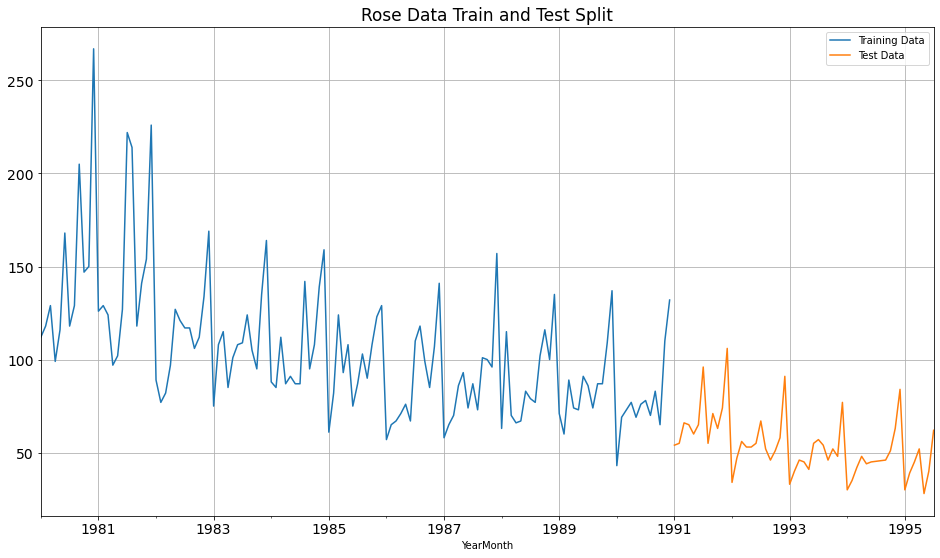

In [37]:
# ROSE DATA TRAIN TEST SPLIT TIME SERIES

rtrain['Rose'].plot(fontsize=14)
rtest['Rose'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title('Rose Data Train and Test Split', fontsize=17)
plt.savefig('rose_split_ts.jpg', bbox_inches='tight')
plt.show();

<AxesSubplot:xlabel='YearMonth'>

<AxesSubplot:xlabel='YearMonth'>

Text(0.5, 1.0, 'Sparkling Data Train and Test Split')

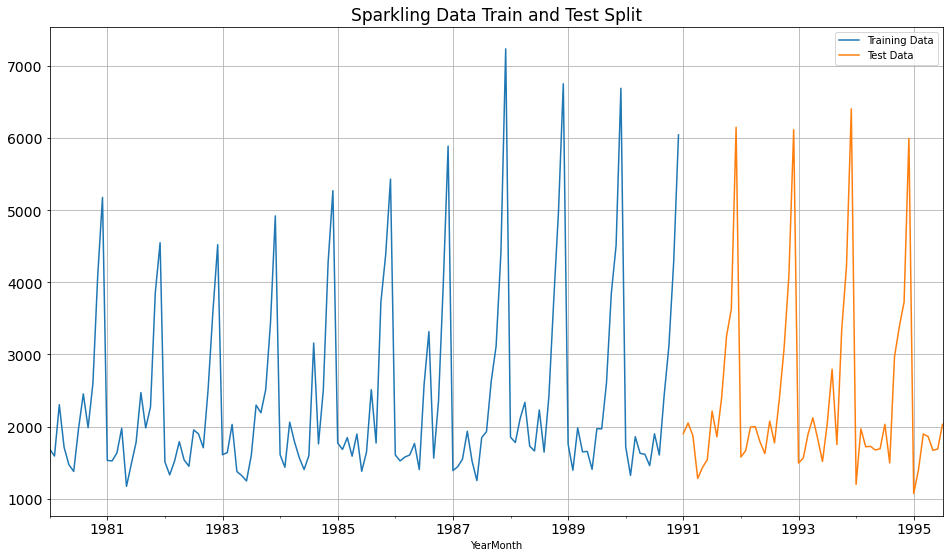

In [38]:
# SPARKLING DATA TRAIN TEST SPLIT TIME SERIES

strain['Sparkling'].plot(fontsize=14)
stest['Sparkling'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title('Sparkling Data Train and Test Split', fontsize=17)
plt.savefig('spark_split_ts.jpg', bbox_inches='tight')
plt.show()

# Building different models and comparing the accuracy metrics.

## Model 1: Linear Regression on Rose

#### For this particular linear regression, we are going to regress the 'Rose' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [39]:
rtrain.shape
rtest.shape

(132, 1)

(55, 1)

In [40]:
train_time = [i+1 for i in range(len(rtrain))]
test_time = [i+133 for i in range(len(rtest))]
print('Training Time Instance :','\n',train_time)
print('Test Time Instance :','\n',test_time)

Training Time Instance : 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time Instance : 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [41]:
LinearRegression_train = rtrain.copy()
LinearRegression_test = rtest.copy()

In [42]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5

Last few rows of Training Data


Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132

First few rows of Test Data


Rose  time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137

Last few rows of Test Data


Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187

Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lr = LinearRegression()

In [45]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])

LinearRegression()

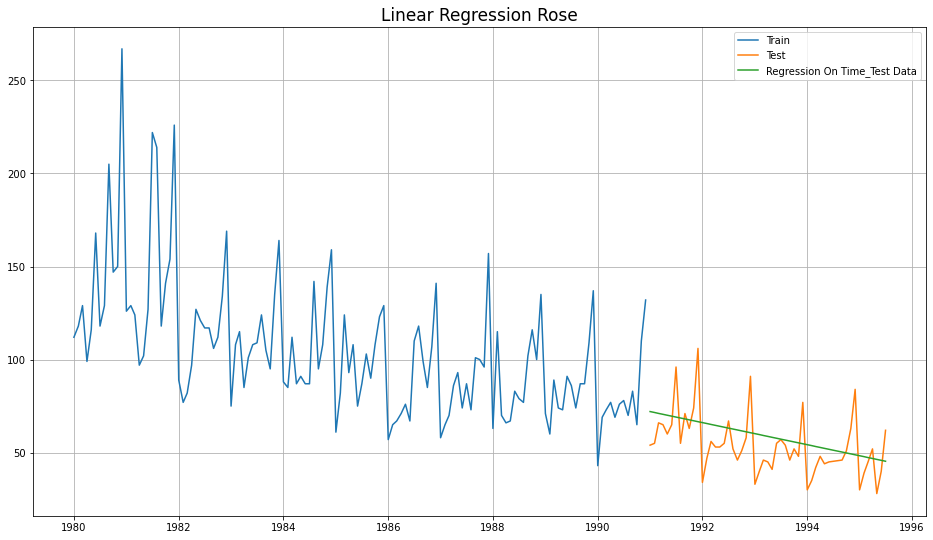

In [46]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot(rtrain['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.title('Linear Regression Rose', fontsize=17)
plt.legend(loc='best')
plt.grid();
plt.savefig('lr_rose.jpg', bbox_inches='tight');

#### Defining the functions for calculating the accuracy metrics.

In [47]:
from sklearn import metrics

### Model Evaluation

In [48]:
rmse_model11_test = metrics.mean_squared_error(rtest['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model11_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.269 


In [49]:
resultsDf = pd.DataFrame({'Test RMSE Rose': [rmse_model11_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE Rose
RegressionOnTime       15.268955

## Model 1: Linear Regression Sparkling

In [50]:
train_time = [i+1 for i in range(len(strain))]
test_time = [i+133 for i in range(len(stest))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [51]:
LinearRegression_train = strain.copy()
LinearRegression_test = stest.copy()

In [52]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5

Last few rows of Training Data


Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132

First few rows of Test Data


Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137

Last few rows of Test Data


Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187

Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lr = LinearRegression()

In [55]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])

LinearRegression()

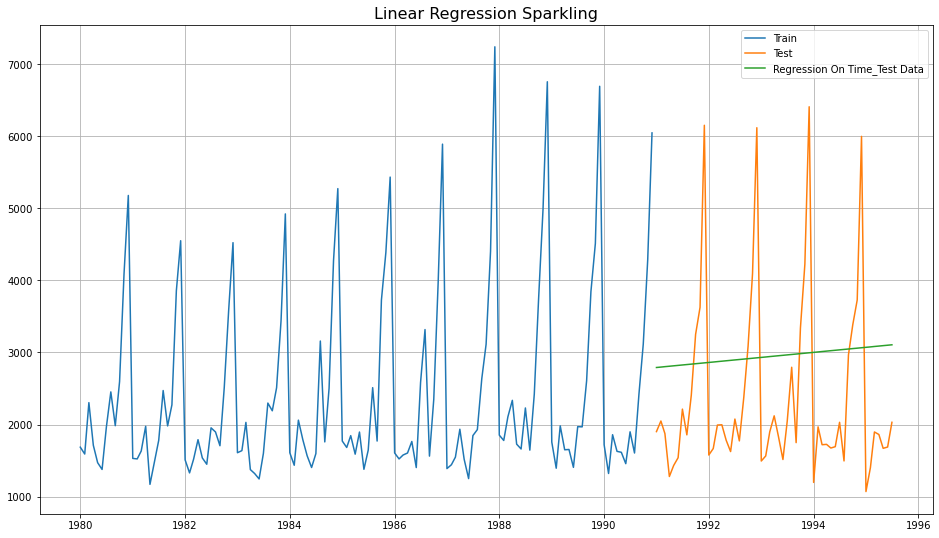

In [56]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot(strain['Sparkling'], label='Train')
plt.plot(stest['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.title('Linear Regression Sparkling', fontsize=16)
plt.grid();
plt.savefig('spark_lr.jpg', bbox_inches='tight');

#### Defining the functions for calculating the accuracy metrics.

In [57]:
from sklearn import metrics

### Model Evaluation

In [58]:
rmse_model12_test = metrics.mean_squared_error(stest['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model12_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135 


In [59]:
resultsDf_12 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model12_test]},index=['RegressionOnTime'])

resultsDf = pd.merge(resultsDf, resultsDf_12, left_index=True, right_index=True)
resultsDf.to_csv('results_lr.csv')
resultsDf


Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime       15.268955          1389.135175

## Model 2: Naive Approach Rose : $\hat{y}_{t+1} = y_t$

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [60]:
NaiveModel_train = rtrain.copy()
NaiveModel_test = rtest.copy()

In [61]:
rtrain.tail()

Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

In [62]:
NaiveModel_test['naive'] = np.asarray(rtrain['Rose'])[len(np.asarray(rtrain['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

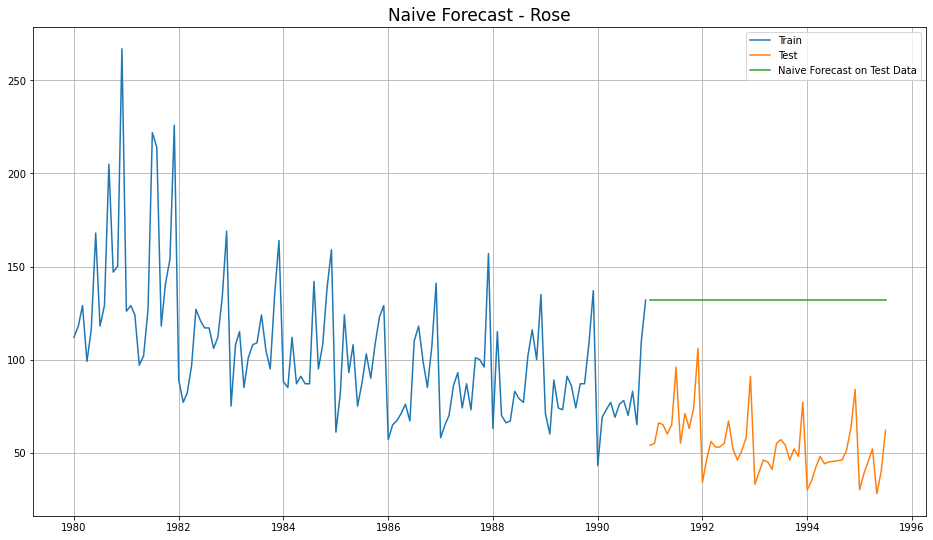

In [63]:
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast - Rose", fontsize=17)
plt.grid();
plt.savefig('rose_naive.jpg', bbox_inches='tight');

### Model Evaluation

In [64]:
rmse_model21_test = metrics.mean_squared_error(rtest['Rose'],NaiveModel_test['naive'],squared=False)
print("For NaiveModel forecast on the Test Data,  RMSE is %3.3f" %(rmse_model21_test))

For NaiveModel forecast on the Test Data,  RMSE is 79.719


In [65]:
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime       15.268955          1389.135175

In [66]:
resultsDf_21 = pd.DataFrame({'Test RMSE Rose': [rmse_model21_test]},index=['NaiveModel'])

# resultsDf = pd.concat([resultsDf, resultsDf_3], ignore_index=True)
# resultsDf

# resultsDf_3 = pd.DataFrame({'Test RMSE Rose': [rmse_model2_test]},index=['NaiveModel'])

# resultsDf.join(resultsDf_3, how='inner')

# resultsDf = pd.merge(resultsDf, resultsDf_21, left_index=True, right_index=True)
# resultsDf



## Model 2: Naive Approach Sparkling : $\hat{y}_{t+1} = y_t$

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [67]:
NaiveModel_train = strain.copy()
NaiveModel_test = stest.copy()

In [68]:
strain.tail()

Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

In [69]:
NaiveModel_test['naive'] = np.asarray(strain['Sparkling'])[len(np.asarray(strain['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

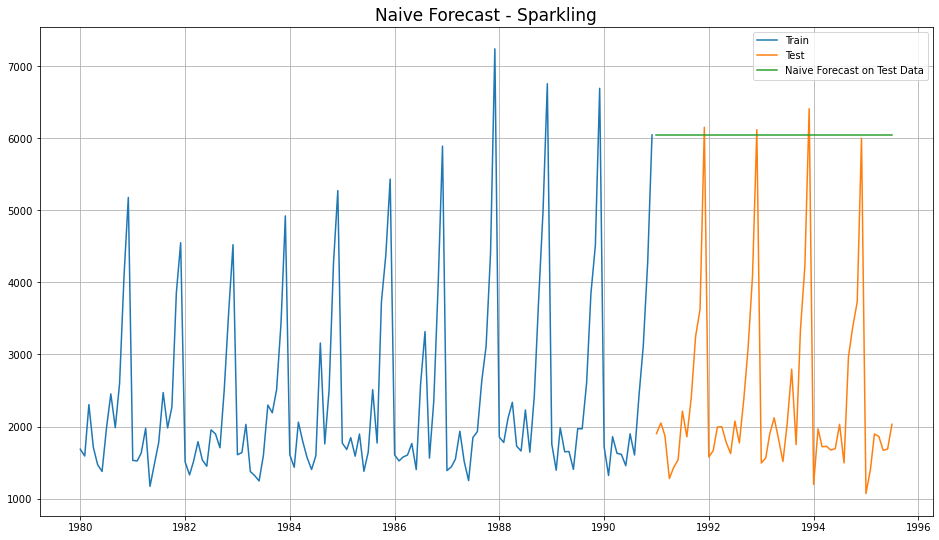

In [70]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(stest['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast - Sparkling", fontsize=17)
plt.grid();
plt.savefig('Sparkling_naive.jpg', bbox_inches='tight');

### Model Evaluation

In [71]:
rmse_model22_test = metrics.mean_squared_error(stest['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For NaiveModel forecast on the Test Data,  RMSE is %3.3f" %(rmse_model22_test))

For NaiveModel forecast on the Test Data,  RMSE is 3864.279


In [72]:
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime       15.268955          1389.135175

In [73]:
resultsDf_21

Test RMSE Rose
NaiveModel       79.718773

In [74]:
resultsDf_22 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model22_test]},index=['NaiveModel'])

# resultsDf = pd.concat([resultsDf, resultsDf_3], ignore_index=True)
# resultsDf

# resultsDf_3 = pd.DataFrame({'Test RMSE Rose': [rmse_model2_test]},index=['NaiveModel'])

# resultsDf.join(resultsDf_3, how='inner')

resultsDf1 = resultsDf_21.join(resultsDf_22, how='outer')
resultsDf1



Test RMSE Rose  Test RMSE Sparkling
NaiveModel       79.718773          3864.279352

In [75]:
resultsDf3 = pd.concat([resultsDf, resultsDf1], axis=0)
resultsDf3

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime       15.268955          1389.135175
NaiveModel             79.718773          3864.279352

In [76]:
resultsDf = resultsDf3.copy()
resultsDf.to_csv('results_nb.csv')
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime       15.268955          1389.135175
NaiveModel             79.718773          3864.279352

## Model 3: Simple Average Rose

#### For this particular simple average method, we will forecast by using the average of the training values.

In [77]:
SimpleAverage_train = rtrain.copy()
SimpleAverage_test = rtest.copy()

In [78]:
SimpleAverage_test['mean_forecast'] = rtrain['Rose'].mean()
SimpleAverage_test.head()

Rose  mean_forecast
YearMonth                      
1991-01-01  54.0     104.939394
1991-02-01  55.0     104.939394
1991-03-01  66.0     104.939394
1991-04-01  65.0     104.939394
1991-05-01  60.0     104.939394

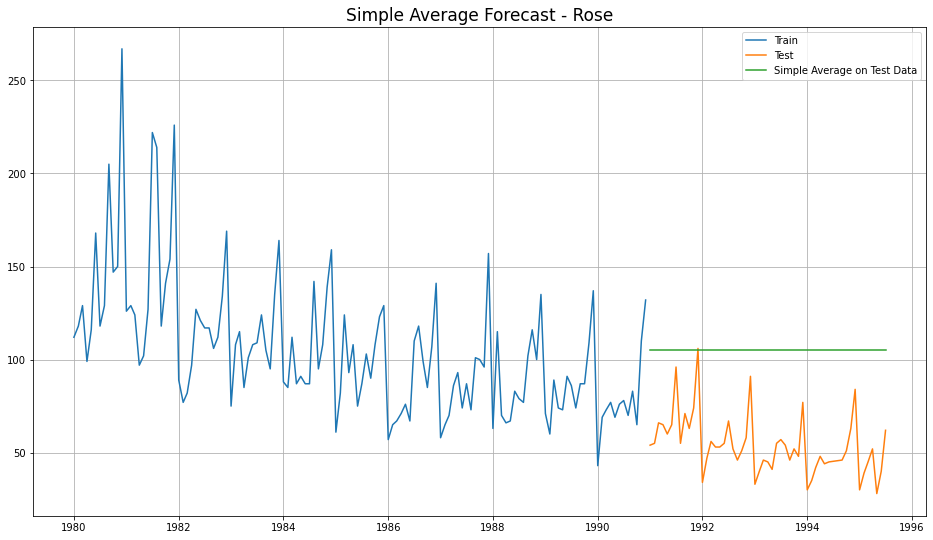

In [79]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast - Rose", fontsize=17)
plt.grid();
plt.savefig('rose_simpleaverage.jpg', bbox_inches='tight');

### Model Evaluation

In [80]:
rmse_model31_test = metrics.mean_squared_error(rtest['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on Rose Test Data,  RMSE is %3.3f" %(rmse_model31_test))

For Simple Average forecast on Rose Test Data,  RMSE is 53.461


In [81]:
resultsDf_31 = pd.DataFrame({'Test RMSE Rose': [rmse_model31_test]}
                           ,index=['SimpleAverageModel'])
resultsDf_31
# resultsDf = pd.concat([resultsDf, resultsDf_3])
# resultsDf

Test RMSE Rose
SimpleAverageModel        53.46057

## Model 3: Simple Average Sparkling

#### For this particular simple average method, we will forecast by using the average of the training values.

In [82]:
SimpleAverage_train = strain.copy()
SimpleAverage_test = stest.copy()

In [83]:
SimpleAverage_test['mean_forecast'] = strain['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
YearMonth                           
1991-01-01       1902    2403.780303
1991-02-01       2049    2403.780303
1991-03-01       1874    2403.780303
1991-04-01       1279    2403.780303
1991-05-01       1432    2403.780303

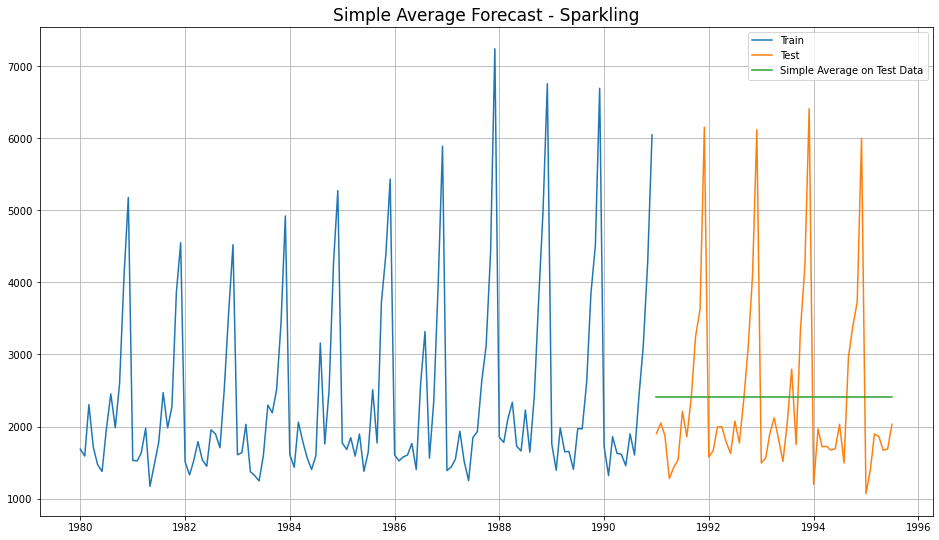

In [84]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast - Sparkling", fontsize=17)
plt.grid();
plt.savefig('Sparkling_simpleaverage.jpg', bbox_inches='tight');

### Model Evaluation

In [85]:
rmse_model32_test = metrics.mean_squared_error(stest['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on Sparkling Test Data,  RMSE is %3.3f" %(rmse_model32_test))

For Simple Average forecast on Sparkling Test Data,  RMSE is 1275.082


In [86]:
resultsDf_32 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model32_test]}
                           ,index=['SimpleAverageModel'])
resultsDf_32
# resultsDf = pd.concat([resultsDf, resultsDf_3])
# resultsDf

Test RMSE Sparkling
SimpleAverageModel          1275.081804

In [87]:
resultsDf4 = resultsDf_31.join(resultsDf_32, how='outer')
resultsDf4

Test RMSE Rose  Test RMSE Sparkling
SimpleAverageModel        53.46057          1275.081804

In [88]:
resultsDf5 = pd.concat([resultsDf, resultsDf4], axis=0)
resultsDf5

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime         15.268955          1389.135175
NaiveModel               79.718773          3864.279352
SimpleAverageModel       53.460570          1275.081804

In [89]:
resultsDf = resultsDf5.copy()
resultsDf.to_csv('results_sa.csv')
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime         15.268955          1389.135175
NaiveModel               79.718773          3864.279352
SimpleAverageModel       53.460570          1275.081804

## Model 4: Moving Average(MA) - Rose

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

In [90]:
MovingAverage = dfr.copy()
MovingAverage.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

#### Trailing moving averages

In [91]:

MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0       114.5         NaN         NaN
1980-05-01  116.0       107.5       115.5         NaN         NaN

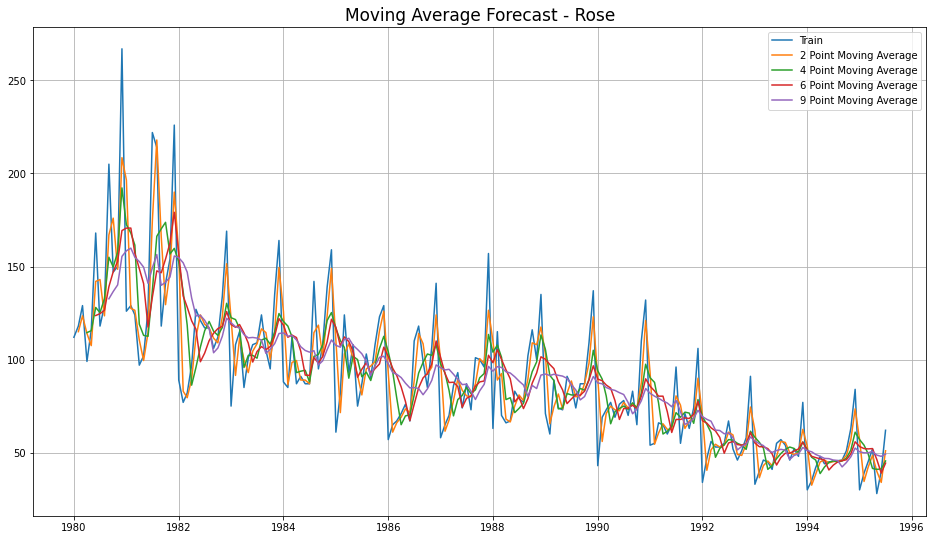

In [92]:
## Plotting on the whole data

plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average Forecast - Rose', fontsize=17)
plt.savefig('rose_ma.jpg', bbox_inches='tight');

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [93]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

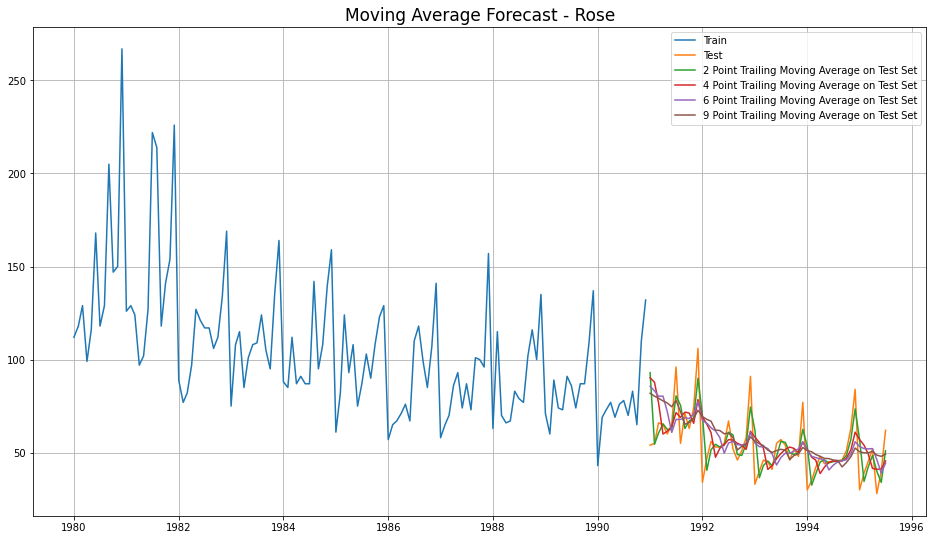

In [94]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average Forecast - Rose', fontsize=17);
plt.savefig('rose_ma_test.jpg', bbox_inches='tight');

### Model Evaluation

##### Done only on the test data.

In [95]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(rtest['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on Rose Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on Rose Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on Rose Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on Rose Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on Rose Training Data,  RMSE is 14.728


In [96]:
resultsDf_41 = pd.DataFrame({'Test RMSE Rose': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf_41.to_csv('rose_ma.csv')
resultsDf_41

Test RMSE Rose
2pointTrailingMovingAverage       11.529278
4pointTrailingMovingAverage       14.451403
6pointTrailingMovingAverage       14.566327
9pointTrailingMovingAverage       14.727630

## Method 4: Moving Average(MA) - Sparkling

In [97]:
MovingAverage = dfs.copy()
MovingAverage.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

#### Trailing moving averages

In [98]:

MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                            
1980-01-01       1686         NaN         NaN         NaN         NaN
1980-02-01       1591      1638.5         NaN         NaN         NaN
1980-03-01       2304      1947.5         NaN         NaN         NaN
1980-04-01       1712      2008.0     1823.25         NaN         NaN
1980-05-01       1471      1591.5     1769.50         NaN         NaN

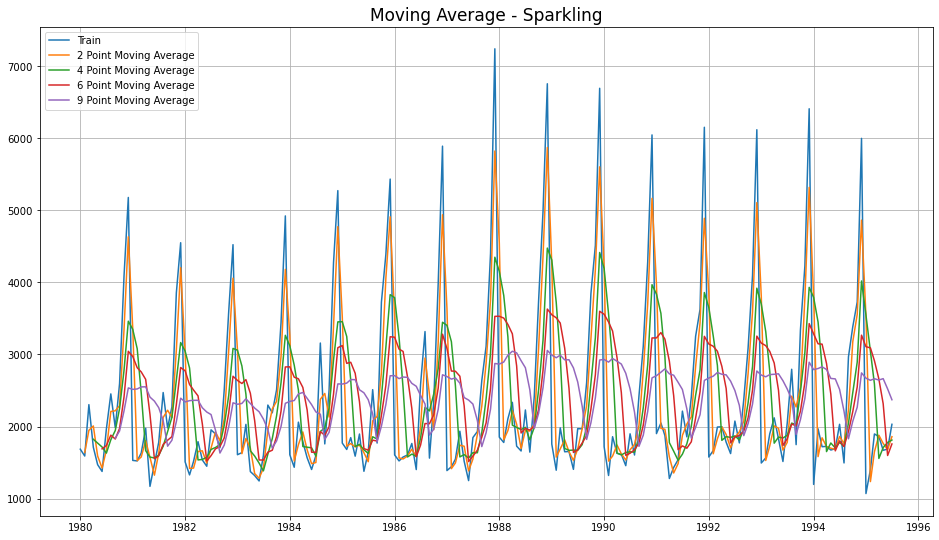

In [99]:
## Plotting on the whole data

plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average - Sparkling', fontsize=17)
plt.savefig('spark_ma.jpg', bbox_inches='tight');

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [100]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

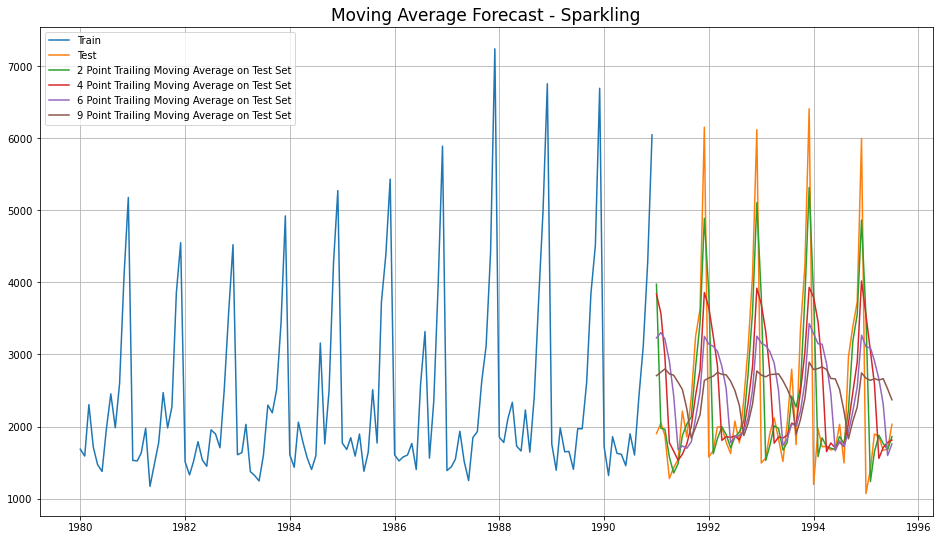

In [101]:
## Plotting on Test data

plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average Forecast - Sparkling', fontsize=17)
plt.savefig('spark_ma_test.jpg', bbox_inches='tight');

### Model Evaluation

##### Done only on the test data.

In [102]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(stest['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on Sparkling Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on Sparkling Training Data,  RMSE is 1346.278


In [103]:
resultsDf_42 = pd.DataFrame({'Test RMSE Sparkling': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf_42.to_csv('spark_ma.csv')
resultsDf_42

Test RMSE Sparkling
2pointTrailingMovingAverage           813.400684
4pointTrailingMovingAverage          1156.589694
6pointTrailingMovingAverage          1283.927428
9pointTrailingMovingAverage          1346.278315

In [104]:
resultsDf6 = resultsDf_41.join(resultsDf_42, how='outer')
resultsDf6

Test RMSE Rose  Test RMSE Sparkling
2pointTrailingMovingAverage       11.529278           813.400684
4pointTrailingMovingAverage       14.451403          1156.589694
6pointTrailingMovingAverage       14.566327          1283.927428
9pointTrailingMovingAverage       14.727630          1346.278315

In [105]:
resultsDf7 = pd.concat([resultsDf, resultsDf6], axis=0)
resultsDf7

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                  15.268955          1389.135175
NaiveModel                        79.718773          3864.279352
SimpleAverageModel                53.460570          1275.081804
2pointTrailingMovingAverage       11.529278           813.400684
4pointTrailingMovingAverage       14.451403          1156.589694
6pointTrailingMovingAverage       14.566327          1283.927428
9pointTrailingMovingAverage       14.727630          1346.278315

In [106]:
resultsDf = resultsDf7.copy()
resultsDf.to_csv('results_ma.csv')
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                  15.268955          1389.135175
NaiveModel                        79.718773          3864.279352
SimpleAverageModel                53.460570          1275.081804
2pointTrailingMovingAverage       11.529278           813.400684
4pointTrailingMovingAverage       14.451403          1156.589694
6pointTrailingMovingAverage       14.566327          1283.927428
9pointTrailingMovingAverage       14.727630          1346.278315

## Consolidated plots of All Models- Rose

In [107]:
# LR on Rose
train_time = [i+1 for i in range(len(rtrain))]
test_time = [i+133 for i in range(len(rtest))]
LinearRegression_train = rtrain.copy()
LinearRegression_test = rtest.copy()
LinearRegression_test['time'] = test_time
LinearRegression_train['time'] = train_time
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

# NB on Rose
NaiveModel_train = rtrain.copy()
NaiveModel_test = rtest.copy()
NaiveModel_test['naive'] = np.asarray(rtrain['Rose'])[len(np.asarray(rtrain['Rose']))-1]

# SA on Rose
SimpleAverage_train = rtrain.copy()
SimpleAverage_test = rtest.copy()
SimpleAverage_test['mean_forecast'] = rtrain['Rose'].mean()

# MA on Rose

MovingAverage = dfr.copy()
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
trailing_MovingAverage_test = MovingAverage[MovingAverage.index>='1991']


LinearRegression()

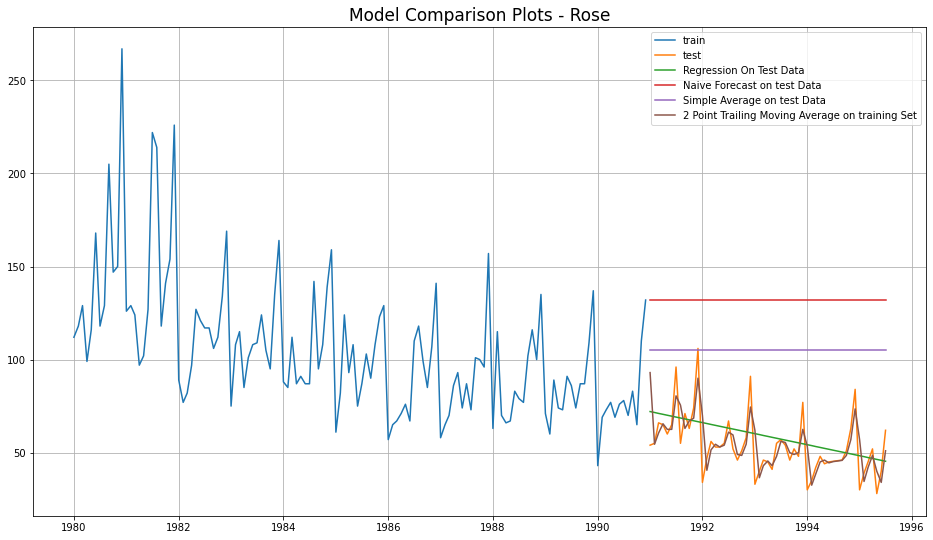

In [108]:
## Plotting on both rtraining and rtest data

plt.plot(rtrain['Rose'], label='train')
plt.plot(rtest['Rose'], label='test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots - Rose", fontsize=17)
plt.grid();

## Consolidated plots of All Models- Sparkling

In [109]:
# LR on Sparkling
train_time = [i+1 for i in range(len(strain))]
test_time = [i+133 for i in range(len(stest))]
LinearRegression_train = strain.copy()
LinearRegression_test = stest.copy()
LinearRegression_test['time'] = test_time
LinearRegression_train['time'] = train_time
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

# NB on Sparkling
NaiveModel_train = strain.copy()
NaiveModel_test = stest.copy()
NaiveModel_test['naive'] = np.asarray(strain['Sparkling'])[len(np.asarray(strain['Sparkling']))-1]

# SA on Sparkling
SimpleAverage_train = strain.copy()
SimpleAverage_test = stest.copy()
SimpleAverage_test['mean_forecast'] = strain['Sparkling'].mean()

# MA on Sparkling

MovingAverage = dfs.copy()
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
trailing_MovingAverage_test = MovingAverage[MovingAverage.index>='1991']


LinearRegression()

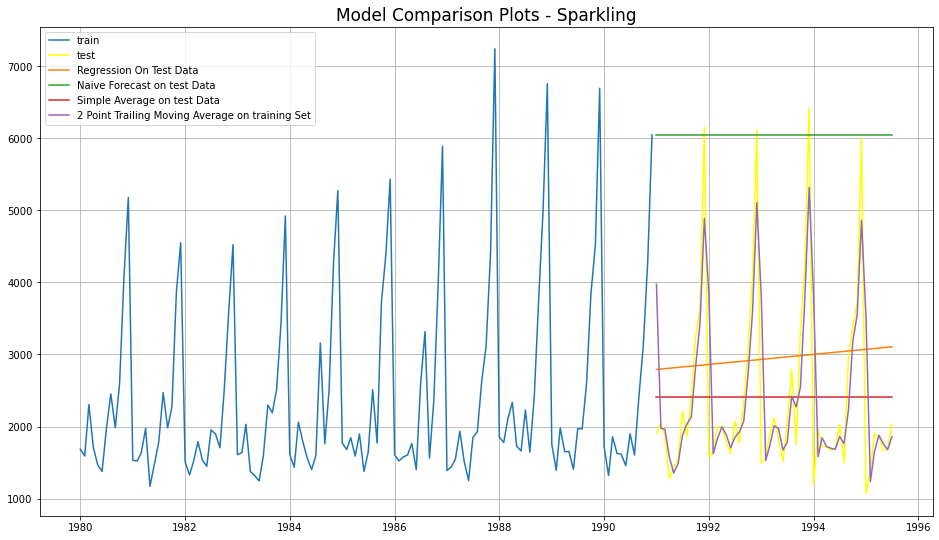

In [110]:
## Plotting on both rtraining and rtest data

plt.plot(strain['Sparkling'], label='train')
plt.plot(stest['Sparkling'], label='test', c='yellow')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots - Sparkling", fontsize=17)
plt.grid();

# Simple Exponential Smoothing, Holt's Model (Double Exponential Smoothing) & Holt-Winter's Model (Triple Exponential Smoothing)

In [111]:
# Importing the necessary packages

import statsmodels.tools.eval_measures as      em
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt

## SES -  ETS(A, N, N) - Simple Exponential Smoothing with additive errors - ROSE


*SimpleExpSmoothing* class must be instantiated and passed the training data. 

The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. 
If this is omitted or set to None, the model will automatically optimize the value.

In [112]:
# create class
model_SES = SimpleExpSmoothing(rtrain,initialization_method='estimated' )

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [113]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [114]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.09874984903268463,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.3869689447322,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Here, Python has optimized the smoothing level to be almost 0.1

In [115]:
# Using the fitted model on the training set to forecast on the test set
SES_predict_rose = model_SES_autofit.forecast(steps=len(rtest))
SES_predict_rose

1991-01-01    87.104998
1991-02-01    87.104998
1991-03-01    87.104998
1991-04-01    87.104998
1991-05-01    87.104998
1991-06-01    87.104998
1991-07-01    87.104998
1991-08-01    87.104998
1991-09-01    87.104998
1991-10-01    87.104998
1991-11-01    87.104998
1991-12-01    87.104998
1992-01-01    87.104998
1992-02-01    87.104998
1992-03-01    87.104998
1992-04-01    87.104998
1992-05-01    87.104998
1992-06-01    87.104998
1992-07-01    87.104998
1992-08-01    87.104998
1992-09-01    87.104998
1992-10-01    87.104998
1992-11-01    87.104998
1992-12-01    87.104998
1993-01-01    87.104998
1993-02-01    87.104998
1993-03-01    87.104998
1993-04-01    87.104998
1993-05-01    87.104998
1993-06-01    87.104998
1993-07-01    87.104998
1993-08-01    87.104998
1993-09-01    87.104998
1993-10-01    87.104998
1993-11-01    87.104998
1993-12-01    87.104998
1994-01-01    87.104998
1994-02-01    87.104998
1994-03-01    87.104998
1994-04-01    87.104998
1994-05-01    87.104998
1994-06-01    87

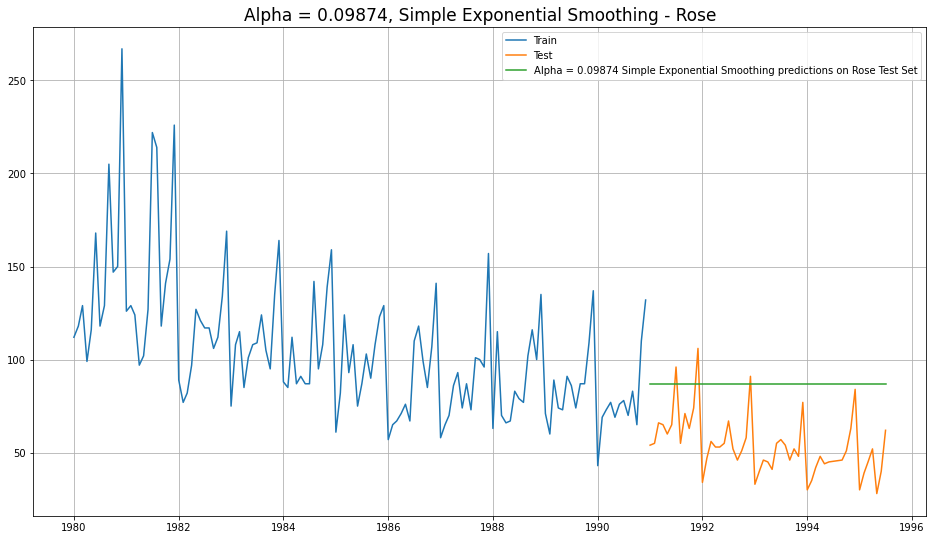

In [116]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha = 0.09874 Simple Exponential Smoothing predictions on Rose Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.09874, Simple Exponential Smoothing - Rose', fontsize=17);
plt.savefig('rose_ses.jpg', bbox_inches='tight');

In [117]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [118]:
print('SES RMSE:',mean_squared_error(rtest.values,SES_predict_rose.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(rtest.values,SES_predict_rose.values)[0])

SES RMSE: 36.79624084939177
SES RMSE (calculated using statsmodels): 36.79624084939177


In [119]:
resultsDf_rses = pd.DataFrame({'Test RMSE Rose': [em.rmse(rtest.values,SES_predict_rose.values)[0]]},index=['Simple Exponential Smoothing'])
resultsDf_rses

Test RMSE Rose
Simple Exponential Smoothing       36.796241

## SES -  ETS(A, N, N) - Simple Exponential Smoothing with additive errors - SPARKLING


*SimpleExpSmoothing* class must be instantiated and passed the training data. 

The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. 
If this is omitted or set to None, the model will automatically optimize the value.

In [120]:
# create class
model_SES = SimpleExpSmoothing(strain,initialization_method='estimated' )

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [121]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [122]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.07028781460389553,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1763.9269926897714,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [123]:
# Using the fitted model on the training set to forecast on the test set
SES_predict_spark = model_SES_autofit.forecast(steps=len(stest))
SES_predict_spark

1991-01-01    2804.662714
1991-02-01    2804.662714
1991-03-01    2804.662714
1991-04-01    2804.662714
1991-05-01    2804.662714
1991-06-01    2804.662714
1991-07-01    2804.662714
1991-08-01    2804.662714
1991-09-01    2804.662714
1991-10-01    2804.662714
1991-11-01    2804.662714
1991-12-01    2804.662714
1992-01-01    2804.662714
1992-02-01    2804.662714
1992-03-01    2804.662714
1992-04-01    2804.662714
1992-05-01    2804.662714
1992-06-01    2804.662714
1992-07-01    2804.662714
1992-08-01    2804.662714
1992-09-01    2804.662714
1992-10-01    2804.662714
1992-11-01    2804.662714
1992-12-01    2804.662714
1993-01-01    2804.662714
1993-02-01    2804.662714
1993-03-01    2804.662714
1993-04-01    2804.662714
1993-05-01    2804.662714
1993-06-01    2804.662714
1993-07-01    2804.662714
1993-08-01    2804.662714
1993-09-01    2804.662714
1993-10-01    2804.662714
1993-11-01    2804.662714
1993-12-01    2804.662714
1994-01-01    2804.662714
1994-02-01    2804.662714
1994-03-01  

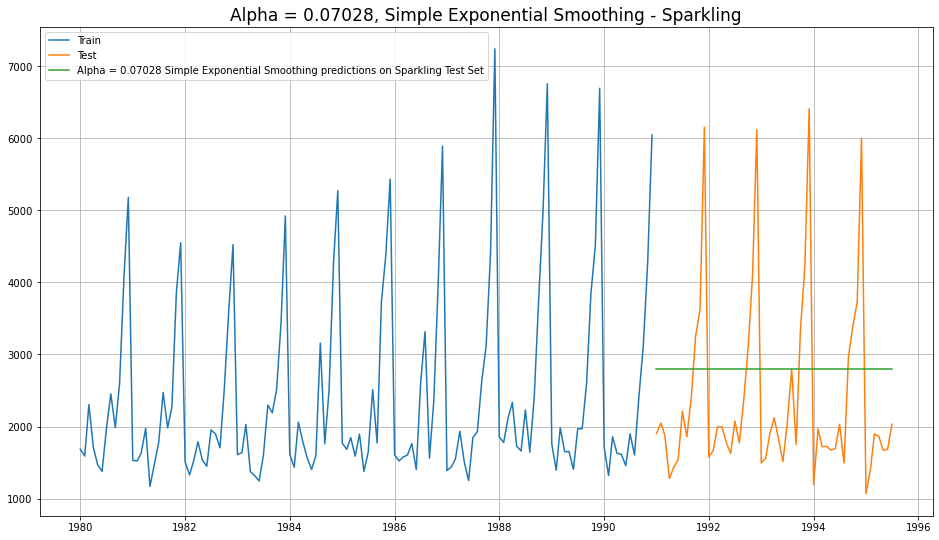

In [124]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha = 0.07028 Simple Exponential Smoothing predictions on Sparkling Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.07028, Simple Exponential Smoothing - Sparkling', fontsize=17);
plt.savefig('spark_ses.jpg', bbox_inches='tight');

In [125]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [126]:
print('SES RMSE:',mean_squared_error(stest.values,SES_predict_spark.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(rtest.values,SES_predict_spark.values)[0])

SES RMSE: 1338.0046232563645
SES RMSE (calculated using statsmodels): 2750.8533130338337


In [127]:
resultsDf_sses = pd.DataFrame({'Test RMSE Sparkling': [em.rmse(stest.values,SES_predict_spark.values)[0]]},index=['Simple Exponential Smoothing'])
resultsDf_sses

Test RMSE Sparkling
Simple Exponential Smoothing          1338.004623

In [128]:
resultsDf7 = resultsDf_rses.join(resultsDf_sses, how='outer')
resultsDf7

Test RMSE Rose  Test RMSE Sparkling
Simple Exponential Smoothing       36.796241          1338.004623

In [129]:
resultsDf8 = pd.concat([resultsDf, resultsDf7], axis=0)
resultsDf8

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                   15.268955          1389.135175
NaiveModel                         79.718773          3864.279352
SimpleAverageModel                 53.460570          1275.081804
2pointTrailingMovingAverage        11.529278           813.400684
4pointTrailingMovingAverage        14.451403          1156.589694
6pointTrailingMovingAverage        14.566327          1283.927428
9pointTrailingMovingAverage        14.727630          1346.278315
Simple Exponential Smoothing       36.796241          1338.004623

In [130]:
resultsDf = resultsDf8.copy()

## Holt - ETS(A, A, N) - Holt's linear method with additive errors - Rose

## Double Exponential Smoothing - Rose

* One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend.
* This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters.
* Applicable when data has Trend but no seasonality.
* Two separate components are considered: Level and Trend.
* Level is the local mean.
* One smoothing parameter α corresponds to the level series
* A second smoothing parameter β corresponds to the trend series.

In [131]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(rtrain,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('Holt model Exponential Smoothing Estimated Parameters :')
print('')
print(model_DES.params)


Holt model Exponential Smoothing Estimated Parameters :

{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 0.0, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.8155475230004, 'initial_trend': -0.4943783477354779, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [132]:
# Forecasting using this model for the duration of the test set
DES_predict_rose =  model_DES.forecast(len(rtest))
DES_predict_rose

1991-01-01    72.063227
1991-02-01    71.568849
1991-03-01    71.074471
1991-04-01    70.580092
1991-05-01    70.085714
1991-06-01    69.591336
1991-07-01    69.096957
1991-08-01    68.602579
1991-09-01    68.108200
1991-10-01    67.613822
1991-11-01    67.119444
1991-12-01    66.625065
1992-01-01    66.130687
1992-02-01    65.636309
1992-03-01    65.141930
1992-04-01    64.647552
1992-05-01    64.153174
1992-06-01    63.658795
1992-07-01    63.164417
1992-08-01    62.670039
1992-09-01    62.175660
1992-10-01    61.681282
1992-11-01    61.186904
1992-12-01    60.692525
1993-01-01    60.198147
1993-02-01    59.703769
1993-03-01    59.209390
1993-04-01    58.715012
1993-05-01    58.220634
1993-06-01    57.726255
1993-07-01    57.231877
1993-08-01    56.737498
1993-09-01    56.243120
1993-10-01    55.748742
1993-11-01    55.254363
1993-12-01    54.759985
1994-01-01    54.265607
1994-02-01    53.771228
1994-03-01    53.276850
1994-04-01    52.782472
1994-05-01    52.288093
1994-06-01    51

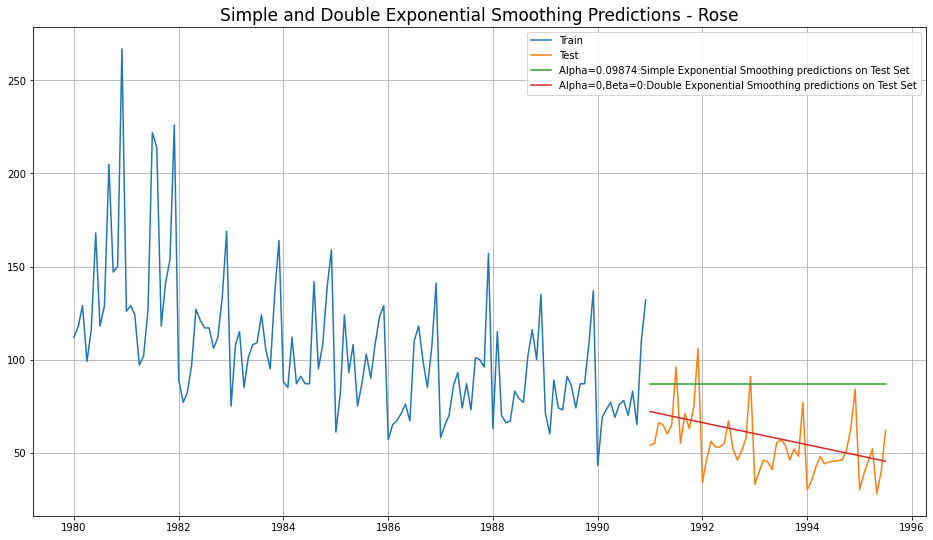

In [133]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions - Rose', fontsize=17);
plt.savefig('rose_rdes.jpg', bbox_inches='tight');

We see that the double exponential smoothing is picking up the trend component along with the level component as well.

In [134]:
print('DES RMSE:',mean_squared_error(rtest.values,DES_predict_rose.values,squared=False))

DES RMSE: 15.268939332533977


In [135]:
resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,DES_predict_rose.values,squared=False)]}
                           ,index=['Double Exponential Smoothing'])

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp

Test RMSE Rose
Double Exponential Smoothing       15.268939

## Holt - ETS(A, A, N) - Holt's linear method with additive errors - Sparkling

## Double Exponential Smoothing - Sparkling



In [136]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(strain,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('Holt model Exponential Smoothing Estimated Parameters :')
print('')
print(model_DES.params)


Holt model Exponential Smoothing Estimated Parameters :

{'smoothing_level': 0.6638769379750992, 'smoothing_trend': 9.966252219085015e-05, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.5681616946074, 'initial_trend': 29.018019327772173, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [137]:
# Forecasting using this model for the duration of the test set
DES_predict_spark =  model_DES.forecast(len(stest))
DES_predict_spark

1991-01-01    5330.498600
1991-02-01    5359.514827
1991-03-01    5388.531055
1991-04-01    5417.547282
1991-05-01    5446.563509
1991-06-01    5475.579737
1991-07-01    5504.595964
1991-08-01    5533.612192
1991-09-01    5562.628419
1991-10-01    5591.644646
1991-11-01    5620.660874
1991-12-01    5649.677101
1992-01-01    5678.693328
1992-02-01    5707.709556
1992-03-01    5736.725783
1992-04-01    5765.742011
1992-05-01    5794.758238
1992-06-01    5823.774465
1992-07-01    5852.790693
1992-08-01    5881.806920
1992-09-01    5910.823147
1992-10-01    5939.839375
1992-11-01    5968.855602
1992-12-01    5997.871830
1993-01-01    6026.888057
1993-02-01    6055.904284
1993-03-01    6084.920512
1993-04-01    6113.936739
1993-05-01    6142.952966
1993-06-01    6171.969194
1993-07-01    6200.985421
1993-08-01    6230.001648
1993-09-01    6259.017876
1993-10-01    6288.034103
1993-11-01    6317.050331
1993-12-01    6346.066558
1994-01-01    6375.082785
1994-02-01    6404.099013
1994-03-01  

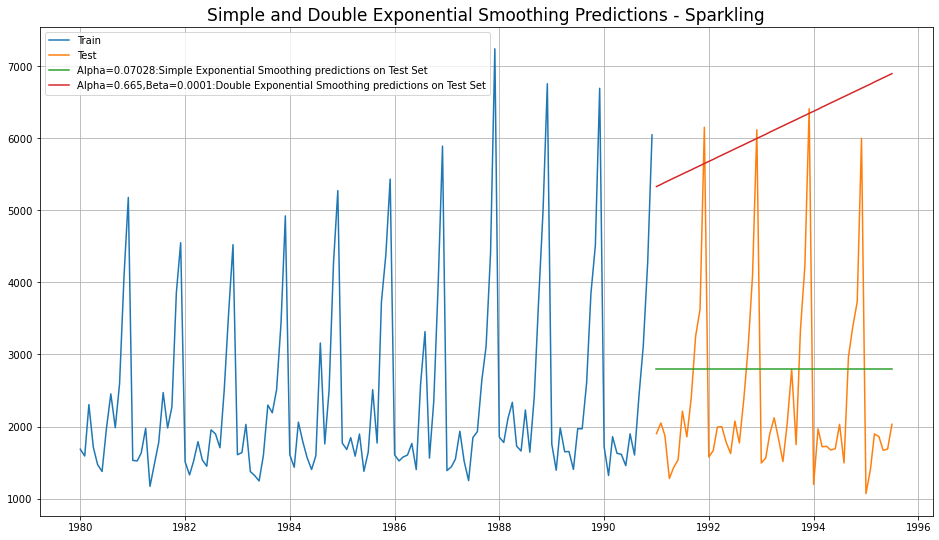

In [138]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions - Sparkling', fontsize=17);
plt.savefig('spark_des.jpg', bbox_inches='tight');

In [139]:
print('DES RMSE:',mean_squared_error(stest.values,DES_predict_spark.values,squared=False))

DES RMSE: 3949.9312976553306


In [140]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,DES_predict_spark.values,squared=False)]}
                           ,index=['Double Exponential Smoothing'])

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp1

Test RMSE Sparkling
Double Exponential Smoothing          3949.931298

In [141]:
resultsDf9 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf9

Test RMSE Rose  Test RMSE Sparkling
Double Exponential Smoothing       15.268939          3949.931298

In [142]:
resultsDf10 = pd.concat([resultsDf, resultsDf9], axis=0)
resultsDf10

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                   15.268955          1389.135175
NaiveModel                         79.718773          3864.279352
SimpleAverageModel                 53.460570          1275.081804
2pointTrailingMovingAverage        11.529278           813.400684
4pointTrailingMovingAverage        14.451403          1156.589694
6pointTrailingMovingAverage        14.566327          1283.927428
9pointTrailingMovingAverage        14.727630          1346.278315
Simple Exponential Smoothing       36.796241          1338.004623
Double Exponential Smoothing       15.268939          3949.931298

In [143]:
resultsDf = resultsDf10.copy()
resultsDf

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                   15.268955          1389.135175
NaiveModel                         79.718773          3864.279352
SimpleAverageModel                 53.460570          1275.081804
2pointTrailingMovingAverage        11.529278           813.400684
4pointTrailingMovingAverage        14.451403          1156.589694
6pointTrailingMovingAverage        14.566327          1283.927428
9pointTrailingMovingAverage        14.727630          1346.278315
Simple Exponential Smoothing       36.796241          1338.004623
Double Exponential Smoothing       15.268939          3949.931298

### Inference

Here, we see that the Double Exponential Smoothing has actually done well when compared to the Simple Exponential Smoothing. This is because of the fact that the Double Exponential Smoothing model has picked up the trend component as well.

<!-- The Holt's model in Python has certain other options of exponential trends or whether the smoothing parameters should be damped. You can try these out later to check whether you get a better forecast. -->

## Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors - ROSE

In [144]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(rtrain,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.08865138141409049, 'smoothing_trend': 0.00014918562959693885, 'smoothing_seasonal': 0.0023466540520445302, 'damping_trend': nan, 'initial_level': 146.88877685331778, 'initial_trend': -0.549568968117238, 'initial_seasons': array([-31.16712757, -18.73604003, -10.73182217, -21.4395915 ,
       -12.71880033,  -7.30879435,   2.64293025,   8.69225736,
         4.84190362,   2.94858978,  21.04019776,  63.54772696]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [145]:
# Forecasting using this model for the duration of the test set
TES_predict_add_rose =  model_TES.forecast(len(rtest))
TES_predict_add_rose

1991-01-01     42.615473
1991-02-01     54.496368
1991-03-01     61.950485
1991-04-01     50.696607
1991-05-01     58.868607
1991-06-01     63.728611
1991-07-01     73.129188
1991-08-01     78.628877
1991-09-01     74.227253
1991-10-01     71.784789
1991-11-01     89.327067
1991-12-01    131.291115
1992-01-01     36.020814
1992-02-01     47.901709
1992-03-01     55.355826
1992-04-01     44.101948
1992-05-01     52.273948
1992-06-01     57.133952
1992-07-01     66.534529
1992-08-01     72.034218
1992-09-01     67.632594
1992-10-01     65.190130
1992-11-01     82.732408
1992-12-01    124.696456
1993-01-01     29.426155
1993-02-01     41.307050
1993-03-01     48.761167
1993-04-01     37.507289
1993-05-01     45.679289
1993-06-01     50.539292
1993-07-01     59.939870
1993-08-01     65.439559
1993-09-01     61.037935
1993-10-01     58.595470
1993-11-01     76.137748
1993-12-01    118.101796
1994-01-01     22.831496
1994-02-01     34.712390
1994-03-01     42.166507
1994-04-01     30.912629


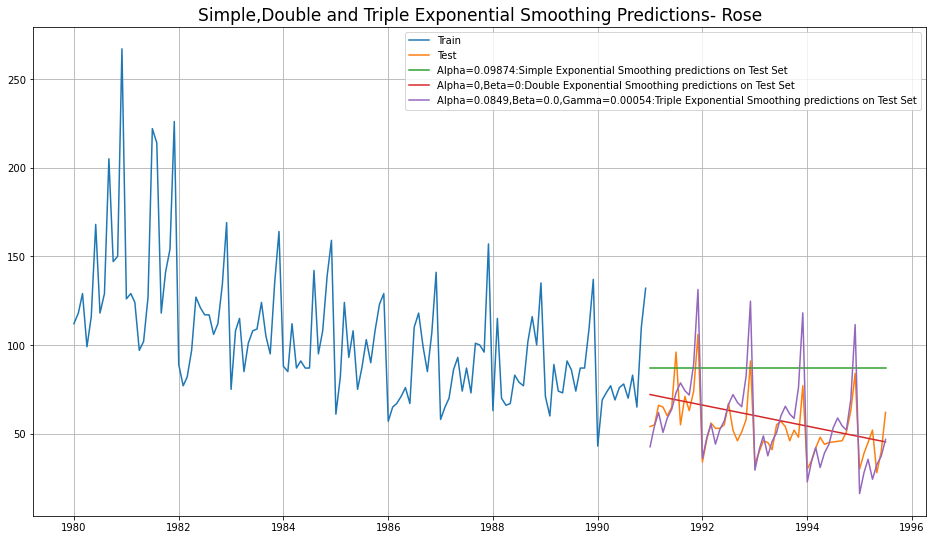

In [146]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions- Rose', fontsize=17);
plt.savefig('rose_add_tes.jpg', bbox_inches='tight');

We see that the Triple Exponential Smoothing is picking up the seasonal component as well.

In [147]:
print('TES RMSE:',mean_squared_error(rtest.values,TES_predict_add_rose.values,squared=False))

TES RMSE: 14.28050413973425


In [148]:
resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,TES_predict_add_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season)'])

import textwrap
textwrap.TextWrapper(resultsDf_temp.index)

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp

Test RMSE Rose
Triple Exponential Smoothing (Additive Season)       14.280504

### Inference

Triple Exponential Smoothing has performed the best on the test as expected since the data had both trend and seasonality. 

<!-- But we see that our triple exponential smoothing is under forecasting. Let us try to tweak some of the parameters in order to get a better forecast on the test set. -->

## Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors - SPARKLING

In [149]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(strain,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.1112722708441868, 'smoothing_trend': 0.012360804011805133, 'smoothing_seasonal': 0.4607176722812185, 'damping_trend': nan, 'initial_level': 2356.5780457745022, 'initial_trend': -0.10071063842436252, 'initial_seasons': array([-636.23320656, -722.98321108, -398.64408844, -473.43046147,
       -808.42474493, -815.34992566, -384.23070718,   72.99480164,
       -237.44227544,  272.32602348, 1541.37739846, 2590.07688887]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [150]:
# Forecasting using this model for the duration of the test set
TES_predict_add_spark =  model_TES.forecast(len(stest))
TES_predict_add_spark

1991-01-01    1490.406418
1991-02-01    1204.529041
1991-03-01    1688.738437
1991-04-01    1551.230744
1991-05-01    1461.202870
1991-06-01    1278.652063
1991-07-01    1804.891340
1991-08-01    1678.961123
1991-09-01    2315.379595
1991-10-01    3224.983064
1991-11-01    4299.308651
1991-12-01    6410.721476
1992-01-01    1482.839506
1992-02-01    1196.962129
1992-03-01    1681.171525
1992-04-01    1543.663832
1992-05-01    1453.635958
1992-06-01    1271.085151
1992-07-01    1797.324428
1992-08-01    1671.394211
1992-09-01    2307.812683
1992-10-01    3217.416152
1992-11-01    4291.741739
1992-12-01    6403.154564
1993-01-01    1475.272594
1993-02-01    1189.395217
1993-03-01    1673.604613
1993-04-01    1536.096920
1993-05-01    1446.069046
1993-06-01    1263.518239
1993-07-01    1789.757516
1993-08-01    1663.827299
1993-09-01    2300.245771
1993-10-01    3209.849240
1993-11-01    4284.174827
1993-12-01    6395.587652
1994-01-01    1467.705682
1994-02-01    1181.828305
1994-03-01  

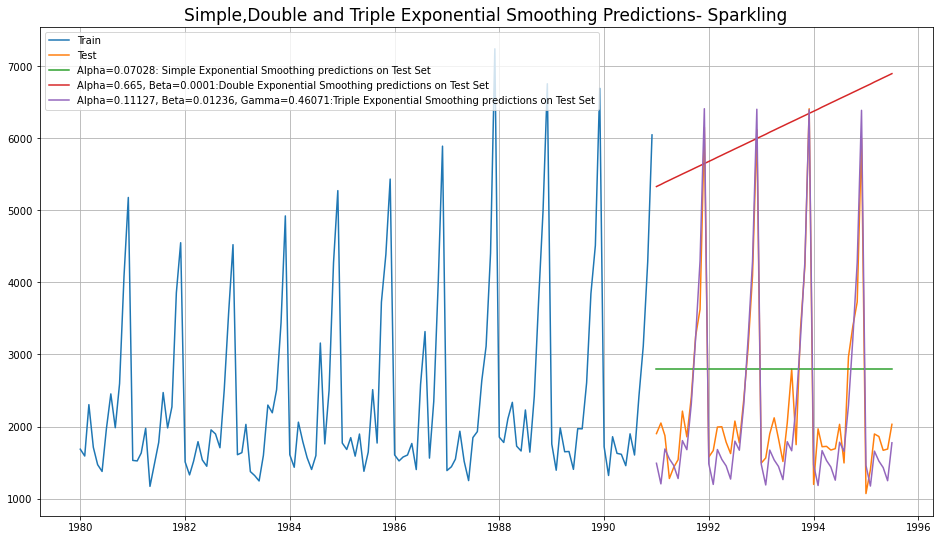

In [151]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.11127, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions- Sparkling', fontsize=17);
plt.savefig('spark_add_tes.jpg', bbox_inches='tight');

We see that the Triple Exponential Smoothing is picking up the seasonal component as well.

In [152]:
print('TES RMSE:',mean_squared_error(stest.values,TES_predict_add_spark.values,squared=False))

TES RMSE: 378.9443254087722


In [153]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,TES_predict_add_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season)'])

import textwrap
textwrap.TextWrapper(resultsDf_temp.index)

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp1

Test RMSE Sparkling
Triple Exponential Smoothing (Additive Season)           378.944325

In [154]:
resultsDf11 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf11

Test RMSE Rose  \
Triple Exponential Smoothing (Additive Season)       14.280504   

                                                Test RMSE Sparkling  
Triple Exponential Smoothing (Additive Season)           378.944325

In [155]:
resultsDf12 = pd.concat([resultsDf, resultsDf11], axis=0)
resultsDf12

Test RMSE Rose  \
RegressionOnTime                                     15.268955   
NaiveModel                                           79.718773   
SimpleAverageModel                                   53.460570   
2pointTrailingMovingAverage                          11.529278   
4pointTrailingMovingAverage                          14.451403   
6pointTrailingMovingAverage                          14.566327   
9pointTrailingMovingAverage                          14.727630   
Simple Exponential Smoothing                         36.796241   
Double Exponential Smoothing                         15.268939   
Triple Exponential Smoothing (Additive Season)       14.280504   

                                                Test RMSE Sparkling  
RegressionOnTime                                        1389.135175  
NaiveModel                                              3864.279352  
SimpleAverageModel                                      1275.081804  
2pointTrailingMovingAverage                              813.400684  
4pointTrailingMovingAverage                             1156.589694  
6pointTrailingMovingAverage                             1283.927428  
9pointTrailingMovingAverage                             1346.278315  
Simple Exponential Smoothing                            1338.004623  
Double Exponential Smoothing                            3949.931298  
Triple Exponential Smoothing (Additive Season)           378.944325

In [156]:
resultsDf = resultsDf12.copy()

## Holt-Winters - ETS(A, A, M) - Holt Winter's linear method - ROSE

### ETS(A, A, M) model - Taking MULTIPLICATIVE SEASONALITY

In [157]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(rtrain,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.06621892536991639, 'smoothing_trend': 0.05130241597404643, 'smoothing_seasonal': 2.6732907021486167e-07, 'damping_trend': nan, 'initial_level': 126.39721935732165, 'initial_trend': -0.7794874071912484, 'initial_seasons': array([0.89177529, 1.01159891, 1.1054501 , 0.96614341, 1.08623824,
       1.18412446, 1.3017767 , 1.38469327, 1.31294464, 1.28483844,
       1.49775256, 2.06558486]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [158]:
# Forecasting using this model for the duration of the test set
TES_predict_am_rose =  model_TES_am.forecast(len(rtest))
TES_predict_am_rose

1991-01-01     56.665453
1991-02-01     64.085515
1991-03-01     69.819256
1991-04-01     60.835667
1991-05-01     68.189618
1991-06-01     74.107635
1991-07-01     81.221411
1991-08-01     86.129502
1991-09-01     81.415112
1991-10-01     79.426094
1991-11-01     92.301055
1991-12-01    126.898730
1992-01-01     54.615152
1992-02-01     61.759724
1992-03-01     67.277690
1992-04-01     58.614384
1992-05-01     65.692223
1992-06-01     71.385187
1992-07-01     78.228467
1992-08-01     82.945923
1992-09-01     78.396491
1992-10-01     76.472093
1992-11-01     88.857537
1992-12-01    122.149697
1993-01-01     52.564851
1993-02-01     59.433934
1993-03-01     64.736124
1993-04-01     56.393101
1993-05-01     63.194827
1993-06-01     68.662740
1993-07-01     75.235522
1993-08-01     79.762343
1993-09-01     75.377870
1993-10-01     73.518091
1993-11-01     85.414020
1993-12-01    117.400664
1994-01-01     50.514550
1994-02-01     57.108143
1994-03-01     62.194559
1994-04-01     54.171818


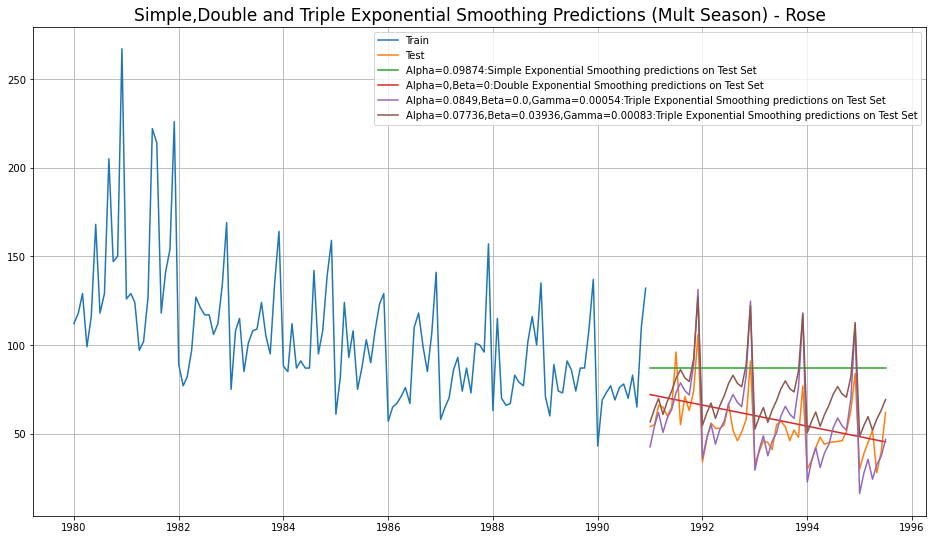

In [159]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_rose, label='Alpha=0.07736,Beta=0.03936,Gamma=0.00083:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season) - Rose', fontsize=17);

plt.savefig('rose_mul_tes.jpg', bbox_inches='tight');

### Report model accuracy

In [160]:
print('TES_am RMSE_rose:',mean_squared_error(rtest.values,TES_predict_am_rose.values,squared=False))

TES_am RMSE_rose: 20.949675795280992


In [161]:
# resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
#                            ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
# resultsDf

resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,TES_predict_am_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season)'])



resultsDf_temp

Test RMSE Rose
Triple Exponential Smoothing (Multiplicative Se...       20.949676

We see that the multiplicative seasonality model has not done that well when compared to the additive seasonality Triple Exponential Smoothing model.

<!-- There are various other parameters in the models. Please do feel free to play around with those in the hope of getting a better forecast on the test set. -->

## Holt-Winters - ETS(A, A, M) - Holt Winter's linear method - SPARKLING

### ETS(A, A, M) model - Taking MULTIPLICATIVE SEASONALITY

In [162]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(strain,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11104076314043171, 'smoothing_trend': 0.049348365324315684, 'smoothing_seasonal': 0.36232794311434374, 'damping_trend': nan, 'initial_level': 2356.510722747615, 'initial_trend': -9.729116859640436, 'initial_seasons': array([0.71251887, 0.6830697 , 0.90596553, 0.8058403 , 0.65605007,
       0.65424925, 0.88796426, 1.13391231, 0.91920101, 1.21223812,
       1.87074711, 2.37464156]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [163]:
# Forecasting using this model for the duration of the test set
TES_predict_am_spark =  model_TES_am.forecast(len(stest))
TES_predict_am_spark

1991-01-01    1587.864666
1991-02-01    1356.648339
1991-03-01    1763.307702
1991-04-01    1656.501849
1991-05-01    1542.339421
1991-06-01    1355.430169
1991-07-01    1854.667549
1991-08-01    1820.739312
1991-09-01    2277.549303
1991-10-01    3122.952179
1991-11-01    4129.813914
1991-12-01    5892.688044
1992-01-01    1538.913349
1992-02-01    1314.717328
1992-03-01    1708.667011
1992-04-01    1605.037920
1992-05-01    1494.297894
1992-06-01    1313.100706
1992-07-01    1796.596002
1992-08-01    1763.580952
1992-09-01    2205.862797
1992-10-01    3024.397877
1992-11-01    3999.141364
1992-12-01    5705.742990
1993-01-01    1489.962032
1993-02-01    1272.786317
1993-03-01    1654.026319
1993-04-01    1553.573992
1993-05-01    1446.256366
1993-06-01    1270.771242
1993-07-01    1738.524455
1993-08-01    1706.422592
1993-09-01    2134.176290
1993-10-01    2925.843575
1993-11-01    3868.468815
1993-12-01    5518.797936
1994-01-01    1441.010715
1994-02-01    1230.855306
1994-03-01  

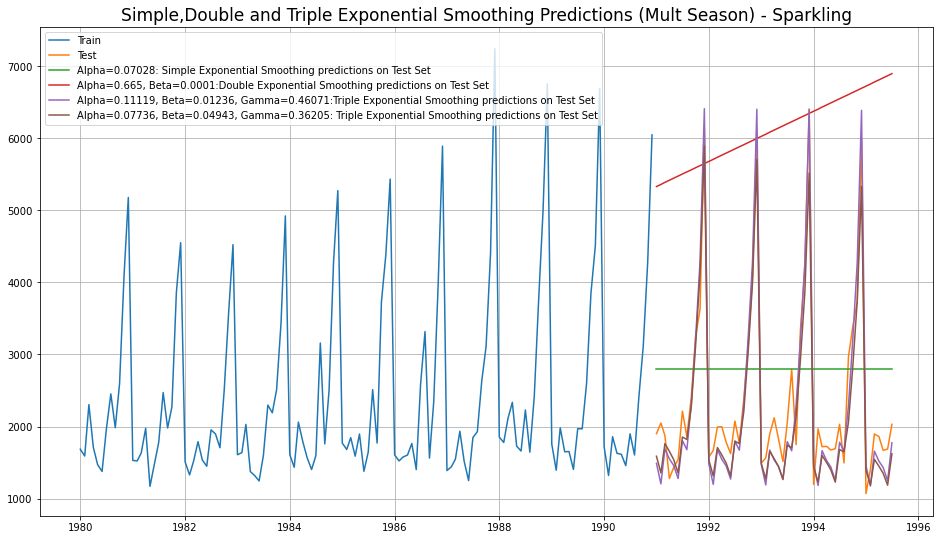

In [164]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.11119, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')

plt.plot(TES_predict_am_spark, label='Alpha=0.07736, Beta=0.04943, Gamma=0.36205: Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season) - Sparkling', fontsize=17);

plt.savefig('spark_mul_tes.jpg', bbox_inches='tight');

### Report model accuracy

In [165]:
print('TES_am RMSE_spark:',mean_squared_error(stest.values,TES_predict_am_spark.values,squared=False))

TES_am RMSE_spark: 403.125867235564


In [166]:
# resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
#                            ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
# resultsDf

resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,TES_predict_am_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season)'])



resultsDf_temp1

Test RMSE Sparkling
Triple Exponential Smoothing (Multiplicative Se...           403.125867

In [167]:
resultsDf13 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf13

Test RMSE Rose  \
Triple Exponential Smoothing (Multiplicative Se...       20.949676   

                                                    Test RMSE Sparkling  
Triple Exponential Smoothing (Multiplicative Se...           403.125867

In [168]:
resultsDf14 = pd.concat([resultsDf, resultsDf13], axis=0)
resultsDf14

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796241   
Double Exponential Smoothing                             15.268939   
Triple Exponential Smoothing (Additive Season)           14.280504   
Triple Exponential Smoothing (Multiplicative Se...       20.949676   

                                                    Test RMSE Sparkling  
RegressionOnTime                                            1389.135175  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Simple Exponential Smoothing                                1338.004623  
Double Exponential Smoothing                                3949.931298  
Triple Exponential Smoothing (Additive Season)               378.944325  
Triple Exponential Smoothing (Multiplicative Se...           403.125867

In [169]:
resultsDf = resultsDf14.copy()
resultsDf

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796241   
Double Exponential Smoothing                             15.268939   
Triple Exponential Smoothing (Additive Season)           14.280504   
Triple Exponential Smoothing (Multiplicative Se...       20.949676   

                                                    Test RMSE Sparkling  
RegressionOnTime                                            1389.135175  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Simple Exponential Smoothing                                1338.004623  
Double Exponential Smoothing                                3949.931298  
Triple Exponential Smoothing (Additive Season)               378.944325  
Triple Exponential Smoothing (Multiplicative Se...           403.125867

In [170]:
resultsDf.to_csv('results_all.csv')

## Holt-Winters - ETS(A, Ad, A) - Holt Winter's linear method with additive errors - ROSE

### USING DAMPED TREND

In [171]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(rtrain,trend='additive',seasonal='additive',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.06926353203026643, 'smoothing_trend': 0.00923475002905121, 'smoothing_seasonal': 0.07195163988986004, 'damping_trend': 0.9764675812519183, 'initial_level': 155.00679554487238, 'initial_trend': -1.4603056785483608, 'initial_seasons': array([-30.40033993, -18.74588428, -10.72564717, -22.54277777,
       -13.25593764,  -6.47310672,   3.63224293,  10.5439475 ,
         6.19877151,   3.58150335,  21.51467033,  66.40321112]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [172]:
# Forecasting using this model for the duration of the test set
TES_predict_add_damp_rose =  model_TES.forecast(len(rtest))
TES_predict_add_damp_rose

1991-01-01     48.530419
1991-02-01     61.145978
1991-03-01     68.566250
1991-04-01     58.261745
1991-05-01     65.955044
1991-06-01     71.102856
1991-07-01     80.628635
1991-08-01     86.100395
1991-09-01     83.556448
1991-10-01     81.531013
1991-11-01     99.551675
1991-12-01    141.680847
1992-01-01     47.366280
1992-02-01     60.009234
1992-03-01     67.456256
1992-04-01     57.177872
1992-05-01     64.896677
1992-06-01     70.069395
1992-07-01     79.619494
1992-08-01     85.115002
1992-09-01     82.594243
1992-10-01     80.591451
1992-11-01     98.634223
1992-12-01    140.784986
1993-01-01     46.491500
1993-02-01     59.155040
1993-03-01     66.622163
1993-04-01     56.363408
1993-05-01     64.101379
1993-06-01     69.292812
1993-07-01     78.861186
1993-08-01     84.374538
1993-09-01     81.871204
1993-10-01     79.885427
1993-11-01     97.944814
1993-12-01    140.111800
1994-01-01     45.834156
1994-02-01     58.513165
1994-03-01     65.995393
1994-04-01     55.751387


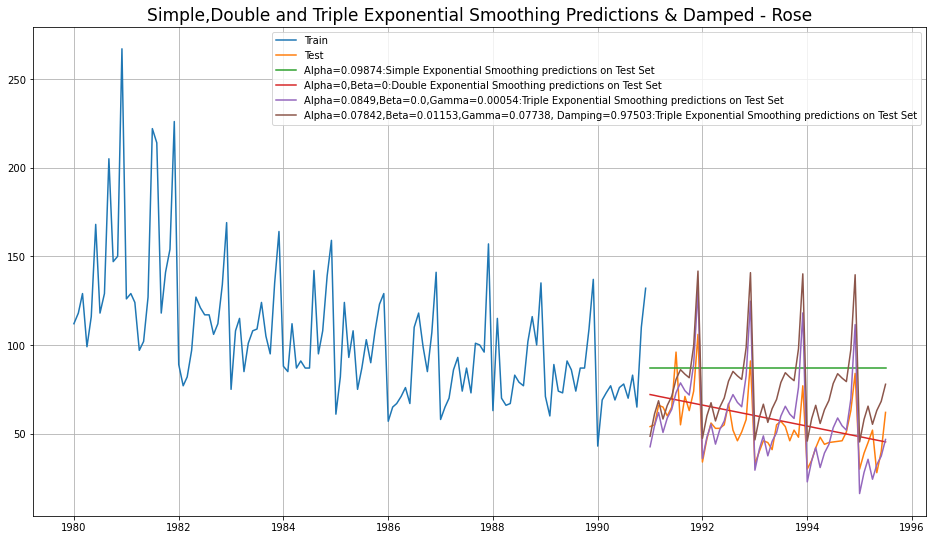

In [173]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_damp_rose, label='Alpha=0.07842,Beta=0.01153,Gamma=0.07738, Damping=0.97503:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions & Damped - Rose', fontsize=17);
plt.savefig('rose_add_damp_tes.jpg', bbox_inches='tight');

In [174]:
print('TES RMSE DAMPED ROSE:',mean_squared_error(rtest.values,TES_predict_add_damp_rose.values,squared=False))

TES RMSE DAMPED ROSE: 26.50371394437468


In [175]:
resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,TES_predict_add_damp_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season, Damped Trend)'])

import textwrap
textwrap.TextWrapper(resultsDf_temp.index)

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp

Test RMSE Rose
Triple Exponential Smoothing (Additive Season, ...       26.503714

## Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors - SPARKLING

### USING DAMPED TREND

In [176]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(strain,trend='additive',seasonal='additive',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11130170448043226, 'smoothing_trend': 0.00010018544635306122, 'smoothing_seasonal': 0.46068730417199644, 'damping_trend': 0.9900012175314848, 'initial_level': 2356.6761474352647, 'initial_trend': -0.04422027839395726, 'initial_seasons': array([-636.23261482, -722.98124799, -398.6266445 , -473.42670028,
       -808.42316311, -815.34798325, -384.22313886,   73.0096398 ,
       -237.44188444,  272.33235584, 1541.39956762, 2590.09577591]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [177]:
# Forecasting using this model for the duration of the test set
TES_predict_add_damp_spark =  model_TES.forecast(len(stest))
TES_predict_add_damp_spark

1991-01-01    1484.903545
1991-02-01    1200.729064
1991-03-01    1686.333451
1991-04-01    1550.172051
1991-05-01    1461.209225
1991-06-01    1279.625334
1991-07-01    1806.777508
1991-08-01    1681.610249
1991-09-01    2318.155723
1991-10-01    3228.082062
1991-11-01    4302.787958
1991-12-01    6410.854270
1992-01-01    1484.713826
1992-02-01    1200.541242
1992-03-01    1686.147507
1992-04-01    1549.987966
1992-05-01    1461.026981
1992-06-01    1279.444912
1992-07-01    1806.598890
1992-08-01    1681.433417
1992-09-01    2317.980659
1992-10-01    3227.908748
1992-11-01    4302.616378
1992-12-01    6410.684405
1993-01-01    1484.545659
1993-02-01    1200.374756
1993-03-01    1685.982686
1993-04-01    1549.824793
1993-05-01    1460.865440
1993-06-01    1279.284986
1993-07-01    1806.440563
1993-08-01    1681.276673
1993-09-01    2317.825482
1993-10-01    3227.755123
1993-11-01    4302.464289
1993-12-01    6410.533837
1994-01-01    1484.396597
1994-02-01    1200.227184
1994-03-01  

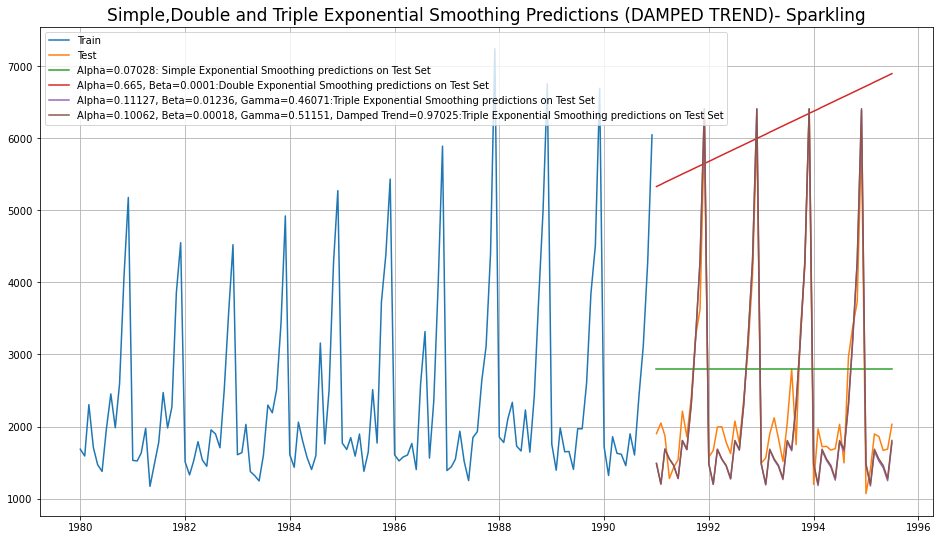

In [178]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.11127, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_damp_spark, label='Alpha=0.10062, Beta=0.00018, Gamma=0.51151, Damped Trend=0.97025:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (DAMPED TREND)- Sparkling', fontsize=17);
plt.savefig('spark_add_damp_tes.jpg', bbox_inches='tight');

In [179]:
print('TES RMSE SPARK DAMPED:',mean_squared_error(stest.values,TES_predict_add_damp_spark.values,squared=False))

TES RMSE SPARK DAMPED: 373.64402518561496


In [180]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,TES_predict_add_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season, Damped Trend)'])

import textwrap
textwrap.TextWrapper(resultsDf_temp.index)

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp1

Test RMSE Sparkling
Triple Exponential Smoothing (Additive Season, ...           378.944325

In [181]:
resultsDf11 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf11

Test RMSE Rose  \
Triple Exponential Smoothing (Additive Season, ...       26.503714   

                                                    Test RMSE Sparkling  
Triple Exponential Smoothing (Additive Season, ...           378.944325

In [182]:
resultsDf12 = pd.concat([resultsDf, resultsDf11], axis=0)
resultsDf12

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796241   
Double Exponential Smoothing                             15.268939   
Triple Exponential Smoothing (Additive Season)           14.280504   
Triple Exponential Smoothing (Multiplicative Se...       20.949676   
Triple Exponential Smoothing (Additive Season, ...       26.503714   

                                                    Test RMSE Sparkling  
RegressionOnTime                                            1389.135175  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Simple Exponential Smoothing                                1338.004623  
Double Exponential Smoothing                                3949.931298  
Triple Exponential Smoothing (Additive Season)               378.944325  
Triple Exponential Smoothing (Multiplicative Se...           403.125867  
Triple Exponential Smoothing (Additive Season, ...           378.944325

In [183]:
resultsDf = resultsDf12.copy()

## Holt-Winters - ETS(A, A, M) - Holt Winter's linear method - ROSE

### USING DAMPED TREND

### ETS(A, Ad, M) model - Taking MULTIPLICATIVE SEASONALITY

In [184]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(rtrain,trend='add',seasonal='multiplicative',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 3.891320287856803e-08, 'smoothing_trend': 7.562647660661012e-09, 'smoothing_seasonal': 1.847198060125421e-08, 'damping_trend': 0.9797585404628992, 'initial_level': 179.97392617473224, 'initial_trend': -2.0297460336630655, 'initial_seasons': array([0.64957558, 0.73883417, 0.80588687, 0.70616339, 0.78999799,
       0.85788475, 0.93955834, 0.99790974, 0.96031476, 0.93242335,
       1.08584411, 1.48876579]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [185]:
# Forecasting using this model for the duration of the test set
TES_predict_am_damp_rose =  model_TES_am.forecast(len(rtest))
TES_predict_am_damp_rose

1991-01-01     57.293037
1991-02-01     65.068895
1991-03-01     70.870742
1991-04-01     62.012103
1991-05-01     69.276722
1991-06-01     75.126280
1991-07-01     82.167410
1991-08-01     87.154763
1991-09-01     83.762265
1991-10-01     81.225728
1991-11-01     94.472226
1991-12-01    129.368811
1992-01-01     56.377992
1992-02-01     64.049180
1992-03-01     69.780996
1992-04-01     61.076535
1992-05-01     68.251270
1992-06-01     74.035249
1992-07-01     80.996695
1992-08-01     85.936510
1992-09-01     82.613637
1992-10-01     80.133036
1992-11-01     93.225499
1992-12-01    127.694065
1993-01-01     55.662060
1993-02-01     63.251354
1993-03-01     68.928379
1993-04-01     60.344547
1993-05-01     67.448957
1993-06-01     73.181626
1993-07-01     80.080728
1993-08-01     84.983348
1993-09-01     81.714952
1993-10-01     79.278114
1993-11-01     92.250061
1993-12-01    126.383744
1994-01-01     55.101916
1994-02-01     62.627136
1994-03-01     68.261292
1994-04-01     59.771840


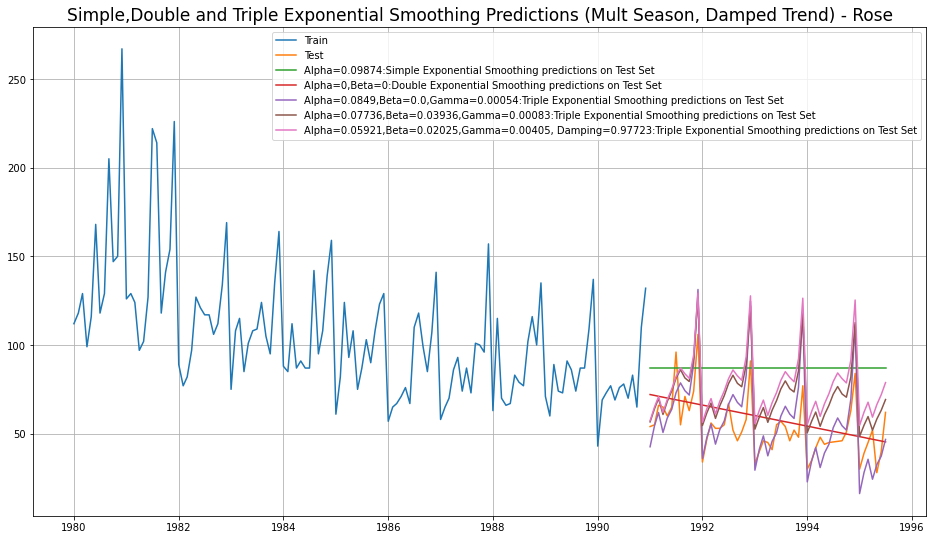

In [186]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_rose, label='Alpha=0.07736,Beta=0.03936,Gamma=0.00083:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_damp_rose, label='Alpha=0.05921,Beta=0.02025,Gamma=0.00405, Damping=0.97723:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season, Damped Trend) - Rose', fontsize=17);

plt.savefig('rose_mul_damp_tes.jpg', bbox_inches='tight');

### Report model accuracy

In [187]:
print('TES_am RMSE_rose DAMPED:',mean_squared_error(rtest.values,TES_predict_am_damp_rose.values,squared=False))

TES_am RMSE_rose DAMPED: 25.82603228956844


In [188]:
# resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
#                            ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
# resultsDf

resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,TES_predict_am_damp_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season, Damped Trend)'])



resultsDf_temp

Test RMSE Rose
Triple Exponential Smoothing (Multiplicative Se...       25.826032

## Holt-Winters - ETS(A, A, M) - Holt Winter's linear method - SPARKLING

### ETS(A, A, M) model - Taking MULTIPLICATIVE SEASONALITY

### USING DAMPED TREND

In [189]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(strain,trend='add',seasonal='multiplicative',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11106052423421174, 'smoothing_trend': 0.03701647223985424, 'smoothing_seasonal': 0.39513378502815255, 'damping_trend': 0.9900004449237181, 'initial_level': 2356.510577464402, 'initial_trend': -10.036314551233342, 'initial_seasons': array([0.71375176, 0.68455638, 0.90053564, 0.80547398, 0.65380817,
       0.6546513 , 0.8817329 , 1.12341156, 0.91579514, 1.19236091,
       1.85224145, 2.3434743 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [190]:
# Forecasting using this model for the duration of the test set
TES_predict_am_damp_spark =  model_TES_am.forecast(len(stest))
TES_predict_am_damp_spark

1991-01-01    1591.417743
1991-02-01    1348.064192
1991-03-01    1768.332413
1991-04-01    1654.030346
1991-05-01    1548.102859
1991-06-01    1363.558666
1991-07-01    1862.850750
1991-08-01    1797.282855
1991-09-01    2310.532266
1991-10-01    3163.659822
1991-11-01    4176.932920
1991-12-01    5994.258866
1992-01-01    1558.906046
1992-02-01    1320.750336
1992-03-01    1732.798181
1992-04-01    1621.067045
1992-05-01    1517.505434
1992-06-01    1336.831653
1992-07-01    1826.639797
1992-08-01    1762.636514
1992-09-01    2266.362422
1992-10-01    3103.684809
1992-11-01    4098.409589
1992-12-01    5882.513044
1993-01-01    1530.088015
1993-02-01    1296.539617
1993-03-01    1701.301005
1993-04-01    1591.848717
1993-05-01    1490.384193
1993-06-01    1313.141104
1993-07-01    1794.542784
1993-08-01    1731.926355
1993-09-01    2227.210729
1993-10-01    3050.523578
1993-11-01    4028.807320
1993-12-01    5783.462703
1994-01-01    1504.544010
1994-02-01    1275.079485
1994-03-01  

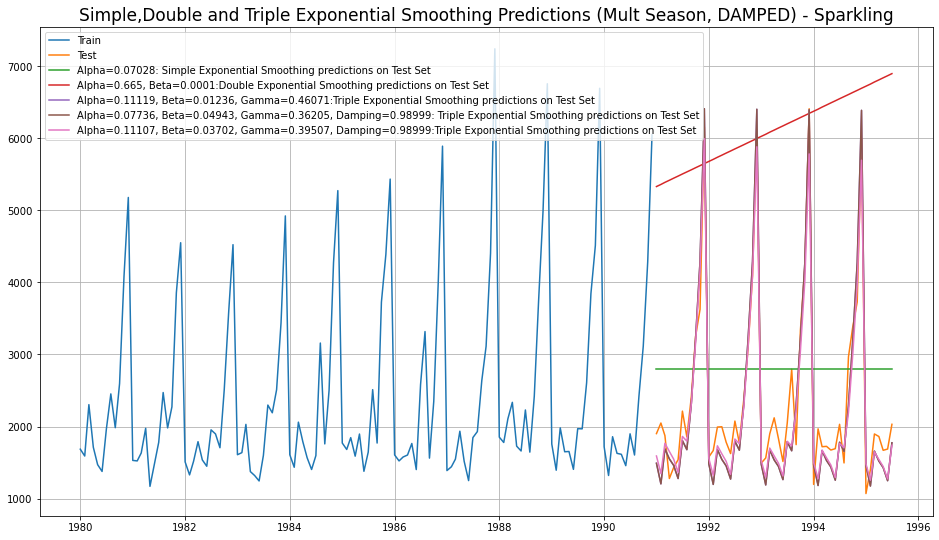

In [191]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.11119, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.07736, Beta=0.04943, Gamma=0.36205, Damping=0.98999: Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_damp_spark, label='Alpha=0.11107, Beta=0.03702, Gamma=0.39507, Damping=0.98999:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season, DAMPED) - Sparkling', fontsize=17);

plt.savefig('spark_mul_damp_tes.jpg', bbox_inches='tight');

### Report model accuracy

In [192]:
print('TES_am DAMPED RMSE_spark:',mean_squared_error(stest.values,TES_predict_am_damp_spark.values,squared=False))

TES_am DAMPED RMSE_spark: 352.4646741278019


In [193]:
# resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
#                            ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
# resultsDf

resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,TES_predict_am_damp_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season, Damped Trend)'])



resultsDf_temp1

Test RMSE Sparkling
Triple Exponential Smoothing (Multiplicative Se...           352.464674

In [194]:
resultsDf13 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf13

Test RMSE Rose  \
Triple Exponential Smoothing (Multiplicative Se...       25.826032   

                                                    Test RMSE Sparkling  
Triple Exponential Smoothing (Multiplicative Se...           352.464674

In [195]:
resultsDf14 = pd.concat([resultsDf, resultsDf13], axis=0)
resultsDf14

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796241   
Double Exponential Smoothing                             15.268939   
Triple Exponential Smoothing (Additive Season)           14.280504   
Triple Exponential Smoothing (Multiplicative Se...       20.949676   
Triple Exponential Smoothing (Additive Season, ...       26.503714   
Triple Exponential Smoothing (Multiplicative Se...       25.826032   

                                                    Test RMSE Sparkling  
RegressionOnTime                                            1389.135175  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Simple Exponential Smoothing                                1338.004623  
Double Exponential Smoothing                                3949.931298  
Triple Exponential Smoothing (Additive Season)               378.944325  
Triple Exponential Smoothing (Multiplicative Se...           403.125867  
Triple Exponential Smoothing (Additive Season, ...           378.944325  
Triple Exponential Smoothing (Multiplicative Se...           352.464674

In [196]:
resultsDf = resultsDf14.copy()
resultsDf

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796241   
Double Exponential Smoothing                             15.268939   
Triple Exponential Smoothing (Additive Season)           14.280504   
Triple Exponential Smoothing (Multiplicative Se...       20.949676   
Triple Exponential Smoothing (Additive Season, ...       26.503714   
Triple Exponential Smoothing (Multiplicative Se...       25.826032   

                                                    Test RMSE Sparkling  
RegressionOnTime                                            1389.135175  
NaiveModel                                                  3864.279352  
SimpleAverageModel                                          1275.081804  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Simple Exponential Smoothing                                1338.004623  
Double Exponential Smoothing                                3949.931298  
Triple Exponential Smoothing (Additive Season)               378.944325  
Triple Exponential Smoothing (Multiplicative Se...           403.125867  
Triple Exponential Smoothing (Additive Season, ...           378.944325  
Triple Exponential Smoothing (Multiplicative Se...           352.464674

In [197]:
resultsDf.to_csv('results_all.csv')

## Best Model for Rose till Now - 2 Pt Moving Average

In [198]:
MovingAverage = dfr.copy()
MovingAverage.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

#### Trailing moving averages

In [199]:

MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()

MovingAverage.head()

Rose  Trailing_2
YearMonth                    
1980-01-01  112.0         NaN
1980-02-01  118.0       115.0
1980-03-01  129.0       123.5
1980-04-01   99.0       114.0
1980-05-01  116.0       107.5

In [200]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

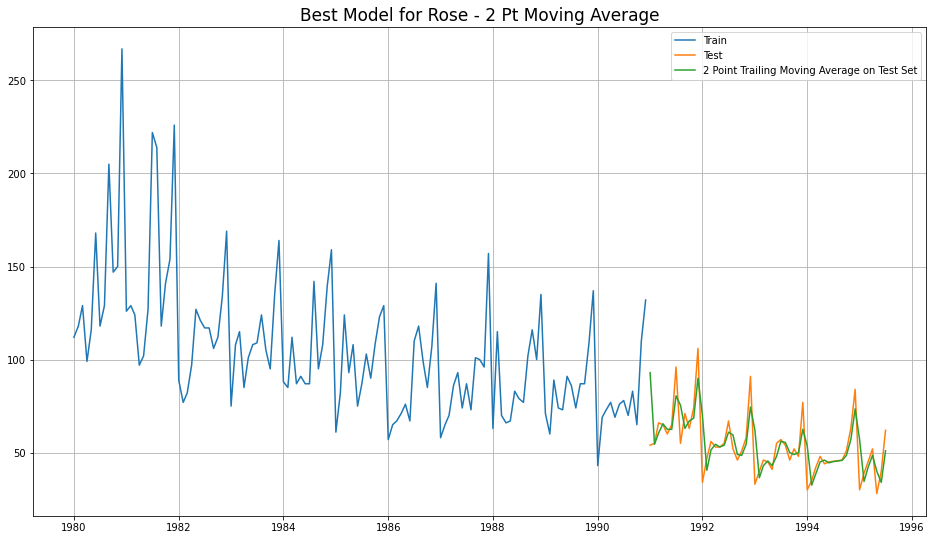

In [201]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')


plt.legend(loc = 'best')
plt.grid();
plt.title('Best Model for Rose - 2 Pt Moving Average', fontsize=17);
plt.savefig('rose_best_model_2pt.jpg', bbox_inches='tight');

## Holt-Winters - ETS(A, A, M) - Best Model for Sparkling Till Now

### ETS(A, Ad, M) model - Taking MULTIPLICATIVE SEASONALITY

### USING DAMPED TREND

In [202]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(strain,trend='add',seasonal='multiplicative',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11106052423421174, 'smoothing_trend': 0.03701647223985424, 'smoothing_seasonal': 0.39513378502815255, 'damping_trend': 0.9900004449237181, 'initial_level': 2356.510577464402, 'initial_trend': -10.036314551233342, 'initial_seasons': array([0.71375176, 0.68455638, 0.90053564, 0.80547398, 0.65380817,
       0.6546513 , 0.8817329 , 1.12341156, 0.91579514, 1.19236091,
       1.85224145, 2.3434743 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [203]:
# Forecasting using this model for the duration of the test set
TES_predict_am_damp_spark =  model_TES_am.forecast(len(stest))
TES_predict_am_damp_spark

1991-01-01    1591.417743
1991-02-01    1348.064192
1991-03-01    1768.332413
1991-04-01    1654.030346
1991-05-01    1548.102859
1991-06-01    1363.558666
1991-07-01    1862.850750
1991-08-01    1797.282855
1991-09-01    2310.532266
1991-10-01    3163.659822
1991-11-01    4176.932920
1991-12-01    5994.258866
1992-01-01    1558.906046
1992-02-01    1320.750336
1992-03-01    1732.798181
1992-04-01    1621.067045
1992-05-01    1517.505434
1992-06-01    1336.831653
1992-07-01    1826.639797
1992-08-01    1762.636514
1992-09-01    2266.362422
1992-10-01    3103.684809
1992-11-01    4098.409589
1992-12-01    5882.513044
1993-01-01    1530.088015
1993-02-01    1296.539617
1993-03-01    1701.301005
1993-04-01    1591.848717
1993-05-01    1490.384193
1993-06-01    1313.141104
1993-07-01    1794.542784
1993-08-01    1731.926355
1993-09-01    2227.210729
1993-10-01    3050.523578
1993-11-01    4028.807320
1993-12-01    5783.462703
1994-01-01    1504.544010
1994-02-01    1275.079485
1994-03-01  

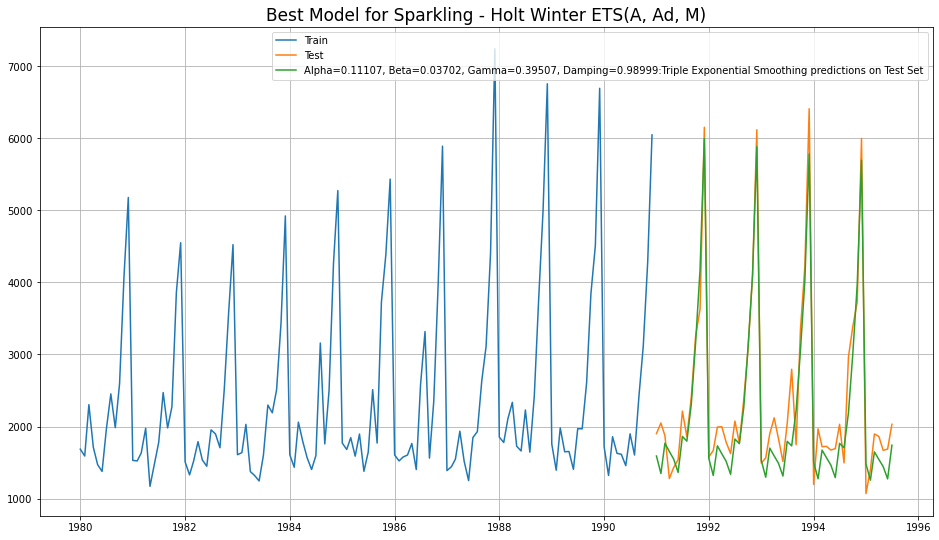

In [204]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(TES_predict_am_damp_spark, label='Alpha=0.11107, Beta=0.03702, Gamma=0.39507, Damping=0.98999:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Best Model for Sparkling - Holt Winter ETS(A, Ad, M)', fontsize=17);

plt.savefig('spark_best_model.jpg', bbox_inches='tight');

# ==================================================================================================================

# ==================================================================================================================

## Check Stationarity of ROSE Data

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [205]:
from statsmodels.tsa.stattools import adfuller

In [206]:
dfrs = adfuller(dfr,regression='ct')
print('DF test statistic is %3.3f' %dfrs[0])
print('DF test p-value is' ,dfrs[1])
print('Number of lags used' ,dfrs[2])

DF test statistic is -2.240
DF test p-value is 0.46713716277930867
Number of lags used 13


We see that at 5% significant level the Time Series is non-stationary.

Let us take one level of differencing to see whether the series becomes stationary.

In [207]:
dfrs = adfuller(dfr.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dfrs[0])
print('DF test p-value is' ,dfrs[1])
print('Number of lags used' ,dfrs[2])

DF test statistic is -8.162
DF test p-value is 3.015976115827275e-11
Number of lags used 12


We see that p-value < alpha=0.05
Hence, we reject the Null Hypothesis

We conclude that with a lag 1 - now the Rose data is Stationary

Now, let us go ahead and plot the stationary series.

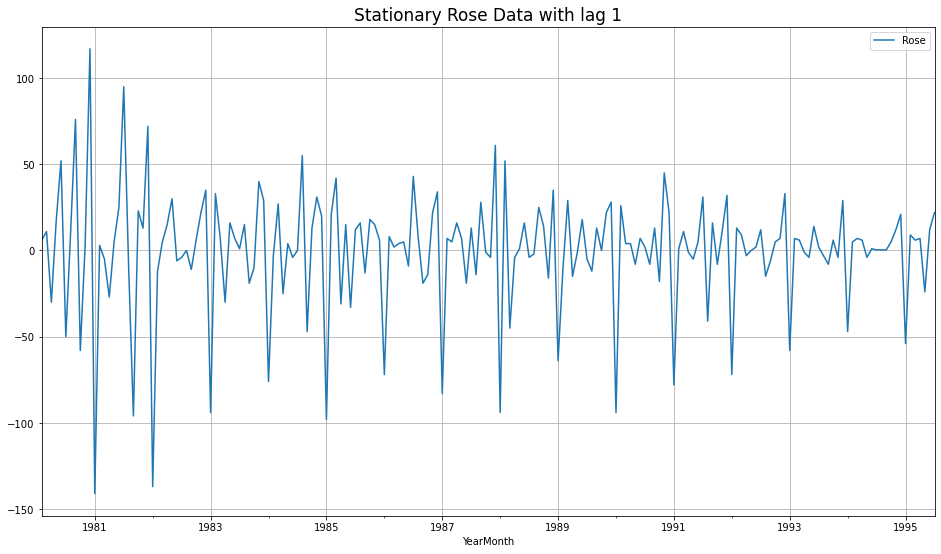

In [208]:
dfr.diff().dropna().plot(grid=True);
plt.title('Stationary Rose Data with lag 1', fontsize=17);
plt.savefig('rose_stationary.jpg', bbox_inches='tight');

## Check Stationarity of SPARKLING Data

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [209]:
dfss = adfuller(dfs,regression='ct')
print('DF test statistic is %3.3f' %dfss[0])
print('DF test p-value is' ,dfss[1])
print('Number of lags used' ,dfss[2])

DF test statistic is -1.798
DF test p-value is 0.7055958459932069
Number of lags used 12


We see that at 5% significant level the Time Series is non-stationary.

Let us take one level of differencing to see whether the series becomes stationary.

In [210]:
dfss = adfuller(dfs.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dfss[0])
print('DF test p-value is' ,dfss[1])
print('Number of lags used' ,dfss[2])

DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10


We see that p-value < alpha=0.05
Hence, we reject the Null Hypothesis

We conclude that with a lag 1 - now the Sparkling data is Stationary

Now, let us go ahead and plot the stationary series.

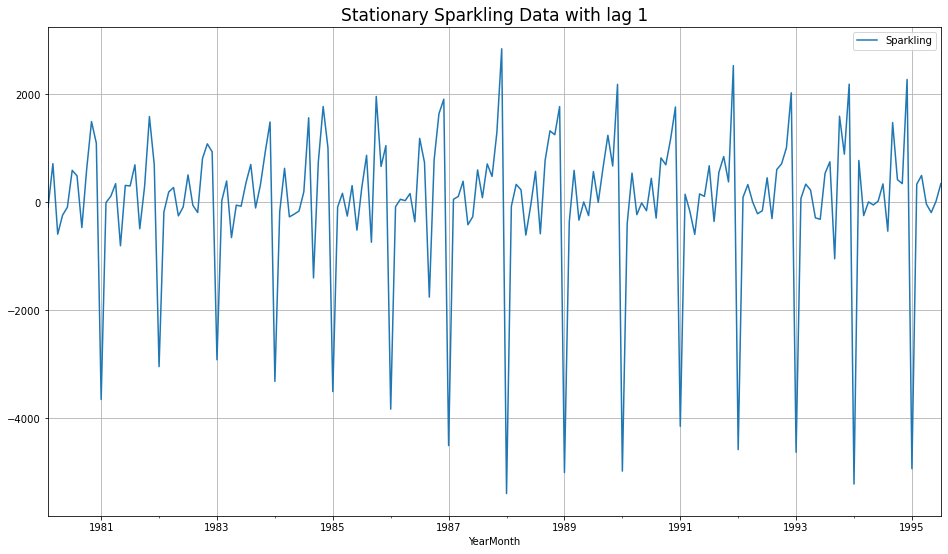

In [211]:
dfs.diff().dropna().plot(grid=True);
plt.title('Stationary Sparkling Data with lag 1', fontsize=17);
plt.savefig('spark_stationary.jpg', bbox_inches='tight');


## ARIMA / SARIMA on ROSE

### Check for Stationarity of Rose Train Data

Let us plot the training data once.

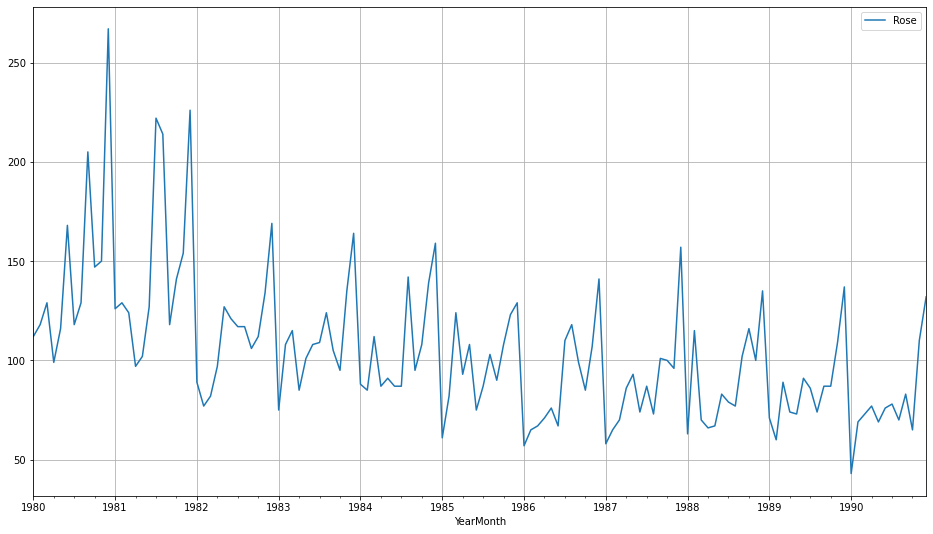

In [212]:
rtrain.plot(grid=True);

In [213]:
dftest = adfuller(rtrain,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.686
DF test p-value is 0.7569093051047044
Number of lags used 13


The training data is non-stationary at 95% confidence level. Let us take a first level of differencing to stationarize the Time Series.

In [214]:
dftest = adfuller(rtrain.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -6.804
DF test p-value is 3.894831356782348e-08
Number of lags used 12


p-value < 0.05 ------> So at 95% Confidence Interval. Train Rose data is Stationary with lag 1
Now, let us go ahead and plot the differenced training data.

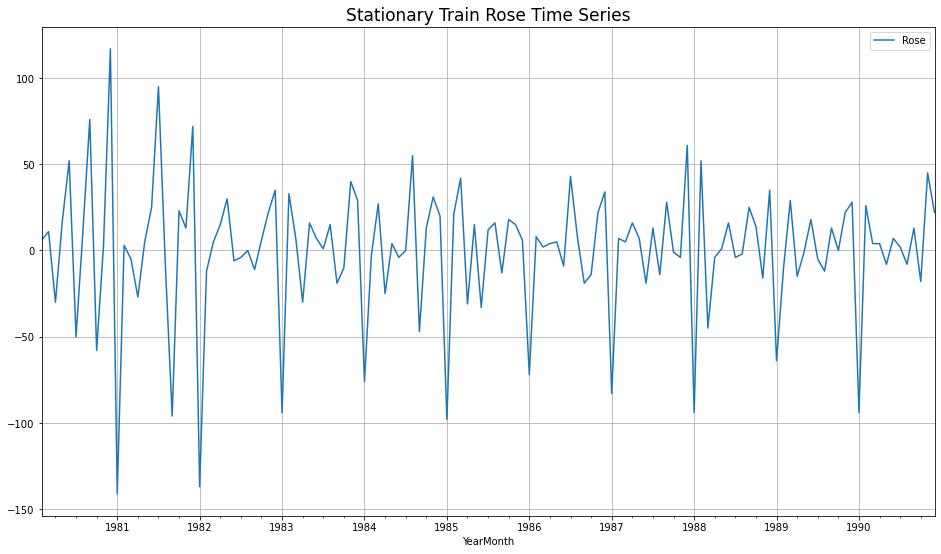

In [215]:
rtrain.diff().dropna().plot(grid=True);
plt.title('Stationary Train Rose Time Series', fontsize=17)
plt.savefig('rose_train_stationary.jpg', bbox_inches='tight');

In [216]:
rtrain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

##### Note: The data has some seasonality so ideally we should build a SARIMA model. But lets test on the lowest Akaike Information Criteria, which one suits best - ARIMA or SARIMA

In [217]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## As seen before, Stationarity is achived with a difference of 1.
## We have kept the value of d as 1

import itertools

p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))

print('Examples of the parameter combinations for the Model')

for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [218]:
# Creating an empty Dataframe with column names only
ROSE_ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ROSE_ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [219]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(rtrain['Rose'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ROSE_ARIMA_AIC = ROSE_ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748299
ARIMA(0, 1, 2) - AIC:1279.6715288535765
ARIMA(0, 1, 3) - AIC:1280.5453761734648
ARIMA(1, 1, 0) - AIC:1317.3503105381506
ARIMA(1, 1, 1) - AIC:1280.5742295380073
ARIMA(1, 1, 2) - AIC:1279.8707234231906
ARIMA(1, 1, 3) - AIC:1281.8707223309957
ARIMA(2, 1, 0) - AIC:1298.6110341604915
ARIMA(2, 1, 1) - AIC:1281.5078621868545
ARIMA(2, 1, 2) - AIC:1281.8707222264388


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 1, 3) - AIC:1274.695640455967
ARIMA(3, 1, 0) - AIC:1297.481091727168
ARIMA(3, 1, 1) - AIC:1282.419277627197
ARIMA(3, 1, 2) - AIC:1283.7207405977147
ARIMA(3, 1, 3) - AIC:1278.6694546123006


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [220]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ROSE_ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
11  (2, 1, 3)  1274.695640
15  (3, 1, 3)  1278.669455
2   (0, 1, 2)  1279.671529
6   (1, 1, 2)  1279.870723
3   (0, 1, 3)  1280.545376

In [221]:
auto_ARIMA = ARIMA(rtrain, order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sat, 10 Dec 2022   AIC                           1274.696
Time:                        16:40:16   BIC                           1291.947
Sample:                    01-01-1980   HQIC                          1281.706
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6778      0.084    -20.039      0.000      -1.842      -1.514
ar.L2         -0.7286      0.084     -8.703      0.000      -0.893      -0.565
ma.L1          1.0443      0.610      1.711      0.0

### Rose Train Diagnostics plot.

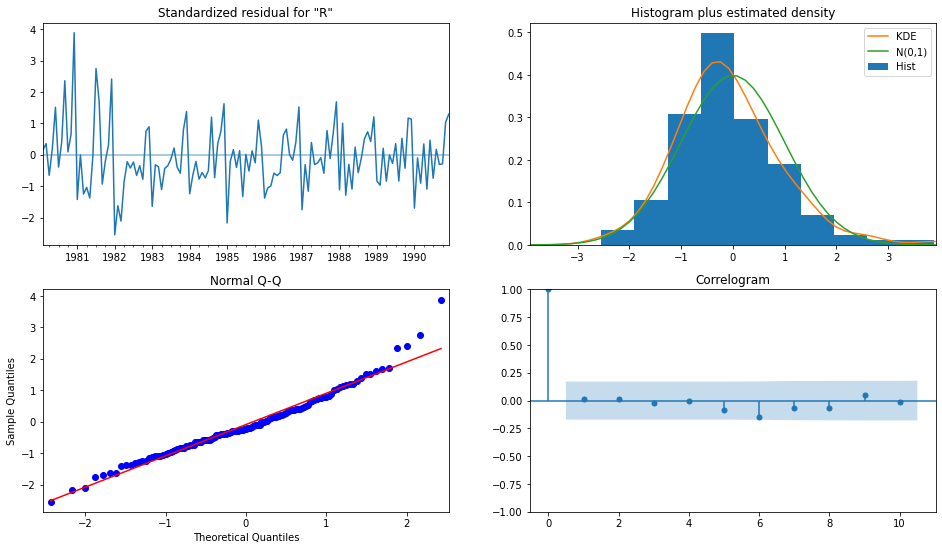

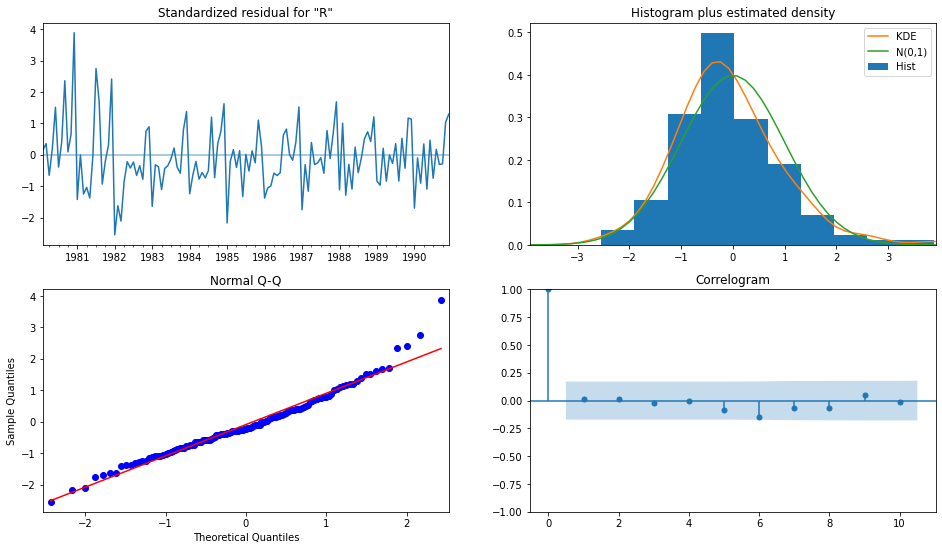

In [222]:

results_auto_ARIMA.plot_diagnostics();

plt.savefig('rose_diag_plot.jpg', bbox_inches='tight')

## Predict on the Rose Test Set using this model and evaluate the model.

In [223]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(rtest))
predicted_auto_ARIMA

1991-01-01    85.610747
1991-02-01    90.520409
1991-03-01    81.965710
1991-04-01    92.741438
1991-05-01    80.895056
1991-06-01    92.919540
1991-07-01    81.376306
1991-08-01    91.982347
1991-09-01    82.598070
1991-10-01    90.615332
1991-11-01    84.001450
1991-12-01    89.256768
1992-01-01    85.258328
1992-02-01    88.137845
1992-03-01    86.219881
1992-04-01    87.339810
1992-05-01    86.858227
1992-06-01    86.850248
1992-07-01    87.214511
1992-08-01    86.609174
1992-09-01    87.359395
1992-10-01    86.541735
1992-11-01    87.366981
1992-12-01    86.578142
1993-01-01    87.300372
1993-02-01    86.663372
1993-03-01    87.205905
1993-04-01    86.759768
1993-05-01    87.113002
1993-06-01    86.845405
1993-07-01    87.037011
1993-08-01    86.910508
1993-09-01    86.983149
1993-10-01    86.953441
1993-11-01    86.950359
1993-12-01    86.977176
1994-01-01    86.934429
1994-02-01    86.986610
1994-03-01    86.930207
1994-04-01    86.986820
1994-05-01    86.932930
1994-06-01    86

In [224]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [225]:
rmse = mean_squared_error(rtest['Rose'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.80843900573034 
MAPE: 75.82936615569392


In [226]:
resultsR0 = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['ARIMA(2,1,3)'])

resultsR0.to_csv('rose_arima_auto_213.csv')
resultsR0

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)       36.808439       75.829366

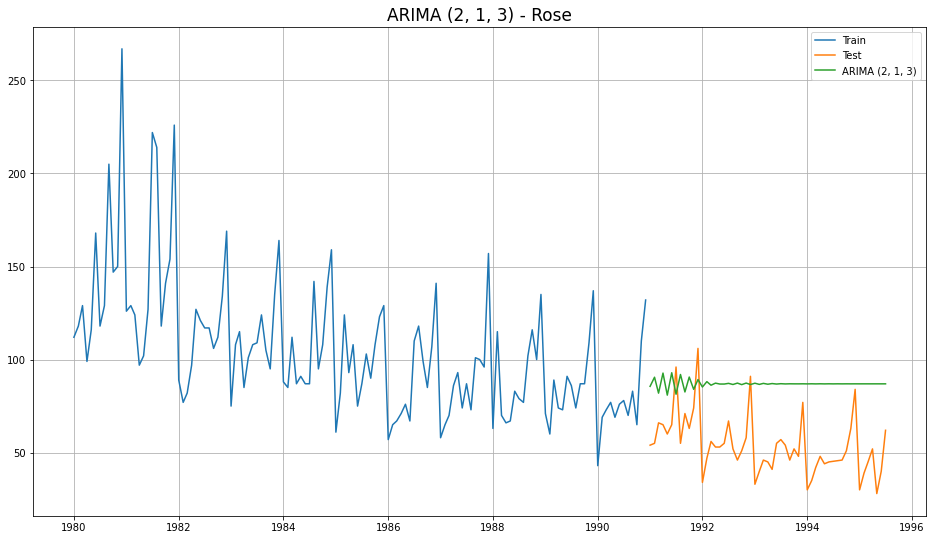

In [227]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')
plt.plot(predicted_auto_ARIMA,label='ARIMA (2, 1, 3)')


plt.legend(loc='best')
plt.grid()
plt.title('ARIMA (2, 1, 3) - Rose', fontsize=17);

plt.savefig('rose_arima_auto_213.jpg', bbox_inches='tight');

## Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots on ROSE dataset

Let us look at the ACF and the PACF plots once more.

In [228]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

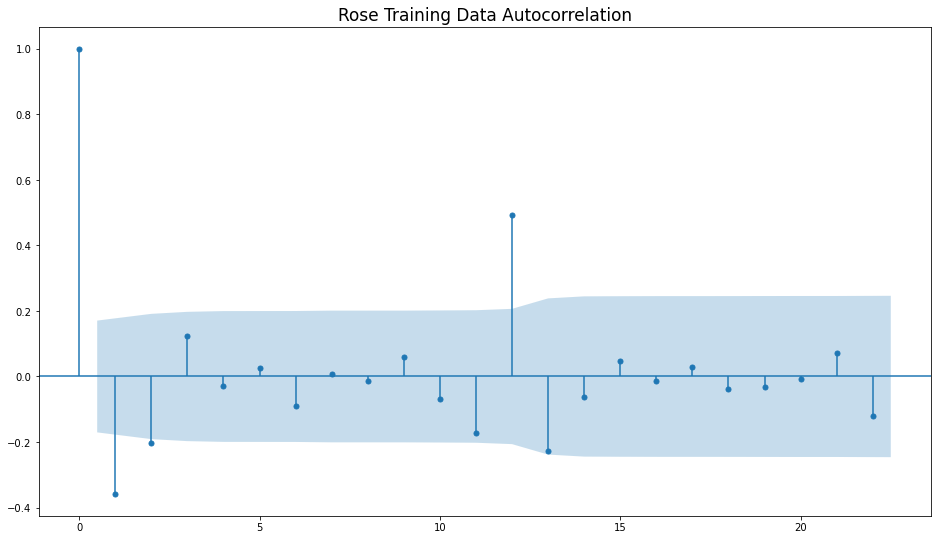

In [229]:
plot_acf(rtrain.diff(), missing='drop', alpha=0.05)
plt.title('Rose Training Data Autocorrelation',fontsize=17)
plt.savefig('rose_train_acf.jpg', bbox_inches='tight');


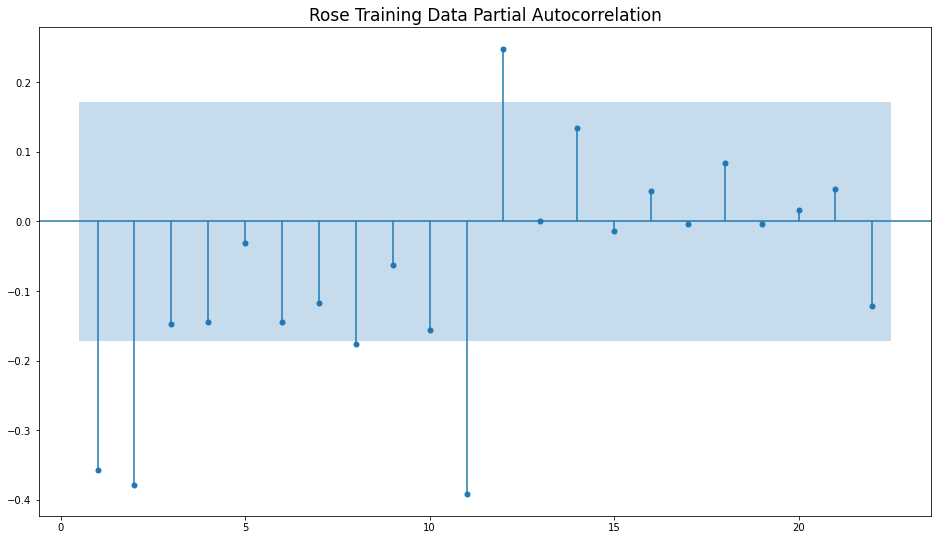

In [230]:
plot_pacf(rtrain.diff().dropna(), zero=False, alpha=0.05, method='ywmle')
plt.title('Rose Training Data Partial Autocorrelation',fontsize=17)
plt.savefig('rose_train_pacf.jpg', bbox_inches='tight');



Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off

By looking at the above plots, we will take the value of p and q to be 2 and 2 respectively.

In [231]:
manual_ARIMA = ARIMA(rtrain['Rose'], order=(2,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sat, 10 Dec 2022   AIC                           1281.871
Time:                        16:40:18   BIC                           1296.247
Sample:                    01-01-1980   HQIC                          1287.712
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Let us analyse the residuals from the various diagnostics plot.

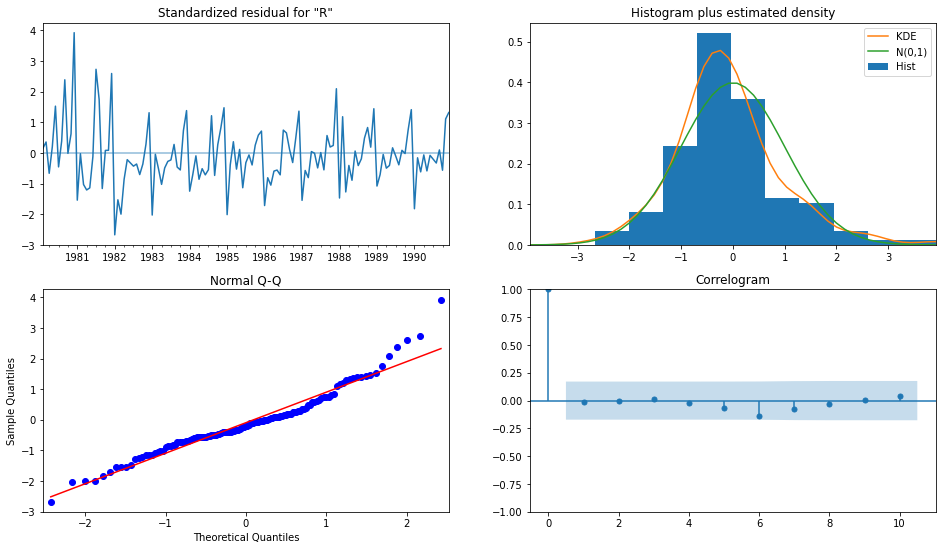

In [232]:
results_manual_ARIMA.plot_diagnostics();
plt.savefig('rose_train_manual_diag_plot.jpg', bbox_inches='tight');

## Predict on the Test Set using this model and evaluate the model.

In [233]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(rtest))

In [234]:
rmse = mean_squared_error(rtest['Rose'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.87119661963066 
MAPE: 76.05621271774324


In [235]:
temp_resultsR2 = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['ARIMA(2,1,2)'])


resultsR2 = pd.concat([resultsR0,temp_resultsR2])

resultsR2

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)       36.808439       75.829366
ARIMA(2,1,2)       36.871197       76.056213

In [236]:
resultsR0 = resultsR2.copy()
resultsR0

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)       36.808439       75.829366
ARIMA(2,1,2)       36.871197       76.056213

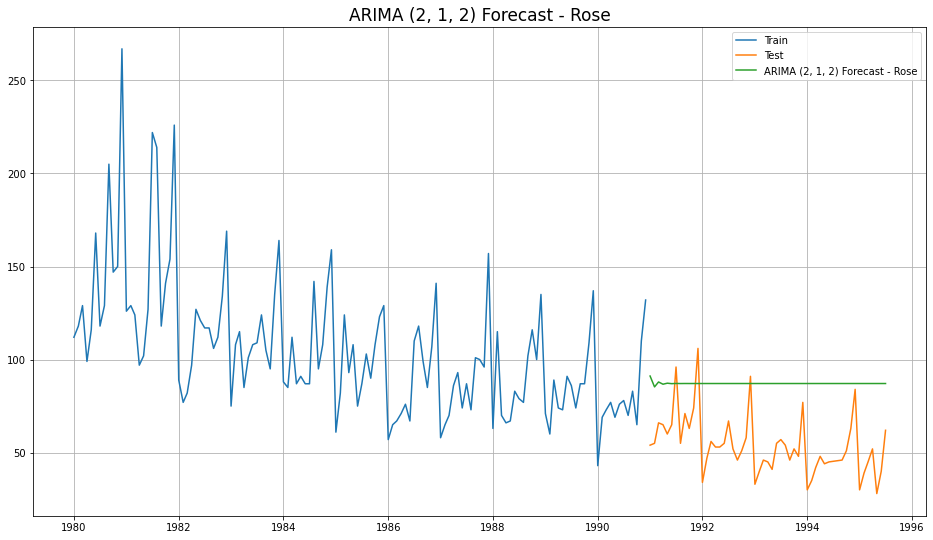

In [237]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(predicted_manual_ARIMA, label = 'ARIMA (2, 1, 2) Forecast - Rose')
plt.grid()
plt.legend(loc='best')
plt.title('ARIMA (2, 1, 2) Forecast - Rose', fontsize=17)
plt.savefig('rose_arima_manual_forecast.jpg', bbox_inches='tight');

## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC) - ROSE DATA

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

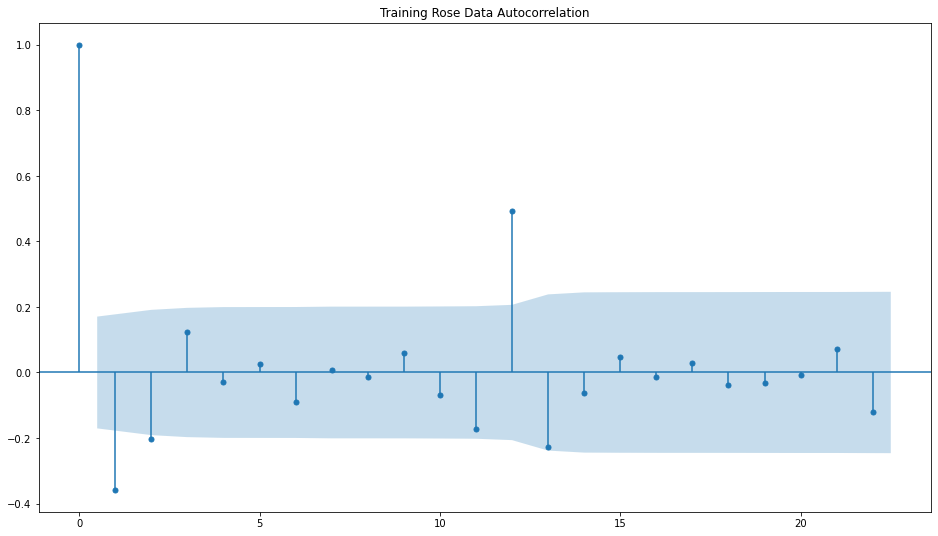

In [238]:
plot_acf(rtrain.diff(),title='Training Rose Data Autocorrelation',missing='drop');

We can see that there is a seasonality.

In [239]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [240]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])

In [241]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(rtrain['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207327
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380897


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:4554.803174642378
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869385233
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.691363574991


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:4492.421194122018
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697559
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945706
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3737.353019863872
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:850.7535403931051
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:851.7482702662772
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:850.530413612876


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3822.054849889755
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.555482591834
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.631404938381


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:3896.0028755316857
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918323
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330947217
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.857348331244


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3724.74265666271
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535802
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461661
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.198825703059


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3647.8397620663554
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:798.5889764836608
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:800.4844940777576
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:801.0595269409403


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:3705.8231711023127
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1251.6675430541036
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1083.4866975264933
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:913.49384866177


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:2794.9915196118236
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1088.833284341372
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1045.540093354387
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.8310913620858


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:2516.504030269813
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:913.0105912257982
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:914.1707545046296
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:887.9375085679101


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:2303.6762840056317
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:800.1020189375198
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:801.9941080535249
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:802.5206528347776


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:2691.8611435429275
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:1243.9501216739163
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1076.7632646078935
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:905.6926533380508


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:3549.4990270613043
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1089.2051361212214
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1034.8411212936487
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:896.8362523341146


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:3687.4391526679483
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:914.9477108987107
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:916.0630996878633
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:880.5509788252971


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:3645.059013886134
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:802.0987124777164
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:803.9928772315591
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:804.5150720356759


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:3690.4105454296714
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1308.161871082466
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1135.2955447585691
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:963.940539125769


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:3729.518497325358
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1124.8860786804516
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1105.4080055025381
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:958.5001972948323


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3559.552755570393
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:939.0984778663867
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:940.9087133661064
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:942.2973103070968


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3473.4339730132933
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:819.3931032272544
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:821.1501371573611
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:819.1305087585039


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3541.0624065552615
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1262.1840064255514
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1094.317270864084
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:923.0862224063877
SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:4001.5901987384746
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1083.3937965030357
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1054.7180547133507
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:916.3549428502025
SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:3830.3459361561813
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:905.9249060843985
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:907.297286747063
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:900.6725795936878
SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:3753.515890253517
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:789.236043938706
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:790.9603447813098
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:790.8113850241488
SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3811.411738497994
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:1251.9495040706142
SARIMA(1, 1, 2)x(0, 0, 

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:3887.1590277371615
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1090.7760923533401
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1042.618321197108
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:906.7318544318841


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:3716.501104080354
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:906.1690196574652
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:907.4597827916626


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:896.6869037633111


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:3627.615365974331
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:791.0073801467914
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:792.6312809426252
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:792.1390254202572
SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3772.62236493029
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:1245.5463125316496
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1072.9849785142428
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:907.4130105124952


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:2801.7147075264047
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1082.3281487675997
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1036.1950930059413
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:897.5232315447164


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:3623.7763636858217
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:908.268762151042
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:909.7955659029896
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:880.288660559725


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:3343.450418870877
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:792.9903134382661
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:794.631014280825
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:794.0467947715916


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:3618.7481111052393
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:1280.253756153577
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1128.7773704711421
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:958.0793208829948
SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:4044.4890180797393
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1099.5086021575921
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1076.7863198641076
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:951.1988165559391


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:3868.0781555093677
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:924.6004792645457
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:925.9757801384345
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:927.8380693280801
SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:3348.857002351274
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:806.053640740879
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:808.0472637903534
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:806.4988191370683


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:4057.7363155205207
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:1263.2315231797488
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1094.2093491949406
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:922.9408472103632


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:3722.033763402304
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1071.4249601101506
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1052.924447120571
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:916.2424912822589


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3587.513367351252
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:896.5181608200369
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:897.6399565369722
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:899.483586628414


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3466.811703141938
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:785.393260025634
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:787.363925909047
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:787.0598887571025
SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3804.6273089555957
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1253.9102116146714
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1085.9643552598209
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:916.3258311115292


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3367.2804581896653
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1073.2912713703402
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1044.1909354048316
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:907.666148880726


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:3476.011121089584
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:897.3464440569138
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:898.3781889041904
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:890.6687982883475


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:3357.6589888333165
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:785.1199712724383
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:786.9410035612167
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:786.9640511750588


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3361.4077551134656
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:1237.8702846886547
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1067.8073334083185
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:908.3349281045749


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:3909.2397878933616


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1073.256342334195
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1024.0461970668875
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:890.9483352609737


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:3757.2737477299784
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:893.3579301558339
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:903.2328065413102
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:879.2191798610639


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3696.341140156517
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:782.4074208215679
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:783.410147345765
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:781.0452481304211


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3710.7434651538056
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:1269.8130062641505
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1119.1703158042212
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:953.3440589118002
SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:4046.4890180797365
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1080.5468456726344
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1065.5569726782837
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:943.6865996304896
SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:3873.3819139479647
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:909.7203197901578
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:911.06207139765
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:913.0438816472879
SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3795.704232904611
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:796.0564701526994
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:795.5410167661112
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:794.66770171899


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3682.184858075997
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:1255.0658180709347
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1095.689464120768
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:923.8872427547354


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:3724.033763404098
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1064.6149136512977
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1046.083755527779
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:917.0308009384285


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:3588.85769652699
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:887.3204459898942
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:888.3279208537957
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:890.1571523411263


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:3510.744081831221
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:775.4266990213004
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:775.4953300785121
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:774.4002854843434


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:3925.726160940241
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:1255.9835656444661
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1086.7092401264724
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:917.7980110840494


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:3948.035322483312
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1066.27762113927
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1046.1260517092558
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:909.2875090259287


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:3855.3250486831903
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:889.3184619240349
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:890.3277441306149
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:896.1430951308394


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:3883.7701467505317
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:777.2505639211682
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:776.3462133408154
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:774.8809359248417


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:3846.4348540985347
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:1243.7385974270233
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1060.539764852384
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:910.3340151665319


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:3589.597403635808
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1066.8458922549178
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1039.7662380426978
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:900.0483661085337


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:3335.5253577267854
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:884.046371179491
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:885.9217119988809
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:880.5595714953658


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:3437.9158538761267
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:775.5610184603156
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:776.3690402982784
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:778.2316170991977


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:2547.321254008339


In [242]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
222  (3, 1, 1)  (3, 0, 2, 12)  774.400285
238  (3, 1, 2)  (3, 0, 2, 12)  774.880936
220  (3, 1, 1)  (3, 0, 0, 12)  775.426699
221  (3, 1, 1)  (3, 0, 1, 12)  775.495330
252  (3, 1, 3)  (3, 0, 0, 12)  775.561018

In [243]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                        SARIMAX Results                                        
Dep. Variable:                                    Rose   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -377.200
Date:                                 Sat, 10 Dec 2022   AIC                            774.400
Time:                                         16:47:55   BIC                            799.618
Sample:                                     01-01-1980   HQIC                           784.578
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0464      0.126      0.367      0.714      -0.202       0

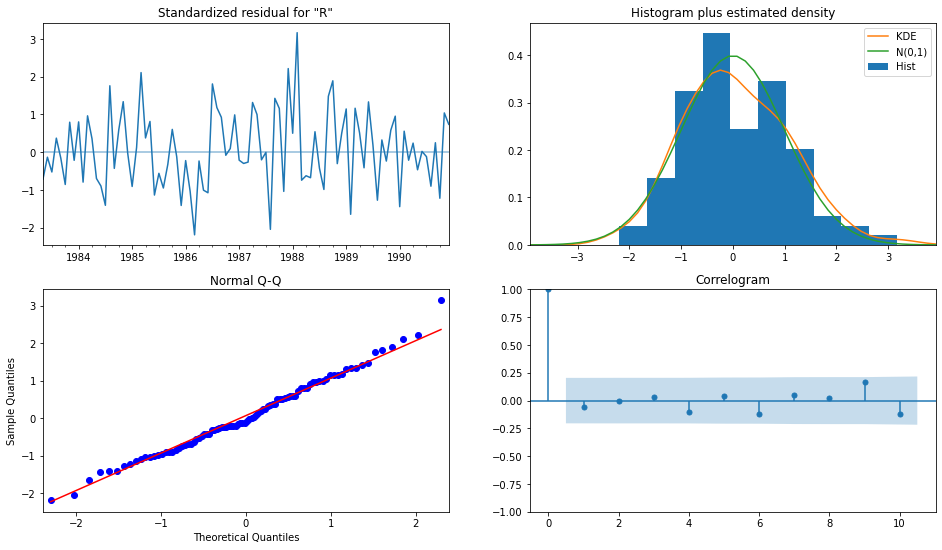

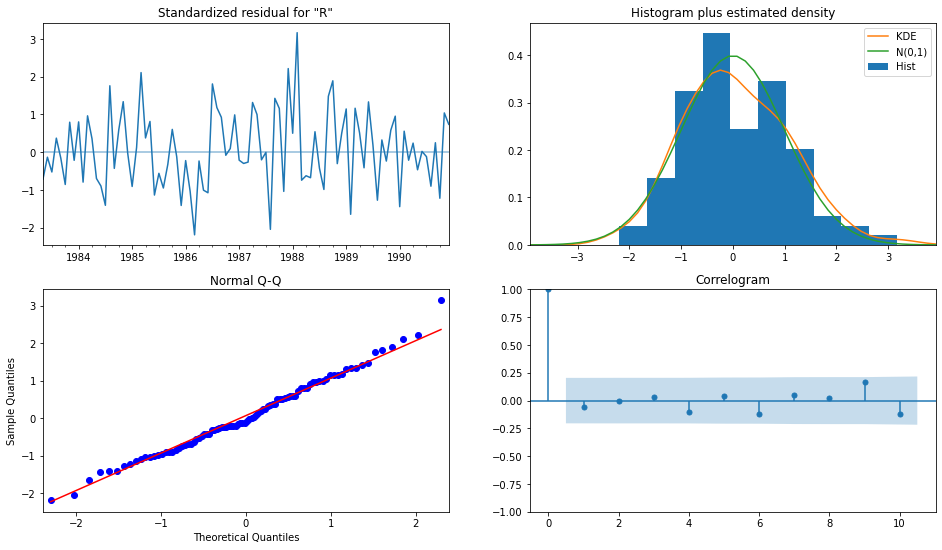

In [244]:
results_auto_SARIMA.plot_diagnostics();
plt.savefig('rose_sarima_auto_30212_diag_plot.jpg', bbox_inches='tight')

## Predict on the Test Set using this model and evaluate the model.

In [245]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(rtest))
predicted_auto_SARIMA1= results_auto_SARIMA.get_prediction(start=pd.to_datetime('1991-01-01'), dynamic=False)

In [246]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  55.235808  13.907588      27.977436      82.494181
1991-02-01  68.122740  13.991028      40.700829      95.544651
1991-03-01  67.908798  14.012080      40.445626      95.371969
1991-04-01  66.786281  14.099400      39.151964      94.420597
1991-05-01  69.760383  14.108760      42.107721      97.413045

In [247]:
predicted_auto_SARIMA1

In [248]:
rmse = mean_squared_error(rtest['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 18.88206678102619 
MAPE: 36.375881373129396


In [249]:
temp_resultsDf = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['SARIMA(3, 1, 1)(3, 0, 2, 12)'])


resultsDf = pd.concat([resultsR0,temp_resultsDf])

resultsDf

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)                       36.808439       75.829366
ARIMA(2,1,2)                       36.871197       76.056213
SARIMA(3, 1, 1)(3, 0, 2, 12)       18.882067       36.375881

In [250]:
resultsR0 = resultsDf.copy()
resultsR0.to_csv('rose_auto_sarima.csv')
resultsR0

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)                       36.808439       75.829366
ARIMA(2,1,2)                       36.871197       76.056213
SARIMA(3, 1, 1)(3, 0, 2, 12)       18.882067       36.375881

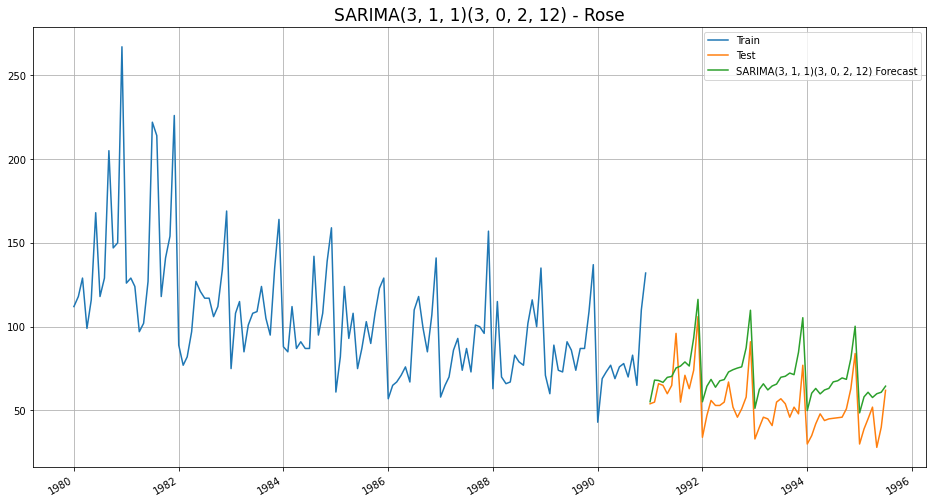

In [251]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')
# plt.plot(predicted_auto_SARIMA,label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
# predicted_auto_SARIMA.plot(label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
predicted_auto_SARIMA.predicted_mean.plot(label='SARIMA(3, 1, 1)(3, 0, 2, 12) Forecast')


plt.legend(loc='best')
plt.grid()
plt.title('SARIMA(3, 1, 1)(3, 0, 2, 12) - Rose', fontsize=17);

plt.savefig('rose_sarima_auto_30212.jpg', bbox_inches='tight');

## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12

Let us look at the ACF and the PACF plots once more.

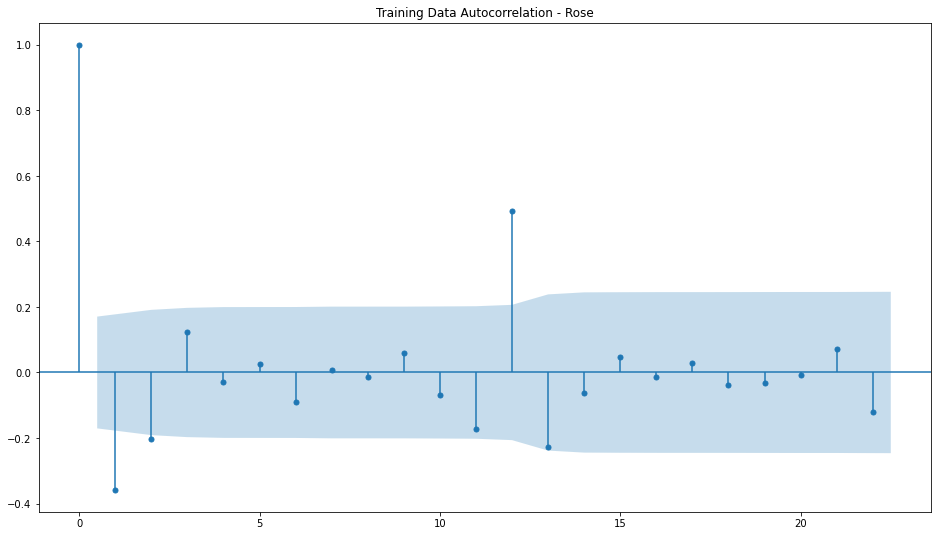

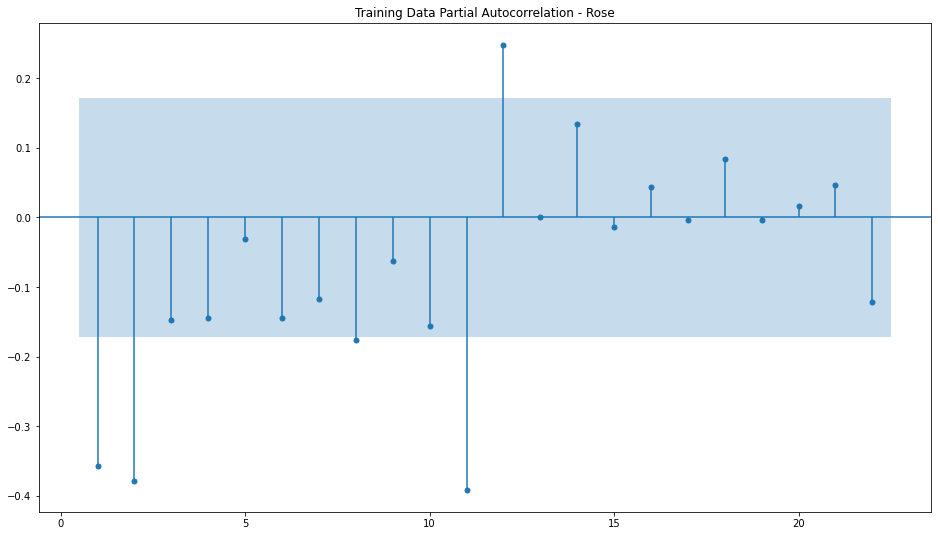

In [252]:
plot_acf(rtrain.diff(),title='Training Data Autocorrelation - Rose',missing='drop')
plot_pacf(rtrain.diff().dropna(),title='Training Data Partial Autocorrelation - Rose',zero=False,method='ywmle');

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 12
We are taking the p value to be 2 and the q value also to be 2 as the parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 3.



In [253]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -379.498
Date:                            Sat, 10 Dec 2022   AIC                            776.996
Time:                                    16:48:09   BIC                            799.692
Sample:                                01-01-1980   HQIC                           786.156
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8550      0.146     -5.838      0.000      -1.142      -0.568
ar.L2         -0.0021      0.125   

In [254]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(2,1,2),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA1 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA1.summary())

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(3, 1, 2, 12)   Log Likelihood                -334.893
Date:                            Sat, 10 Dec 2022   AIC                            689.786
Time:                                    16:48:21   BIC                            713.730
Sample:                                01-01-1980   HQIC                           699.392
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7093      0.404      1.758      0.079      -0.082       1.500
ar.L2         -0.1500      0.176   

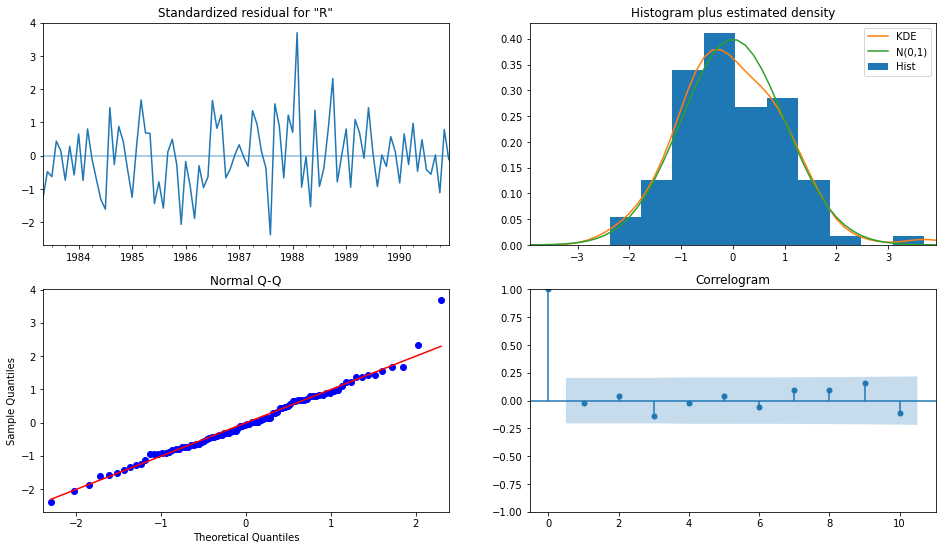

In [255]:
results_manual_SARIMA.plot_diagnostics()
plt.savefig('rose_sarima_21212.jpg', bbox_inches='tight');

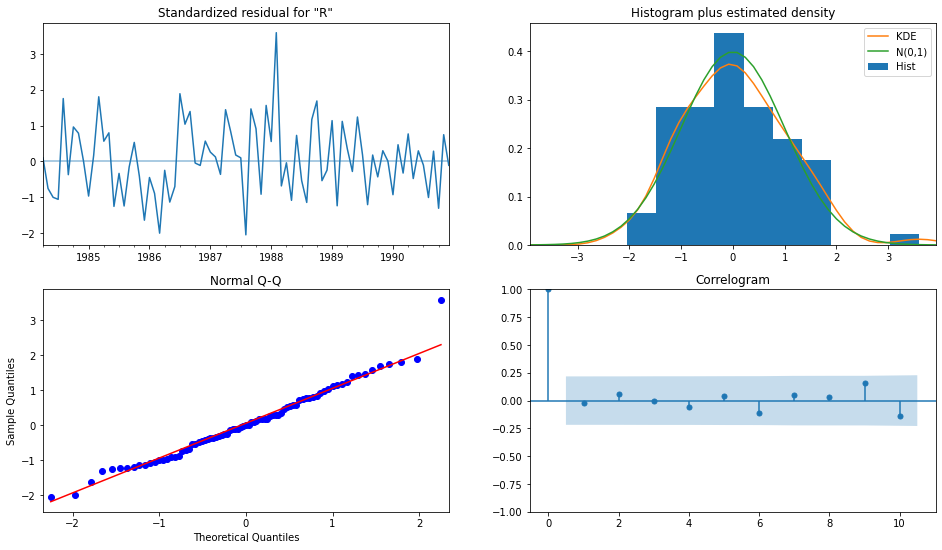

In [256]:
results_manual_SARIMA1.plot_diagnostics()
plt.savefig('rose_sarima_31212.jpg', bbox_inches='tight');

## Predict on the Test Set using this model and evaluate the model.

In [257]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(rtest))
                                                             
predicted_manual_SARIMA1 = results_manual_SARIMA1.get_forecast(steps=len(rtest))

In [258]:
rmse = mean_squared_error(rtest['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 16.550558576093284 
MAPE: 25.476430823462838


In [259]:
rmse = mean_squared_error(rtest['Rose'],predicted_manual_SARIMA1.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_manual_SARIMA1.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 15.359183054041774 
MAPE: 22.960804093067413


In [260]:
temp_resultsDf = pd.DataFrame({'Test RMSE Rose': [rmse],'Test MAPE Rose':mape}
                           ,index=['SARIMA(2,1,2)(3,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)                       36.808439       75.829366
ARIMA(2,1,2)                       36.871197       76.056213
SARIMA(3, 1, 1)(3, 0, 2, 12)       18.882067       36.375881
SARIMA(2,1,2)(3,1,2,12)            15.359183       22.960804

In [261]:
resultsR0 = resultsDf.copy()

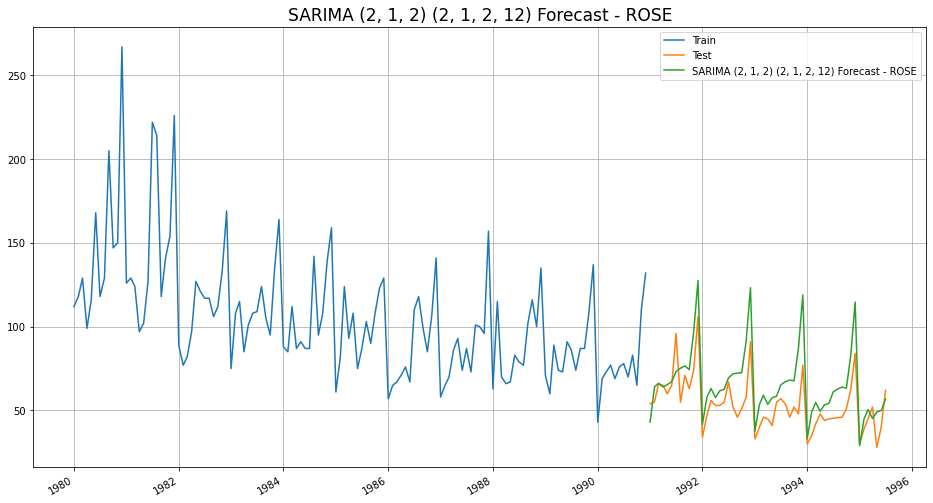

In [262]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label ='Test')

predicted_manual_SARIMA.predicted_mean.plot(label = 'SARIMA (2, 1, 2) (2, 1, 2, 12) Forecast - ROSE')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (2, 1, 2) (2, 1, 2, 12) Forecast - ROSE', fontsize=17)
plt.savefig('rose_sarima_manual_forecast.jpg', bbox_inches='tight');

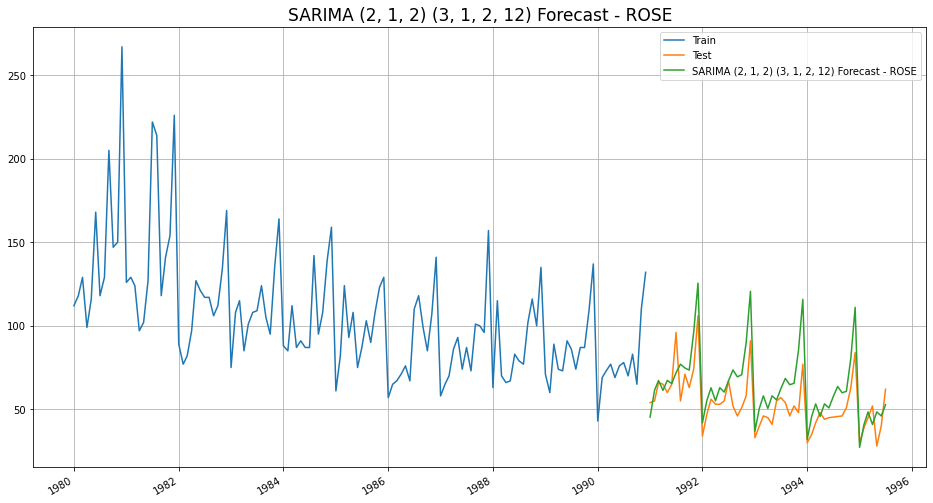

In [263]:
plt.plot(rtrain, label='Train')
plt.plot(rtest, label ='Test')

predicted_manual_SARIMA1.predicted_mean.plot(label = 'SARIMA (2, 1, 2) (3, 1, 2, 12) Forecast - ROSE')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (2, 1, 2) (3, 1, 2, 12) Forecast - ROSE', fontsize=17)
plt.savefig('rose_sarima_manual_forecast1.jpg', bbox_inches='tight');

## Building the most optimum model on the Full Data.

Here, we have a scenario where our training data was stationary but our full data was not stationary. So, we will use the same parameters as our training data but with adding a level of differencing which is needed for the data to be stationary.

In [264]:
full_data_model = sm.tsa.statespace.SARIMAX(dfr['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -587.531
Date:                            Sat, 10 Dec 2022   AIC                           1193.062
Time:                                    16:48:35   BIC                           1219.976
Sample:                                01-01-1980   HQIC                          1203.997
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8649      0.101     -8.556      0.000      -1.063      -0.667
ar.L2          0.0340      0.091   

## Evaluate the model on the whole data and predict 12 months into the future

In [265]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [266]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  43.083388  12.674039      18.242728      67.924047
1995-09-01  43.341439  12.959792      17.940713      68.742164
1995-10-01  45.826992  12.963786      20.418438      71.235546
1995-11-01  57.397605  13.124495      31.674069      83.121142
1995-12-01  85.075209  13.133321      59.334373     110.816045

In [267]:
rmse = mean_squared_error(dfr['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 35.91088999449239


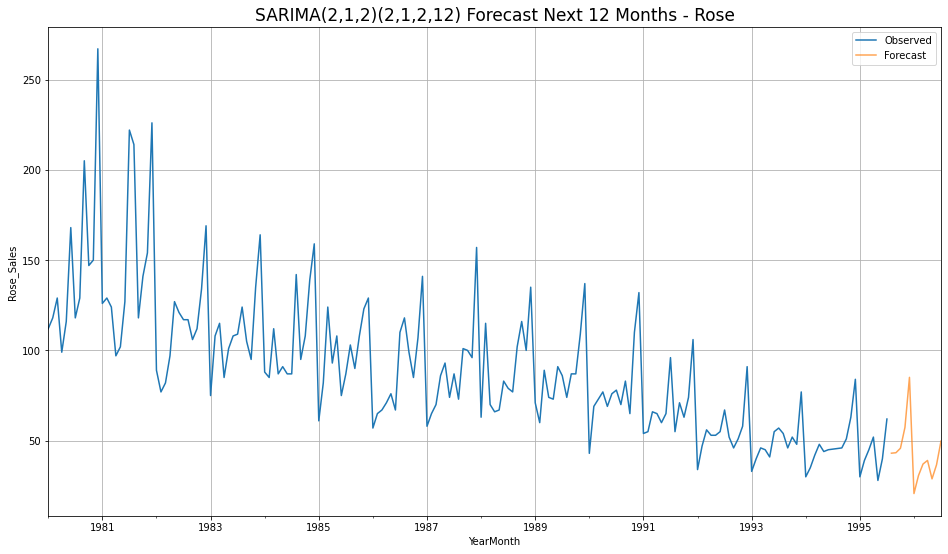

In [268]:
axis = dfr['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('YearMonth')
axis.set_ylabel('Rose_Sales')
plt.legend(loc='best')
plt.grid();
plt.title('SARIMA(2,1,2)(2,1,2,12) Forecast Next 12 Months - Rose', fontsize=17);
plt.savefig('rose_forecast.jpg', bbox_inches='tight');

In [269]:
resultsDf

Test RMSE Rose  Test MAPE Rose
ARIMA(2,1,3)                       36.808439       75.829366
ARIMA(2,1,2)                       36.871197       76.056213
SARIMA(3, 1, 1)(3, 0, 2, 12)       18.882067       36.375881
SARIMA(2,1,2)(3,1,2,12)            15.359183       22.960804

In [270]:
resultsR0 = resultsDf.copy()
resultsR0.to_csv('rose_all_arima.csv')

In [271]:
results_rose = pd.concat([resultsDf14, resultsR0], axis=0)
results_rose

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796241   
Double Exponential Smoothing                             15.268939   
Triple Exponential Smoothing (Additive Season)           14.280504   
Triple Exponential Smoothing (Multiplicative Se...       20.949676   
Triple Exponential Smoothing (Additive Season, ...       26.503714   
Triple Exponential Smoothing (Multiplicative Se...       25.826032   
ARIMA(2,1,3)                                             36.808439   
ARIMA(2,1,2)                                             36.871197   
SARIMA(3, 1, 1)(3, 0, 2, 12)                             18.882067   
SARIMA(2,1,2)(3,1,2,12)                                  15.359183   

                                                    Test RMSE Sparkling  \
RegressionOnTime                                            1389.135175   
NaiveModel                                                  3864.279352   
SimpleAverageModel                                          1275.081804   
2pointTrailingMovingAverage                                  813.400684   
4pointTrailingMovingAverage                                 1156.589694   
6pointTrailingMovingAverage                                 1283.927428   
9pointTrailingMovingAverage                                 1346.278315   
Simple Exponential Smoothing                                1338.004623   
Double Exponential Smoothing                                3949.931298   
Triple Exponential Smoothing (Additive Season)               378.944325   
Triple Exponential Smoothing (Multiplicative Se...           403.125867   
Triple Exponential Smoothing (Additive Season, ...           378.944325   
Triple Exponential Smoothing (Multiplicative Se...           352.464674   
ARIMA(2,1,3)                                                        NaN   
ARIMA(2,1,2)                                                        NaN   
SARIMA(3, 1, 1)(3, 0, 2, 12)                                        NaN   
SARIMA(2,1,2)(3,1,2,12)                                             NaN   

                                                    Test MAPE Rose  
RegressionOnTime                                               NaN  
NaiveModel                                                     NaN  
SimpleAverageModel                                             NaN  
2pointTrailingMovingAverage                                    NaN  
4pointTrailingMovingAverage                                    NaN  
6pointTrailingMovingAverage                                    NaN  
9pointTrailingMovingAverage                                    NaN  
Simple Exponential Smoothing                                   NaN  
Double Exponential Smoothing                                   NaN  
Triple Exponential Smoothing (Additive Season)                 NaN  
Triple Exponential Smoothing (Multiplicative Se...             NaN  
Triple Exponential Smoothing (Additive Season, ...             NaN  
Triple Exponential Smoothing (Multiplicative Se...             NaN  
ARIMA(2,1,3)                                             75.829366  
ARIMA(2,1,2)                                             76.056213  
SARIMA(3, 1, 1)(3, 0, 2, 12)                             36.375881  
SARIMA(2,1,2)(3,1,2,12)                                  22.960804

In [272]:
results_rose.sort_values(by=['Test RMSE Rose']).to_csv('results_rose.csv')

In [273]:
resultsDf.sort_values(by=['Test RMSE Rose'])

Test RMSE Rose  Test MAPE Rose
SARIMA(2,1,2)(3,1,2,12)            15.359183       22.960804
SARIMA(3, 1, 1)(3, 0, 2, 12)       18.882067       36.375881
ARIMA(2,1,3)                       36.808439       75.829366
ARIMA(2,1,2)                       36.871197       76.056213

# =================================================================

## ARIMA / SARIMA Modelling on SPARKLING dataset

### Check for stationarity of the Training Data - Sparkling

Let us plot the training data once.

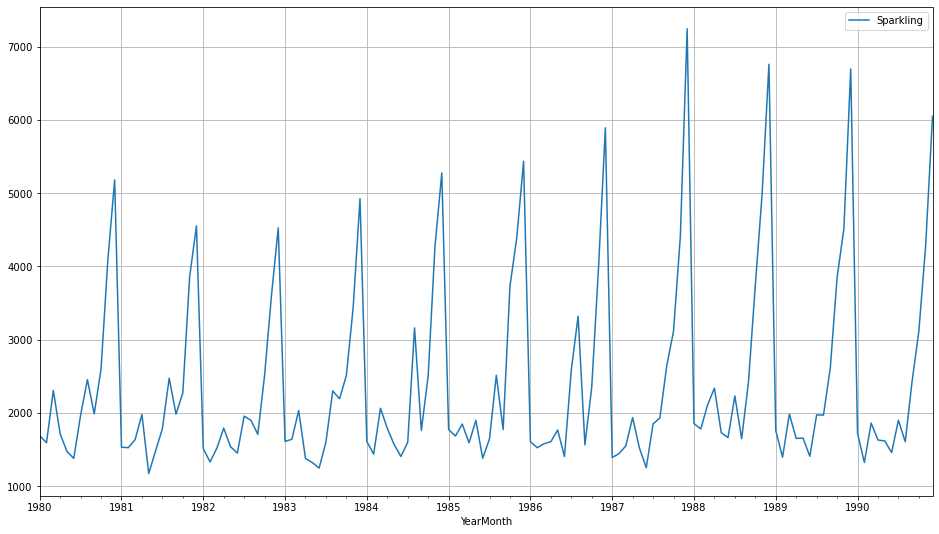

In [274]:
strain.plot(grid=True);

In [275]:
dftest = adfuller(strain,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.062
DF test p-value is 0.5674110388593693
Number of lags used 12


The training data is non-stationary at 95% confidence level. Let us take a first level of differencing to stationarize the Time Series.

In [276]:
dftest = adfuller(strain.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -7.968
DF test p-value is 8.479210655515968e-11
Number of lags used 11


Training data is now Stationary
Now, let us go ahead and plot the differenced training data.

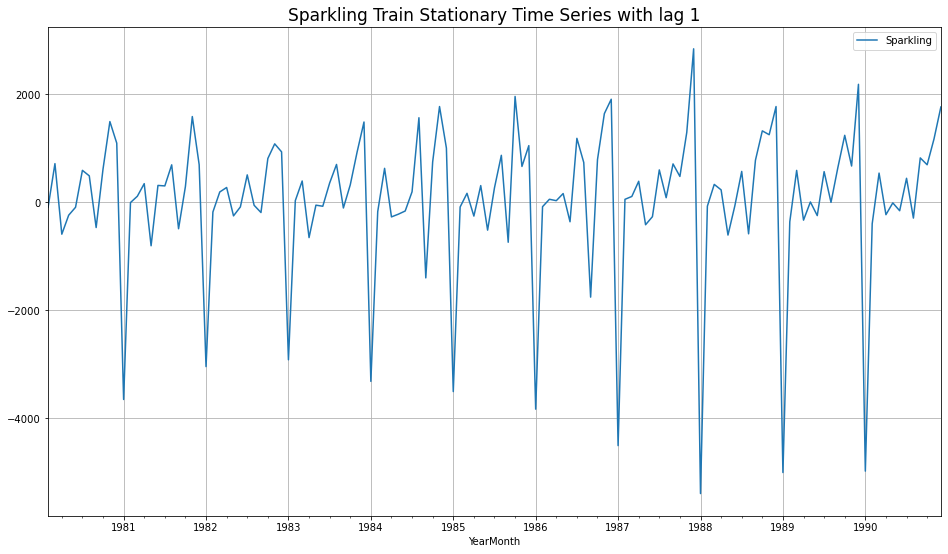

In [277]:
strain.diff().dropna().plot(grid=True);
plt.title('Sparkling Train Stationary Time Series with lag 1', fontsize=17);
plt.savefig('spark_train_stationary.jpg', bbox_inches='tight');

In [278]:
strain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC) - SPARKLING

##### Note: The data has some seasonality so ideally we should build a SARIMA model. But we'll check least AIC of ARIMA and then SARIMA

In [279]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [280]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [281]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(strain['Sparkling'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.0600155918632
ARIMA(0, 1, 2) - AIC:2234.4083231261075
ARIMA(0, 1, 3) - AIC:2233.9948577413234
ARIMA(1, 1, 0) - AIC:2266.6085393190097
ARIMA(1, 1, 1) - AIC:2235.7550946699257
ARIMA(1, 1, 2) - AIC:2234.527200452215


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 3) - AIC:2235.607809755081
ARIMA(2, 1, 0) - AIC:2260.36574396809
ARIMA(2, 1, 1) - AIC:2233.7776262083544
ARIMA(2, 1, 2) - AIC:2213.5092126923055
ARIMA(2, 1, 3) - AIC:2232.855899257009
ARIMA(3, 1, 0) - AIC:2257.72337899794


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 1) - AIC:2235.49902102709
ARIMA(3, 1, 2) - AIC:2230.7606253111467
ARIMA(3, 1, 3) - AIC:2221.458792062972


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [282]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
10  (2, 1, 2)  2213.509213
15  (3, 1, 3)  2221.458792
14  (3, 1, 2)  2230.760625
11  (2, 1, 3)  2232.855899
9   (2, 1, 1)  2233.777626

In [283]:
auto_ARIMA = ARIMA(strain, order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sat, 10 Dec 2022   AIC                           2213.509
Time:                        16:48:37   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.780      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.217      0.0

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


### Diagnostics plot - Sparkling

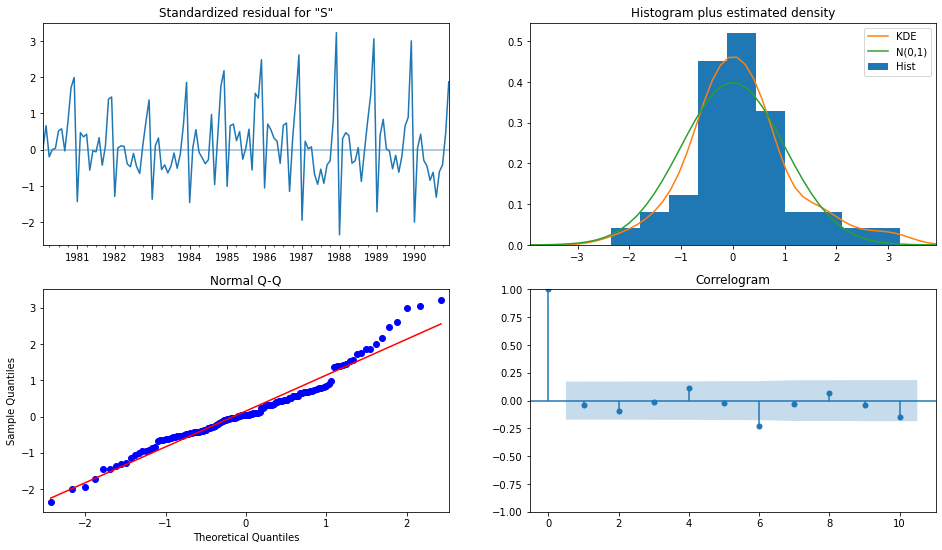

In [284]:
results_auto_ARIMA.plot_diagnostics();
plt.savefig('spark_arima_diag_plot.jpg', bbox_inches='tight');

## Predict on the Test Set using this model and evaluate the model.

In [285]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(stest))

In [286]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [287]:
rmse = mean_squared_error(stest['Sparkling'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1299.9802499817208 
MAPE: 47.09987977755451


In [288]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,2)'])

resultsDf.to_csv('spark_arima_auto_212.csv')
resultsDf

RMSE      MAPE
ARIMA(2,1,2)  1299.98025  47.09988

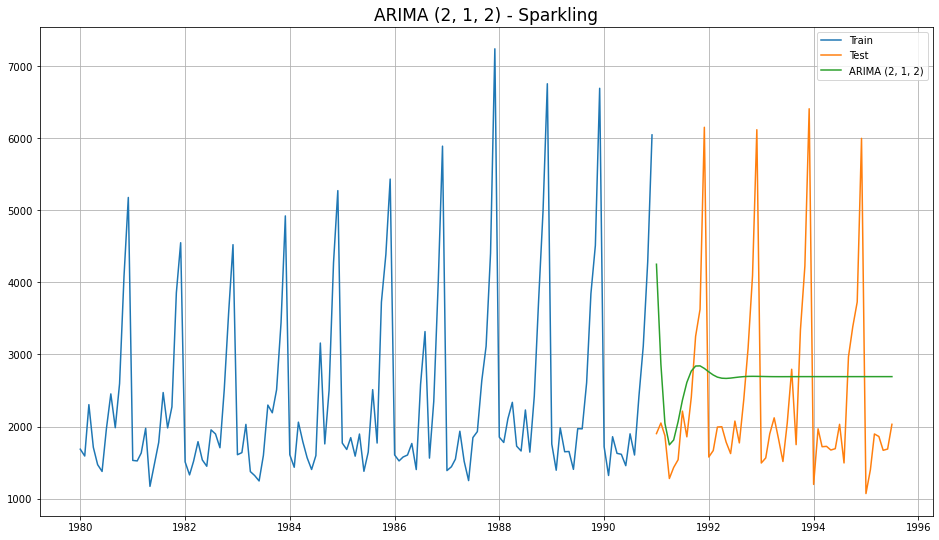

In [289]:
plt.plot(strain, label='Train')
plt.plot(stest, label='Test')
plt.plot(predicted_auto_ARIMA, label='ARIMA (2, 1, 2)')

plt.title('ARIMA (2, 1, 2) - Sparkling', fontsize=17)
plt.grid()
plt.legend(loc='best')

plt.savefig('spark_arima_auto_212.jpg', bbox_inches='tight');

## Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots - SPARKLING

Let us look at the ACF and the PACF plots once more.

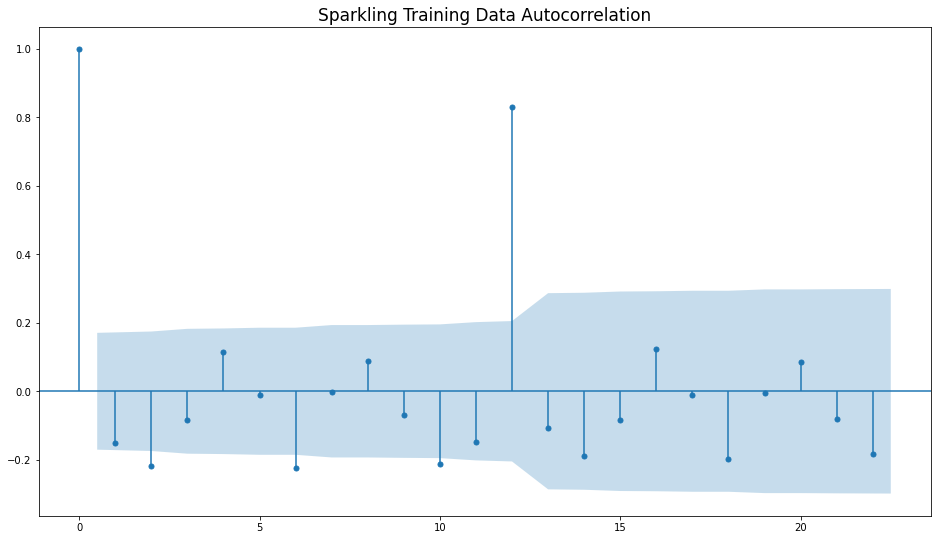

In [290]:
plot_acf(strain.diff(),missing='drop')
plt.title('Sparkling Training Data Autocorrelation', fontsize=17)
plt.savefig('spark_train_acf.jpg', bbox_inches='tight');



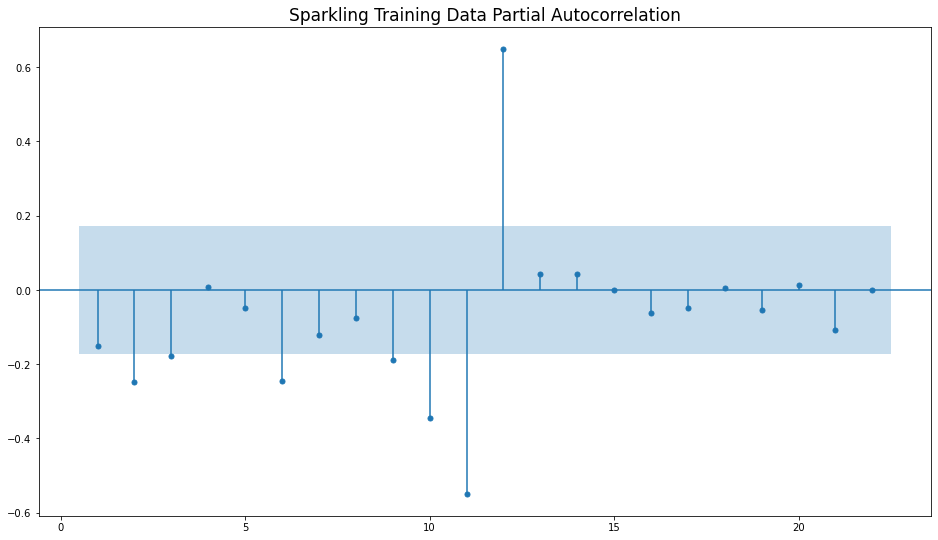

In [291]:
plot_pacf(strain.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.title('Sparkling Training Data Partial Autocorrelation', fontsize=17)
plt.savefig('spark_train_pacf.jpg', bbox_inches='tight');



By looking at the above plots, we will take the value of p and q to be 0 and 0 respectively.

In [292]:
manual_ARIMA = ARIMA(strain['Sparkling'], order=(0,1,0))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.832
Date:                Sat, 10 Dec 2022   AIC                           2267.663
Time:                        16:48:38   BIC                           2270.538
Sample:                    01-01-1980   HQIC                          2268.831
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.885e+06   1.29e+05     14.658      0.000    1.63e+06    2.14e+06
Ljung-Box (L1) (Q):                   3.07   Jarque-Bera (JB):               198.83
Prob(Q):                              0.08   Pr

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Let us analyse the residuals from the various diagnostics plot.

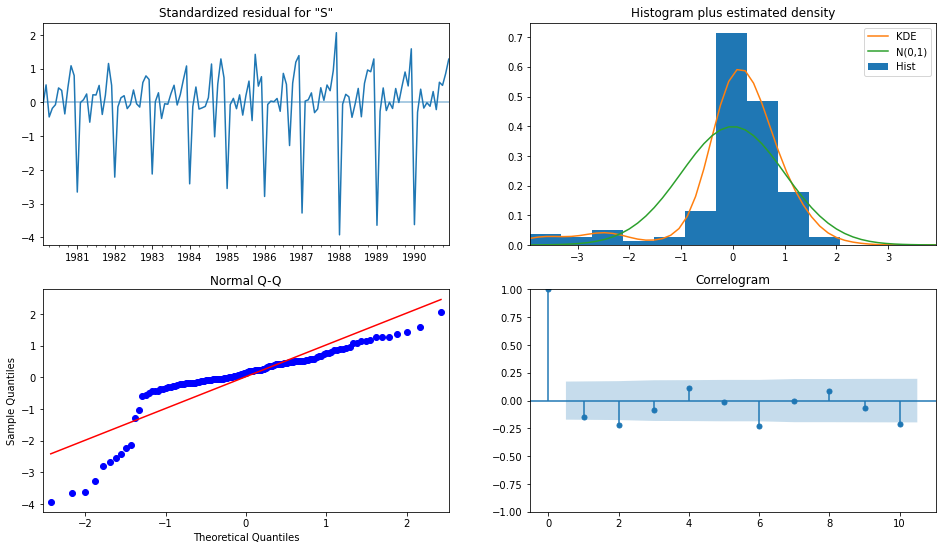

In [293]:
results_manual_ARIMA.plot_diagnostics();

plt.savefig('spark_train_diag_plot.jpg', bbox_inches='tight');

## Predict on the Test Set using this model and evaluate the model.

In [294]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(stest))

In [295]:
rmse = mean_squared_error(stest['Sparkling'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 3864.2793518443914 
MAPE: 201.32764950352743


In [296]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(0,1,0)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE       MAPE
ARIMA(2,1,2)  1299.980250   47.09988
ARIMA(0,1,0)  3864.279352  201.32765

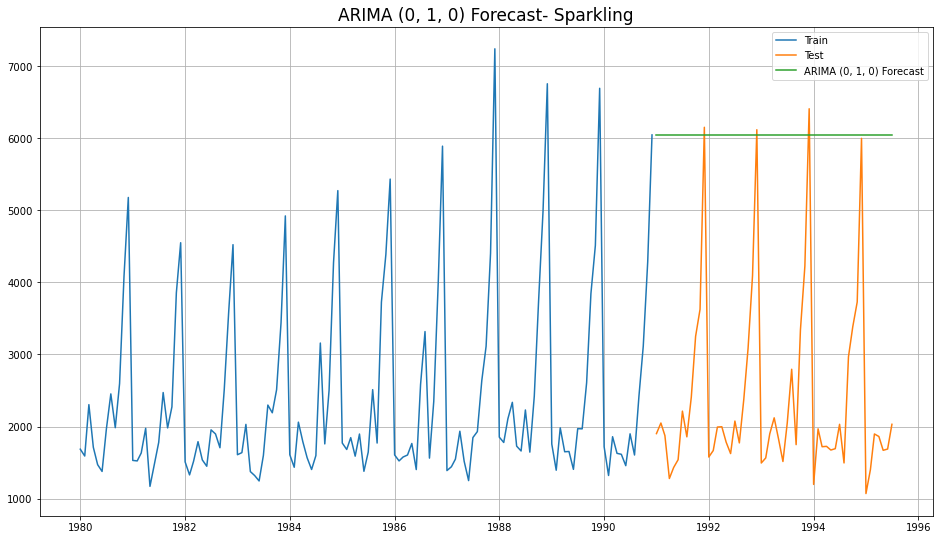

In [297]:
plt.plot(strain, label='Train')
plt.plot(stest, label='Test')
plt.plot(predicted_manual_ARIMA, label='ARIMA (0, 1, 0) Forecast')

plt.grid()
plt.legend(loc='best')
plt.title('ARIMA (0, 1, 0) Forecast- Sparkling', fontsize=17)
plt.savefig('spark_manual_arima_010.jpg', bbox_inches='tight');

## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC) - SPARKLING

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

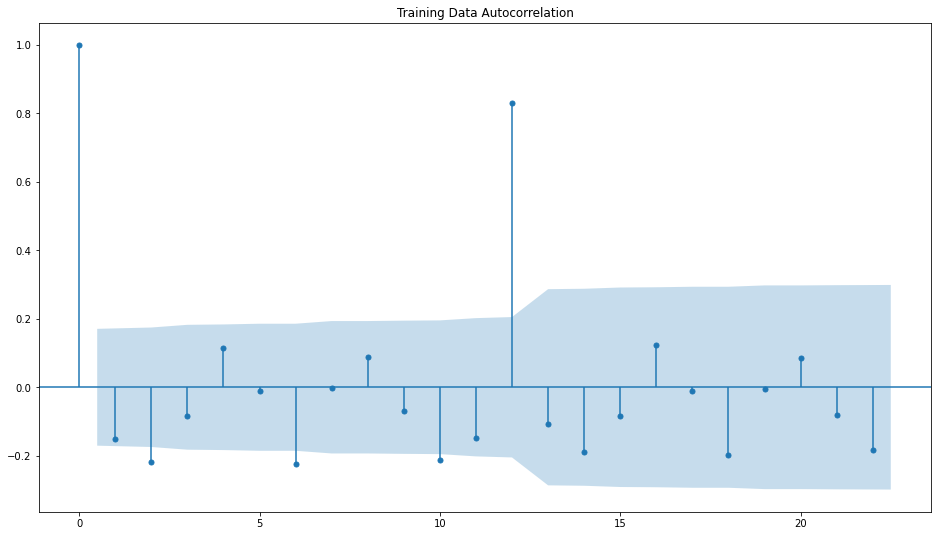

In [298]:
plot_acf(strain.diff(),title='Training Data Autocorrelation',missing='drop');

We can see that there is a seasonality.

In [299]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [300]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [301]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(strain['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616844403
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640229975
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:7335.96755290404
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456677
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301388576
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735792121


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:2742.0464259270157
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158571082
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920792


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3349.47712724253
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1467.4574095308408
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1469.1871052625909
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1471.0594530063258


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3572.0511520867212
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505816
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566387
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7116139626821
SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:7258.5866094321755
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838566
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193776728
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.131965396337


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:2798.9423774292695
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954178471
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245084488861
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018825849346


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3173.065787530572
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:1428.4607679617334
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:1428.8727983550407
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:1429.5891873679896


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:3180.526755908283
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:2187.4410101687035
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1887.912800720189
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1659.878989122306
SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:7180.361636463384
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1790.0326332310754
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1724.167507719067
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1557.1605066472744


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:3425.321407178565
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1603.9654774492465
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1600.5438799704955
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1557.1215631401546


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:3792.832157272767
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:1428.5993408269067
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:1429.7448374617531
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:1430.6883839664983


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:3796.583158818577
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:2168.092540844025
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1873.9770694735748
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:1643.2973664160775
SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:7095.174491079163
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1792.0312968320554
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1710.6404078070957
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:1542.741898902013


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:2357.9708838530332
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:1604.571580752119
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:1601.0674808531262
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:1543.048627260133


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:2712.72467229325
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:1429.6529447874036
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:1441.1435174679518
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:1431.0415215980909


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:2685.3099180028644
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1954.39383399037
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1721.2688476355193


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:7245.070369444981
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1811.2440279329655
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1788.53435926794
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1616.4894402557334


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3017.887434516525
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1621.6355080129179
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:1617.1356132082192
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:1616.541206747123


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3408.076493877441
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:1440.5134640371984
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:1442.1719780323124
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:1443.7660392739158


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3389.91353400138
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:2204.9340491545663
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1907.3558974131874
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:1678.0981352667832
SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:8142.081543197681
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1775.1424467117895
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1739.7120332760567
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1571.324886353774
SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:2870.178865128346
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1590.6161606849469
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:1586.3140643252393
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1571.8069976481338


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:3218.508871679418
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:1414.9112074213774
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:1415.95024942872
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:1417.0148963396405


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3245.756738818964
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:2188.46334505043
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1889.770830750849
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:1659.6291421460828
SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:7182.421809504516
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1771.825979926491
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1723.9952183221526
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1555.5842471527149


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:3674.4505803776356
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:1588.42278699262
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:1585.5115793063626
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:1555.9345630664332


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:4035.980440929333
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:1413.8102394621928
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:1414.9146979186153
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:1415.9662807317952


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:4044.8323683681506
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:2171.0264039777057
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1869.9381448986785
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:1646.522131549879


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:16.0
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1772.392159786457
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1711.955488874318
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:1542.5744596300426


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:2690.282915572427
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:1590.4170742456524
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:1587.3668969907587
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:1543.1292691786634


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:3038.4501044912395
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:1415.7723334217267
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:1416.7527854149923
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:1417.7649259687141


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:3048.1830331910855
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:2227.302761872421
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1946.4383435408806
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1711.4123039848294
SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:7334.073412010817
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1780.7646066052791
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1756.9357347088692
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1600.9702203992122


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:3641.6988413924505
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1592.240346483383
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:1587.6344986545432
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:1585.9191739550463


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:3835.898875699256
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:1411.944972803005
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:1413.101762000159
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:1414.197564201242


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:2802.844567560709
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:2199.8586131455804
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1905.0209496002333
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1675.4234080331184
SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:7256.218271488569
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1792.8234291317513
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1740.091124677435
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1571.9888280808086
SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3162.361637007571
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1577.1235061087157
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1573.1595846642822
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1572.3428650496874
SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3544.5518245621306
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:1402.4673328024721
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:1403.130760596348
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:1403.5824666819615


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3349.1776200726467
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2176.868114350931
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1892.2372584341108
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1661.552343245541


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:562.4878264687575
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1757.2140931241022
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1725.3955648493732
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1557.3404020800904


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:2852.7285662824142
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1576.045740922537
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1573.547601987698
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1557.840126194495


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:3210.713205957454
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:1401.4376159582882
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:1402.5036115533999
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:1403.4359034507072


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3216.244091305228
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:2171.0395871936234
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1865.057320303722
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:1646.7072827753855
SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:7098.187512590045
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1757.8357237094735
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1714.0294730068679
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:1543.917347171647
SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:3115.1030586410375
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:1575.1615676490937
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:1575.468724209268
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:1543.9471518071953


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3440.3327957550896
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:1399.7898389039976
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:1400.3878498148238
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:1404.7388987120646


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3461.5496271114657
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:2208.40250139061
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1946.3686291418933
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:1709.5089923152968
SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:7333.3702647531945
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1762.7961104703552
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1740.3783834192222
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:1600.0471982097722
SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:3213.139418747382
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:1578.2748025563703
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:1572.9330812723265
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:1571.6808204778133


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3707.902770470987
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:1396.8678620489407
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:1397.6774709753279
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:1398.3074718201558


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3368.3505138908517
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:2188.222098337379
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1906.9690713212863
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:1677.4234051948583
SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:7258.218302050222
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1746.2222538105923
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1727.308503675418
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:1573.6844983194355
SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:3181.127298190535
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:1564.9377505368805
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:1576.2959850682569
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:1576.3498116869177
SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:3546.5518245589487
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:1387.7883315891027
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:1388.6814853188591
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:1389.1958982142112
SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:3517.4859457176826
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:2187.314727180965
SARIMA(3, 1, 2)

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:3016.5959588836085
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:1566.944045061862
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:1560.7894294167909
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:1559.809160952972


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:2810.8293701058737
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:1401.8690465967834
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:1388.6026124668874
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:1389.7020163180252


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:3509.648585658791
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:2155.7749542046413
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1876.9311104659482
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:1643.7829906206152
SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:7094.822141592793
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1741.3825800278983
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1709.9431215164102
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:1542.7967295820313


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:2579.745475420148
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:1567.176397980873
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:1559.955058777281
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:1545.7744361148611


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:4033.2444343713355
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:1387.4970073951029
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:1393.1698584591218
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:1391.6962193582838


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:3427.357866794739


In [302]:
SARIMA_AIC.sort_values(by=['AIC']).head(40)

param       seasonal          AIC
115  (1, 1, 3)  (0, 0, 3, 12)    16.000000
163  (2, 1, 2)  (0, 0, 3, 12)   562.487826
252  (3, 1, 3)  (3, 0, 0, 12)  1387.497007
220  (3, 1, 1)  (3, 0, 0, 12)  1387.788332
237  (3, 1, 2)  (3, 0, 1, 12)  1388.602612
221  (3, 1, 1)  (3, 0, 1, 12)  1388.681485
222  (3, 1, 1)  (3, 0, 2, 12)  1389.195898
238  (3, 1, 2)  (3, 0, 2, 12)  1389.702016
254  (3, 1, 3)  (3, 0, 2, 12)  1391.696219
253  (3, 1, 3)  (3, 0, 1, 12)  1393.169858
204  (3, 1, 0)  (3, 0, 0, 12)  1396.867862
205  (3, 1, 0)  (3, 0, 1, 12)  1397.677471
206  (3, 1, 0)  (3, 0, 2, 12)  1398.307472
188  (2, 1, 3)  (3, 0, 0, 12)  1399.789839
189  (2, 1, 3)  (3, 0, 1, 12)  1400.387850
172  (2, 1, 2)  (3, 0, 0, 12)  1401.437616
236  (3, 1, 2)  (3, 0, 0, 12)  1401.869047
156  (2, 1, 1)  (3, 0, 0, 12)  1402.467333
173  (2, 1, 2)  (3, 0, 1, 12)  1402.503612
157  (2, 1, 1)  (3, 0, 1, 12)  1403.130761
174  (2, 1, 2)  (3, 0, 2, 12)  1403.435903
158  (2, 1, 1)  (3, 0, 2, 12)  1403.582467
190  (2, 1, 3)  (3, 0, 2, 12)  1404.738899
140  (2, 1, 0)  (3, 0, 0, 12)  1411.944973
141  (2, 1, 0)  (3, 0, 1, 12)  1413.101762
108  (1, 1, 2)  (3, 0, 0, 12)  1413.810239
142  (2, 1, 0)  (3, 0, 2, 12)  1414.197564
92   (1, 1, 1)  (3, 0, 0, 12)  1414.911207
109  (1, 1, 2)  (3, 0, 1, 12)  1414.914698
124  (1, 1, 3)  (3, 0, 0, 12)  1415.772333
93   (1, 1, 1)  (3, 0, 1, 12)  1415.950249
110  (1, 1, 2)  (3, 0, 2, 12)  1415.966281
125  (1, 1, 3)  (3, 0, 1, 12)  1416.752785
94   (1, 1, 1)  (3, 0, 2, 12)  1417.014896
126  (1, 1, 3)  (3, 0, 2, 12)  1417.764926
28   (0, 1, 1)  (3, 0, 0, 12)  1428.460768
44   (0, 1, 2)  (3, 0, 0, 12)  1428.599341
29   (0, 1, 1)  (3, 0, 1, 12)  1428.872798
30   (0, 1, 1)  (3, 0, 2, 12)  1429.589187
60   (0, 1, 3)  (3, 0, 0, 12)  1429.652945

In [303]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                      
Dep. Variable:                           Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [], 12)   Log Likelihood                -685.894
Date:                             Sat, 10 Dec 2022   AIC                           1387.788
Time:                                     17:00:43   BIC                           1407.963
Sample:                                 01-01-1980   HQIC                          1395.931
                                      - 12-01-1990                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1615      0.150      1.075      0.282      -0.133       0.456
ar.L2         -0.0928      

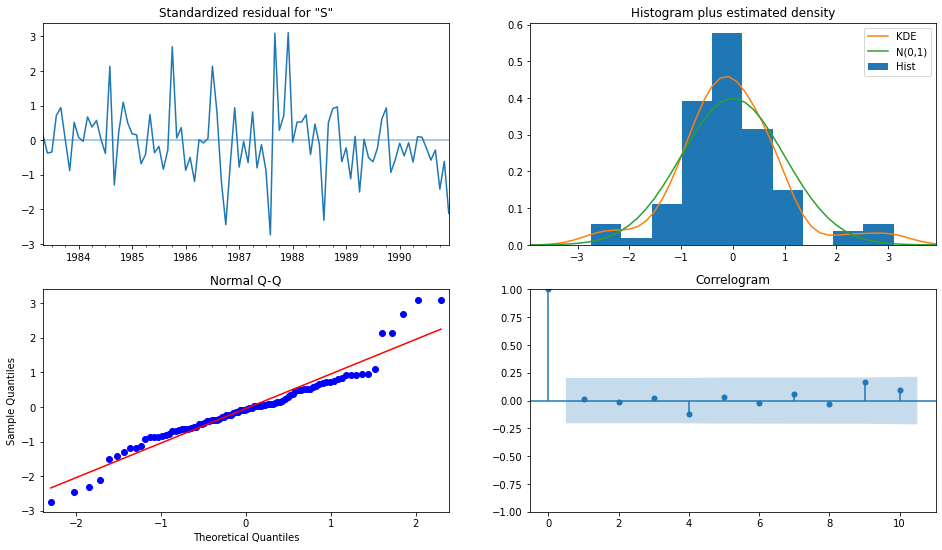

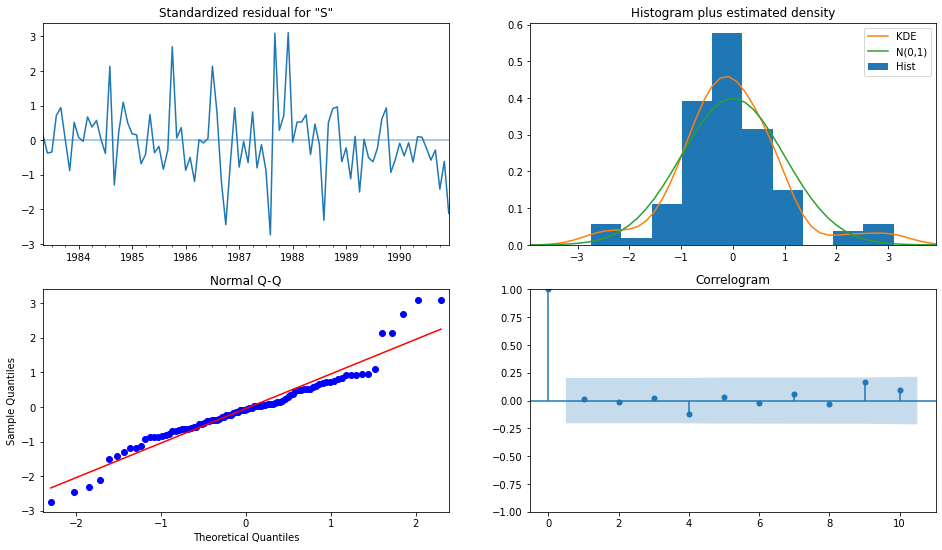

In [304]:
results_auto_SARIMA.plot_diagnostics()
plt.savefig('spark_sarima00312_diag_plot.jpg', bbox_inches='tight');
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [305]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(stest))

In [306]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  1389.369555  415.861785     574.295433    2204.443677
1991-02-01  1224.634968  427.862143     386.040577    2063.229359
1991-03-01  1673.318927  428.007176     834.440277    2512.197578
1991-04-01  1533.325981  432.772828     685.106824    2381.545138
1991-05-01  1425.955866  435.886200     571.634613    2280.277119

In [307]:
rmse = mean_squared_error(stest['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 601.2233475304798 
MAPE: 25.8696099888637


In [308]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(3,1,1)(3,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE       MAPE
ARIMA(2,1,2)             1299.980250   47.09988
ARIMA(0,1,0)             3864.279352  201.32765
SARIMA(3,1,1)(3,0,2,12)   601.223348   25.86961

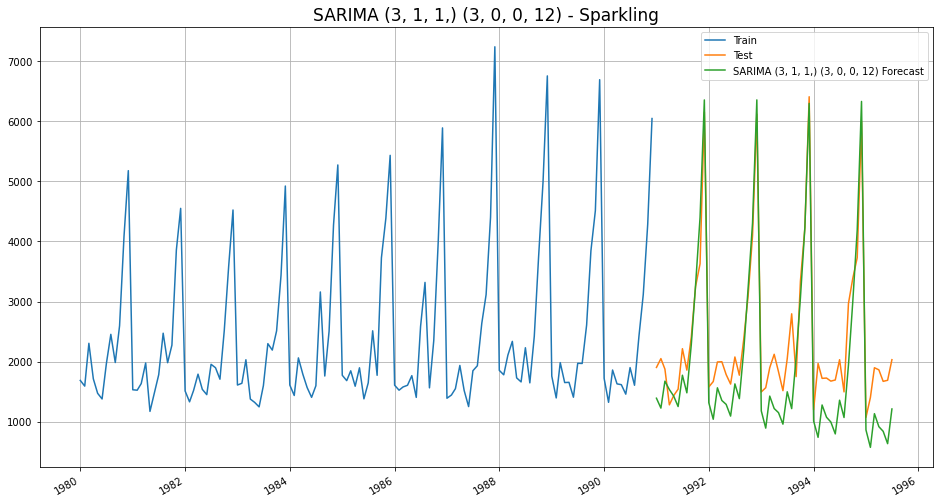

In [309]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')
# plt.plot(predicted_auto_SARIMA,label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
# predicted_auto_SARIMA.plot(label='SARIMA(3, 1, 1)(3, 0, 2, 12)')
predicted_auto_SARIMA.predicted_mean.plot(label='SARIMA (3, 1, 1,) (3, 0, 0, 12) Forecast')


plt.legend(loc='best')
plt.grid()
plt.title('SARIMA (3, 1, 1,) (3, 0, 0, 12) - Sparkling', fontsize=17);

plt.savefig('spark_sarima_auto_30012.jpg', bbox_inches='tight');

## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 12 - SPARKLING

Let us look at the ACF and the PACF plots once more.

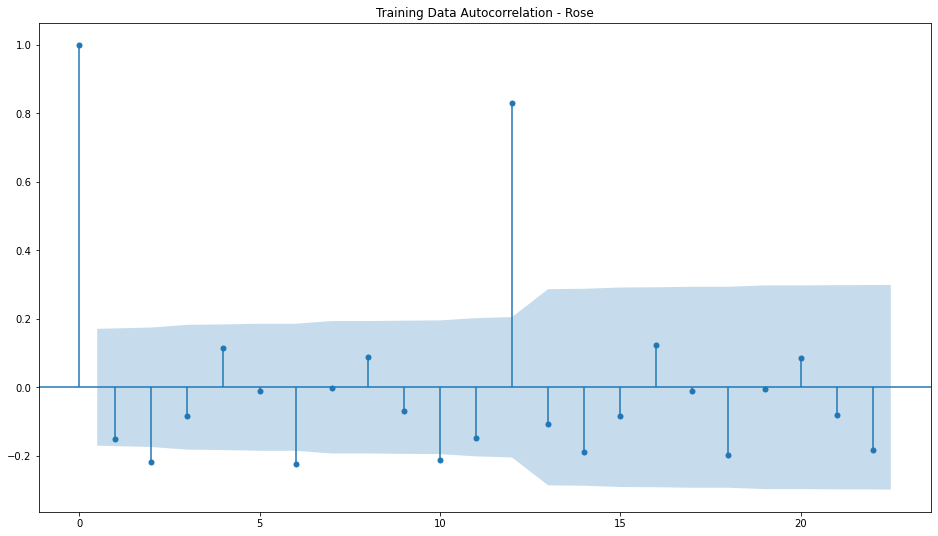

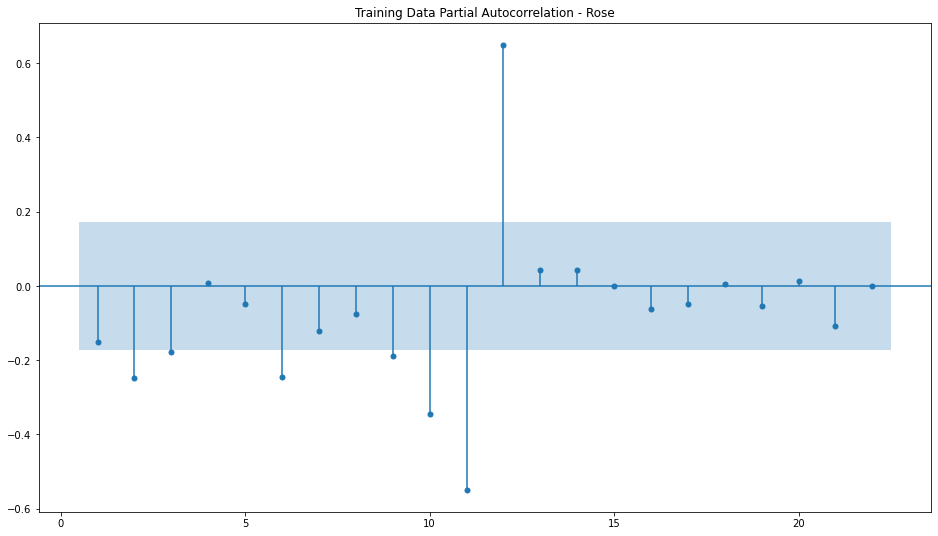

In [310]:
plot_acf(strain.diff(),title='Training Data Autocorrelation - Rose',missing='drop')
plot_pacf(strain.diff().dropna(),title='Training Data Partial Autocorrelation - Rose',zero=False,method='ywmle');

In [311]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                       
Dep. Variable:                            Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -811.162
Date:                              Sat, 10 Dec 2022   AIC                           1628.324
Time:                                      17:00:45   BIC                           1636.315
Sample:                                  01-01-1980   HQIC                          1631.563
                                       - 12-01-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.1482      0.223      0.664      0.507      -0.289       0.586
ma.S.L12      -0.57

In [312]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA1 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA1.summary())

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(2, 1, [1, 2], 12)   Log Likelihood                -722.996
Date:                                 Sat, 10 Dec 2022   AIC                           1455.991
Time:                                         17:00:47   BIC                           1468.708
Sample:                                     01-01-1980   HQIC                          1461.128
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.2445      0.879     -0.278      0.781      -1.967       1

In [313]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA2 = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA2.summary())

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(3, 1, [1, 2], 12)   Log Likelihood                -638.304
Date:                                 Sat, 10 Dec 2022   AIC                           1288.607
Time:                                         17:00:50   BIC                           1303.120
Sample:                                     01-01-1980   HQIC                          1294.438
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -1.0545      0.201     -5.254      0.000      -1.448      -0

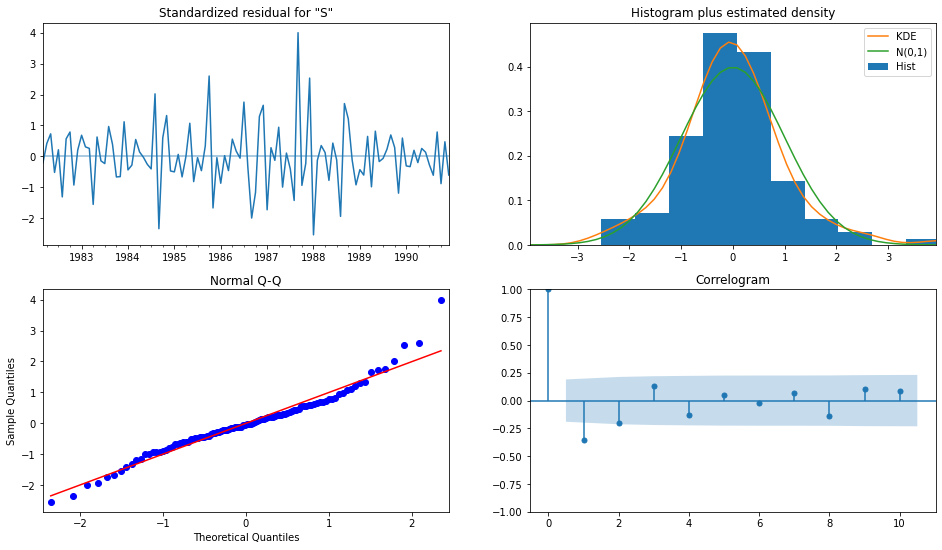

In [314]:
results_manual_SARIMA.plot_diagnostics()
plt.savefig('spark_sarima_11112.jpg', bbox_inches='tight');

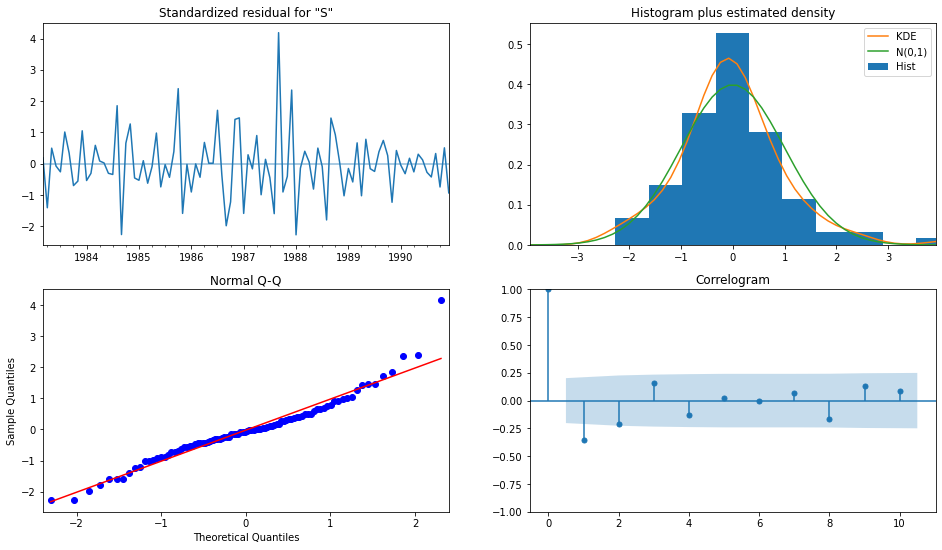

In [315]:
results_manual_SARIMA1.plot_diagnostics()
plt.savefig('spark_sarima_21212.jpg', bbox_inches='tight');

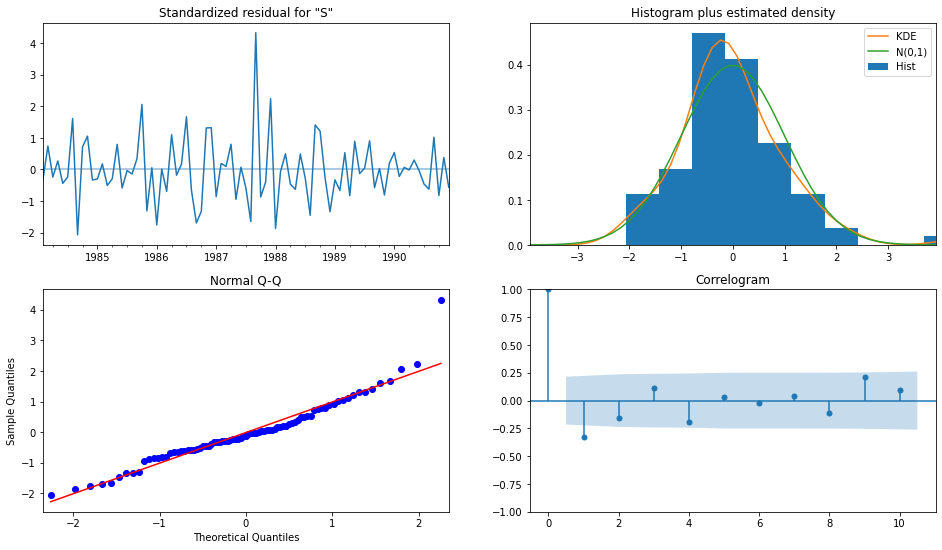

In [316]:
results_manual_SARIMA2.plot_diagnostics()
plt.savefig('spark_sarima_31212.jpg', bbox_inches='tight');

## Predict on the Test Set using this model and evaluate the model.

In [317]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(stest))
                                                             
predicted_manual_SARIMA1 = results_manual_SARIMA1.get_forecast(steps=len(stest))

predicted_manual_SARIMA2 = results_manual_SARIMA2.get_forecast(steps=len(stest))

In [318]:
rmse = mean_squared_error(stest['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1189.8357994987527 
MAPE: 54.87253648382994


In [319]:
rmse1 = mean_squared_error(stest['Sparkling'],predicted_manual_SARIMA1.predicted_mean,squared=False)
mape1 = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_SARIMA1.predicted_mean)
print('RMSE:',rmse1,'\nMAPE:',mape1)

RMSE: 1757.72718849967 
MAPE: 81.78524910147841


In [320]:
rmse2 = mean_squared_error(stest['Sparkling'],predicted_manual_SARIMA2.predicted_mean,squared=False)
mape2 = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_SARIMA2.predicted_mean)
print('RMSE:',rmse2,'\nMAPE:',mape2)

RMSE: 1551.6457414646095 
MAPE: 71.56617106492378


In [321]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse, rmse1, rmse2],'MAPE':[mape, mape1, mape2]}
                           ,index=['SARIMA(0,1,0)(3,1,2,12)', 'SARIMA(0,1,0)(2,1,2,12)', 'SARIMA(0,1,0)(3,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE        MAPE
ARIMA(2,1,2)             1299.980250   47.099880
ARIMA(0,1,0)             3864.279352  201.327650
SARIMA(3,1,1)(3,0,2,12)   601.223348   25.869610
SARIMA(0,1,0)(3,1,2,12)  1189.835799   54.872536
SARIMA(0,1,0)(2,1,2,12)  1757.727188   81.785249
SARIMA(0,1,0)(3,1,2,12)  1551.645741   71.566171

In [322]:
resultsR0 = resultsDf.copy()

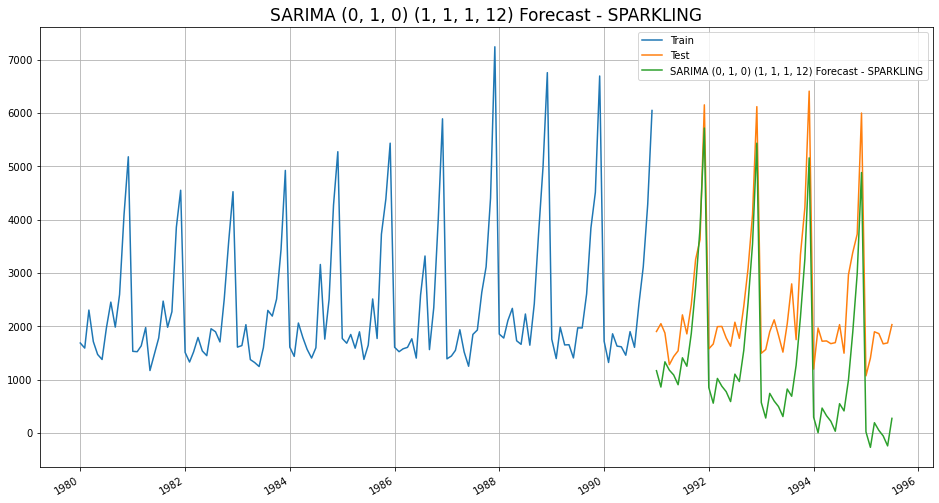

In [323]:
plt.plot(strain, label='Train')
plt.plot(stest, label ='Test')

predicted_manual_SARIMA.predicted_mean.plot(label = 'SARIMA (0, 1, 0) (1, 1, 1, 12) Forecast - SPARKLING')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (0, 1, 0) (1, 1, 1, 12) Forecast - SPARKLING', fontsize=17)
plt.savefig('SPARK_sarima_manual_forecast_11112.jpg', bbox_inches='tight');

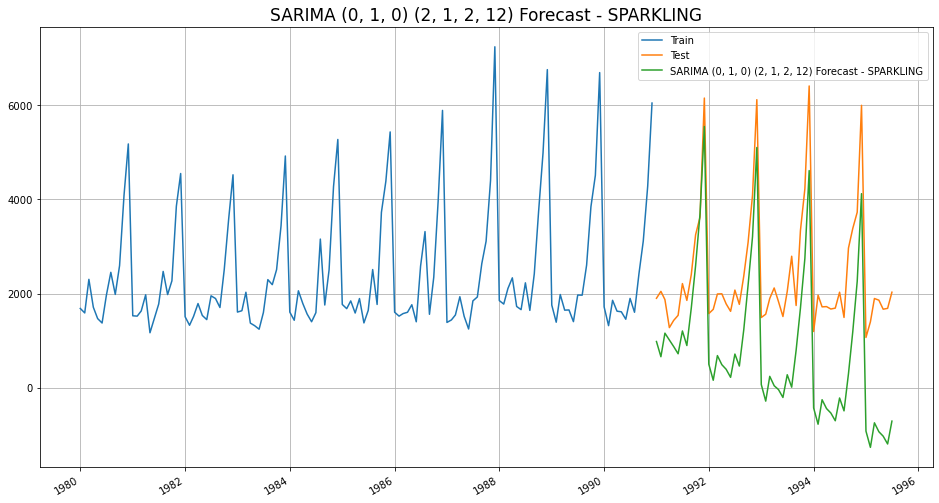

In [324]:
plt.plot(strain, label='Train')
plt.plot(stest, label ='Test')

predicted_manual_SARIMA1.predicted_mean.plot(label = 'SARIMA (0, 1, 0) (2, 1, 2, 12) Forecast - SPARKLING')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (0, 1, 0) (2, 1, 2, 12) Forecast - SPARKLING', fontsize=17)
plt.savefig('spark_sarima_manual_forecast1.jpg', bbox_inches='tight');

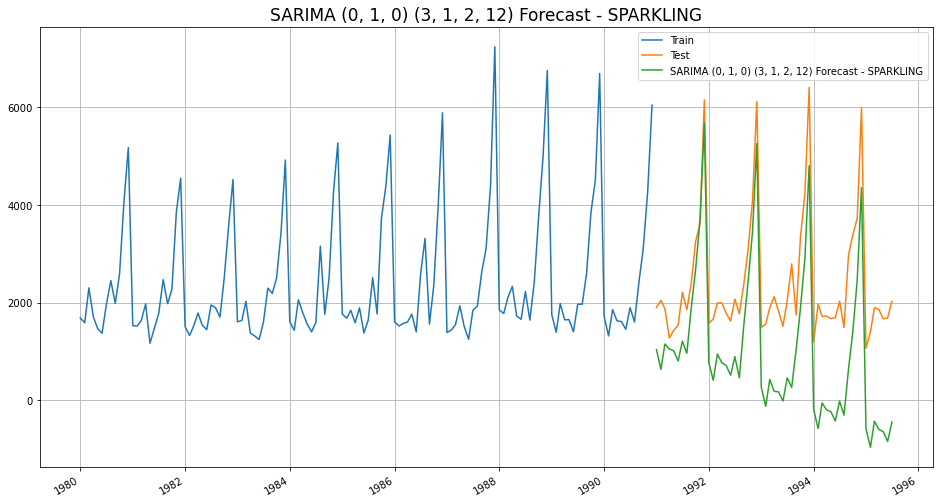

In [325]:
plt.plot(strain, label='Train')
plt.plot(stest, label ='Test')

predicted_manual_SARIMA2.predicted_mean.plot(label = 'SARIMA (0, 1, 0) (3, 1, 2, 12) Forecast - SPARKLING')
plt.grid()
plt.legend(loc='best')
plt.title('SARIMA (0, 1, 0) (3, 1, 2, 12) Forecast - SPARKLING', fontsize=17)
plt.savefig('spark_sarima_manual_forecast2.jpg', bbox_inches='tight');

## Building the most optimum model on the Full Data.

Here, we have a scenario where our training data was stationary but our full data was not stationary. So, we will use the same parameters as our training data but with adding a level of differencing which is needed for the data to be stationary.

In [326]:
full_data_model = sm.tsa.statespace.SARIMAX(dfr['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -587.531
Date:                            Sat, 10 Dec 2022   AIC                           1193.062
Time:                                    17:01:00   BIC                           1219.976
Sample:                                01-01-1980   HQIC                          1203.997
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8649      0.101     -8.556      0.000      -1.063      -0.667
ar.L2          0.0340      0.091   

## Evaluate the model on the whole data and predict 12 months into the future

In [327]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [328]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  43.083388  12.674039      18.242728      67.924047
1995-09-01  43.341439  12.959792      17.940713      68.742164
1995-10-01  45.826992  12.963786      20.418438      71.235546
1995-11-01  57.397605  13.124495      31.674069      83.121142
1995-12-01  85.075209  13.133321      59.334373     110.816045

In [329]:
rmse = mean_squared_error(dfr['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 35.91088999449239


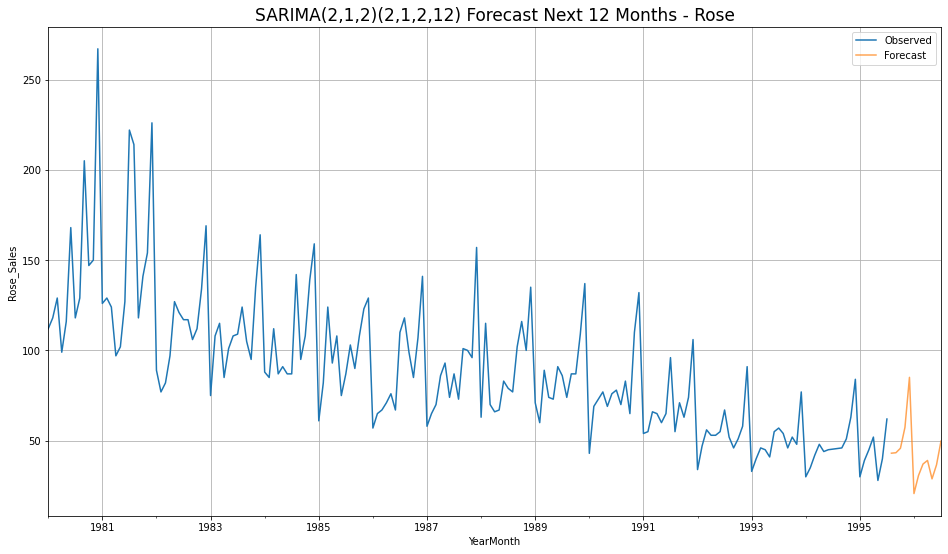

In [330]:
axis = dfr['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('YearMonth')
axis.set_ylabel('Rose_Sales')
plt.legend(loc='best')
plt.grid();
plt.title('SARIMA(2,1,2)(2,1,2,12) Forecast Next 12 Months - Rose', fontsize=17);
plt.savefig('rose_forecast.jpg', bbox_inches='tight');

In [331]:
resultsDf

RMSE        MAPE
ARIMA(2,1,2)             1299.980250   47.099880
ARIMA(0,1,0)             3864.279352  201.327650
SARIMA(3,1,1)(3,0,2,12)   601.223348   25.869610
SARIMA(0,1,0)(3,1,2,12)  1189.835799   54.872536
SARIMA(0,1,0)(2,1,2,12)  1757.727188   81.785249
SARIMA(0,1,0)(3,1,2,12)  1551.645741   71.566171

In [332]:
resultsS0 = resultsDf.copy()

resultsS0.to_csv('spark_all_arima.csv')

In [333]:
results_all_spark = pd.concat([resultsDf14, resultsS0], axis=0)
results_all_spark

Test RMSE Rose  \
RegressionOnTime                                         15.268955   
NaiveModel                                               79.718773   
SimpleAverageModel                                       53.460570   
2pointTrailingMovingAverage                              11.529278   
4pointTrailingMovingAverage                              14.451403   
6pointTrailingMovingAverage                              14.566327   
9pointTrailingMovingAverage                              14.727630   
Simple Exponential Smoothing                             36.796241   
Double Exponential Smoothing                             15.268939   
Triple Exponential Smoothing (Additive Season)           14.280504   
Triple Exponential Smoothing (Multiplicative Se...       20.949676   
Triple Exponential Smoothing (Additive Season, ...       26.503714   
Triple Exponential Smoothing (Multiplicative Se...       25.826032   
ARIMA(2,1,2)                                                   NaN   
ARIMA(0,1,0)                                                   NaN   
SARIMA(3,1,1)(3,0,2,12)                                        NaN   
SARIMA(0,1,0)(3,1,2,12)                                        NaN   
SARIMA(0,1,0)(2,1,2,12)                                        NaN   
SARIMA(0,1,0)(3,1,2,12)                                        NaN   

                                                    Test RMSE Sparkling  \
RegressionOnTime                                            1389.135175   
NaiveModel                                                  3864.279352   
SimpleAverageModel                                          1275.081804   
2pointTrailingMovingAverage                                  813.400684   
4pointTrailingMovingAverage                                 1156.589694   
6pointTrailingMovingAverage                                 1283.927428   
9pointTrailingMovingAverage                                 1346.278315   
Simple Exponential Smoothing                                1338.004623   
Double Exponential Smoothing                                3949.931298   
Triple Exponential Smoothing (Additive Season)               378.944325   
Triple Exponential Smoothing (Multiplicative Se...           403.125867   
Triple Exponential Smoothing (Additive Season, ...           378.944325   
Triple Exponential Smoothing (Multiplicative Se...           352.464674   
ARIMA(2,1,2)                                                        NaN   
ARIMA(0,1,0)                                                        NaN   
SARIMA(3,1,1)(3,0,2,12)                                             NaN   
SARIMA(0,1,0)(3,1,2,12)                                             NaN   
SARIMA(0,1,0)(2,1,2,12)                                             NaN   
SARIMA(0,1,0)(3,1,2,12)                                             NaN   

                                                           RMSE        MAPE  
RegressionOnTime                                            NaN         NaN  
NaiveModel                                                  NaN         NaN  
SimpleAverageModel                                          NaN         NaN  
2pointTrailingMovingAverage                                 NaN         NaN  
4pointTrailingMovingAverage                                 NaN         NaN  
6pointTrailingMovingAverage                                 NaN         NaN  
9pointTrailingMovingAverage                                 NaN         NaN  
Simple Exponential Smoothing                                NaN         NaN  
Double Exponential Smoothing                                NaN         NaN  
Triple Exponential Smoothing (Additive Season)              NaN         NaN  
Triple Exponential Smoothing (Multiplicative Se...          NaN         NaN  
Triple Exponential Smoothing (Additive Season, ...          NaN         NaN  
Triple Exponential Smoothing (Multiplicative Se...          NaN         NaN  
ARIMA(2,1,2)                                        1299.9

In [334]:
results_all_spark.to_csv('results_all_spark.csv')

## Best Model for ROSE with Least RMSE - 2 Pt Moving Average

In [335]:
MovingAverage = dfr.copy()
MovingAverage.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

#### Trailing moving averages

In [336]:

MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()

MovingAverage.head()
MovingAverage.tail()

Rose  Trailing_2
YearMonth                    
1980-01-01  112.0         NaN
1980-02-01  118.0       115.0
1980-03-01  129.0       123.5
1980-04-01   99.0       114.0
1980-05-01  116.0       107.5

Rose  Trailing_2
YearMonth                   
1995-03-01  45.0        42.0
1995-04-01  52.0        48.5
1995-05-01  28.0        40.0
1995-06-01  40.0        34.0
1995-07-01  62.0        51.0

In [337]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']


MovingAverage.head()

Rose  Trailing_2
YearMonth                    
1980-01-01  112.0         NaN
1980-02-01  118.0       115.0
1980-03-01  129.0       123.5
1980-04-01   99.0       114.0
1980-05-01  116.0       107.5

In [338]:
import pandas as pd
from datetime import datetime

datelist = pd.date_range(start='08/01/1995', periods=12, freq='MS')
ts = pd.to_datetime(datelist, format="%Y-%m-%d")

ma_forecast = pd.DataFrame(columns=['Rose', 'Trailing_2', 'forecast_12'], index=ts)

MovingAverage = pd.concat([MovingAverage, ma_forecast], axis=0)
MovingAverage['forecast_12'] = MovingAverage['Rose'].rolling(2).mean()

In [339]:
MovingAverage.tail()
MovingAverage.shape
MovingAverage.fillna(0)
MovingAverage['Rose'].iloc[0:2]

Rose  Trailing_2  forecast_12
1996-03-01   NaN         NaN          NaN
1996-04-01   NaN         NaN          NaN
1996-05-01   NaN         NaN          NaN
1996-06-01   NaN         NaN          NaN
1996-07-01   NaN         NaN          NaN

(199, 3)

Rose  Trailing_2  forecast_12
1980-01-01  112.0         0.0          0.0
1980-02-01  118.0       115.0        115.0
1980-03-01  129.0       123.5        123.5
1980-04-01   99.0       114.0        114.0
1980-05-01  116.0       107.5        107.5
...           ...         ...          ...
1996-03-01    0.0         0.0          0.0
1996-04-01    0.0         0.0          0.0
1996-05-01    0.0         0.0          0.0
1996-06-01    0.0         0.0          0.0
1996-07-01    0.0         0.0          0.0

[199 rows x 3 columns]

1980-01-01    112.0
1980-02-01    118.0
Name: Rose, dtype: float64

In [340]:
import math
k = 2
yhat = []

for i in range(0,199):
    tmp = 0.0

    tmp = math.fsum(MovingAverage['Rose'].iloc[i:i+2])

    yhat.append(tmp/k)
    
yhat

[115.0,
 123.5,
 114.0,
 107.5,
 142.0,
 143.0,
 123.5,
 167.0,
 176.0,
 148.5,
 208.5,
 196.5,
 127.5,
 126.5,
 110.5,
 99.5,
 114.5,
 174.5,
 218.0,
 166.0,
 129.5,
 147.5,
 190.0,
 157.5,
 83.0,
 79.5,
 89.5,
 112.0,
 124.0,
 119.0,
 117.0,
 111.5,
 109.0,
 123.0,
 151.5,
 122.0,
 91.5,
 111.5,
 100.0,
 93.0,
 104.5,
 108.5,
 116.5,
 114.5,
 100.0,
 115.0,
 149.5,
 126.0,
 86.5,
 98.5,
 99.5,
 89.0,
 89.0,
 87.0,
 114.5,
 118.5,
 101.5,
 123.5,
 149.0,
 110.0,
 71.5,
 103.0,
 108.5,
 100.5,
 91.5,
 81.0,
 95.0,
 96.5,
 99.0,
 115.5,
 126.0,
 93.0,
 61.0,
 66.0,
 69.0,
 73.5,
 71.5,
 88.5,
 114.0,
 108.5,
 92.0,
 96.0,
 124.0,
 99.5,
 61.5,
 67.5,
 78.0,
 89.5,
 83.5,
 80.5,
 80.0,
 87.0,
 100.5,
 98.0,
 126.5,
 110.0,
 89.0,
 92.5,
 68.0,
 66.5,
 75.0,
 81.0,
 78.0,
 89.5,
 109.0,
 108.0,
 117.5,
 103.0,
 65.5,
 74.5,
 81.5,
 73.5,
 82.0,
 88.5,
 80.0,
 80.5,
 87.0,
 98.0,
 123.0,
 90.0,
 56.0,
 71.0,
 75.0,
 73.0,
 72.5,
 77.0,
 74.0,
 76.5,
 74.0,
 87.5,
 121.0,
 93.0,
 54.5,
 60.

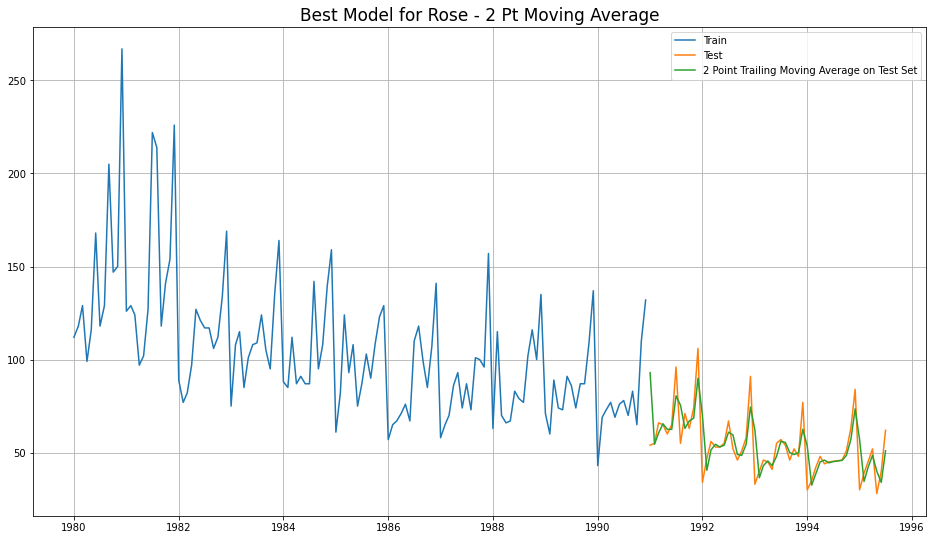

In [341]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')


plt.legend(loc = 'best')
plt.grid();
plt.title('Best Model for Rose - 2 Pt Moving Average', fontsize=17);
plt.savefig('rose_best_model_2pt.jpg', bbox_inches='tight');

# FORECAST ON NEXT 12 MONTHS - ROSE 

## (Using 2 Pt Moving Average Model)

In [362]:
dfr1 = pd.read_csv('rose.csv', parse_dates=True,index_col='YearMonth')
dfr1.head()
dfr1.tail()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

In [363]:
## FORECAST ON NEXT 12 MONTHS










## Holt-Winters - ETS(A, A, M) - Best Model for Sparkling Till Now

### ETS(A, Ad, M) model - Taking MULTIPLICATIVE SEASONALITY

### USING DAMPED TREND

In [364]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(dfs,trend='add',seasonal='multiplicative',initialization_method='estimated', damped_trend=True)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07568164081775695, 'smoothing_trend': 0.06487472060988321, 'smoothing_seasonal': 0.27375141812444276, 'damping_trend': 0.9899158106335018, 'initial_level': 2356.2557760762875, 'initial_trend': -17.190172526832868, 'initial_seasons': array([0.73401699, 0.70357769, 0.8981625 , 0.82768184, 0.68198231,
       0.66853879, 0.89203509, 1.14786887, 0.94128049, 1.2711734 ,
       1.94053927, 2.51606472]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [365]:
# Forecasting using this model for the duration of the test set
TES_predict_am_damp_spark =  model_TES_am.forecast(steps=12)
TES_predict_am_damp_spark
prediction_1 = TES_predict_am_damp_spark
TES_predict_am_damp_spark.to_csv('spark_forecast_tes.csv')

1995-08-01    1931.550507
1995-09-01    2352.011717
1995-10-01    3179.717427
1995-11-01    3918.537471
1995-12-01    5986.630106
1996-01-01    1357.500046
1996-02-01    1599.162783
1996-03-01    1830.241938
1996-04-01    1791.073856
1996-05-01    1641.939224
1996-06-01    1556.396121
1996-07-01    1965.867128
Freq: MS, dtype: float64

In [366]:
plt.rcParams["figure.figsize"] = [16,9]

In [367]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(model_TES_am.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(model_TES_am.resid,ddof=1)})
pred_1_df.head()

lower_CI   prediction     upper_ci
1995-08-01  1253.496868  1931.550507  2609.604146
1995-09-01  1673.958078  2352.011717  3030.065356
1995-10-01  2501.663788  3179.717427  3857.771066
1995-11-01  3240.483832  3918.537471  4596.591110
1995-12-01  5308.576467  5986.630106  6664.683745

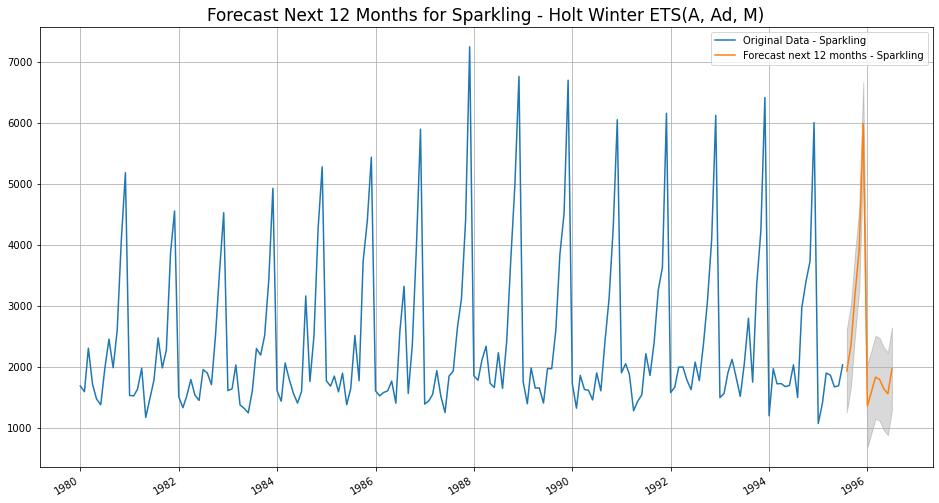

In [368]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(dfs['Sparkling'], label='Original Data - Sparkling')

ax =TES_predict_am_damp_spark.plot(label='Forecast next 12 months - Sparkling')


ax.fill_between(pred_1_df.index,pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)

plt.legend(loc='best')
plt.grid()
plt.title('Forecast Next 12 Months for Sparkling - Holt Winter ETS(A, Ad, M)', fontsize=17);

plt.savefig('spark_forecast_tes.jpg', bbox_inches='tight');

## Building the second most optimum model on ROSE - TES ETS(A, A, A)

Here, we have a scenario where our training data was stationary but our full data was not stationary. So, we will use the same parameters as our training data but with adding a level of differencing which is needed for the data to be stationary.

In [369]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(dfr,trend='add',seasonal='additive',initialization_method='estimated', damped_trend=False)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.09553622424944248, 'smoothing_trend': 0.0013946166204095317, 'smoothing_seasonal': 0.0008105071388219684, 'damping_trend': nan, 'initial_level': 145.27272983526603, 'initial_trend': -0.5374835541713763, 'initial_seasons': array([-27.96180854, -17.12657363,  -9.02072233, -15.92749115,
       -12.06821059,  -6.29033705,   5.05445676,   5.26312638,
         2.59389798,   1.91725952,  17.13661709,  56.41693185]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [370]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES_am.forecast(steps=12)
TES_predict
prediction_1 = TES_predict
TES_predict.to_csv('rose_forecast_tes.csv')

1995-08-01    49.925368
1995-09-01    46.721472
1995-10-01    45.508946
1995-11-01    60.191793
1995-12-01    98.930513
1996-01-01    14.023689
1996-02-01    24.323740
1996-03-01    31.894018
1996-04-01    24.455565
1996-05-01    27.779238
1996-06-01    33.024589
1996-07-01    43.820757
Freq: MS, dtype: float64

In [371]:
plt.rcParams["figure.figsize"] = [16,9]

In [372]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(model_TES_am.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(model_TES_am.resid,ddof=1)})
pred_1_df.head()

lower_CI  prediction    upper_ci
1995-08-01  15.178967   49.925368   84.671769
1995-09-01  11.975071   46.721472   81.467873
1995-10-01  10.762545   45.508946   80.255347
1995-11-01  25.445392   60.191793   94.938194
1995-12-01  64.184112   98.930513  133.676914

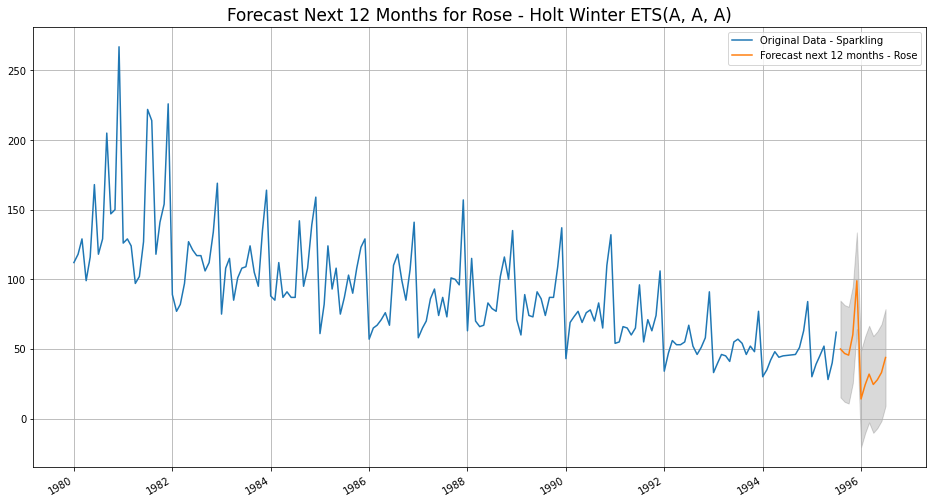

In [373]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(dfr['Rose'], label='Original Data - Sparkling')

ax =TES_predict.plot(label='Forecast next 12 months - Rose')


ax.fill_between(pred_1_df.index,pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)

plt.legend(loc='best')
plt.grid()
plt.title('Forecast Next 12 Months for Rose - Holt Winter ETS(A, A, A)', fontsize=17);

plt.savefig('rose_forecast_tes.jpg', bbox_inches='tight');